In [1]:
import pandas as pd
from datetime import datetime
#from collections import Counter
import string
from tqdm import tqdm
import nltk.stem
from nltk import ngrams
from nltk.corpus import stopwords
import re
import numpy as np
from collections import Counter
import math
from textblob import TextBlob as tb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import statistics

In [3]:
Review = pd.read_excel('barcelonaBus.xlsx')
Review.head(5)

,Unnamed: 0,name,rating,date,upvotes,review
0,0,VÃ­ctor LÃ³pez,5,"January 14, 2019",7,It's a great app for knowing the bus routes an...
1,1,Victoria Zinyk,5,"February 6, 2019",4,"Great app, very precise and works perfectly wi..."
2,2,Jordi Tierra,5,"January 20, 2019",3,"Fixed the problem with advertising, excellent ..."
3,3,Agnes Agnes,5,"February 28, 2019",0,love it! helps move around townðŸ˜‰ðŸ˜‹ðŸ‘
4,4,PUBG WABG,5,"September 26, 2019",0,experience was great i love this app thanks


In [4]:
print('The shape is ', Review.shape)
print('The columns are', Review.columns)

The shape is  (93, 6)
The columns are Index(['Unnamed: 0', 'name', 'rating', 'date', 'upvotes', 'review'], dtype='object')


In [5]:
Review.dtypes

Unnamed: 0     int64
name          object
rating         int64
date          object
upvotes        int64
review        object
dtype: object

In [6]:
Review.drop(['Unnamed: 0','name','date'],1, inplace = True) 

In [7]:
Review.head(5)

,rating,upvotes,review
0,5,7,It's a great app for knowing the bus routes an...
1,5,4,"Great app, very precise and works perfectly wi..."
2,5,3,"Fixed the problem with advertising, excellent ..."
3,5,0,love it! helps move around townðŸ˜‰ðŸ˜‹ðŸ‘
4,5,0,experience was great i love this app thanks


In [8]:
Review[['rating','upvotes']].describe()

,rating,upvotes
count,93.000000,93.000000
mean,4.397849,1.096774
std,1.162267,2.758641
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,18.000000


In [2]:
def sep_token(dataframe):
    test1 = []

    for text in tqdm(dataframe['review'].values):
        text = str(text)
        # remove numbers
        text = re.sub("\S*\d\S*", "", text)
        # remove symbols
        text = re.sub('[^A-Za-z0-9]+', ' ', text)
        
        # remove non-english words
        words = set(nltk.corpus.words.words())
        sent = text
        text  = " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())
        print(text)

        lower = text.lower()
        remove = str.maketrans('','',string.punctuation) 
        without_punctuation = lower.translate(remove)
        tokens = nltk.word_tokenize(without_punctuation)
        without_stopwords = [w for w in tokens if not w in stopwords.words('english')] 

        for w in without_stopwords: 
            test1.append(w)
    return test1

def tokenToText(test1):
    content = ''
    for word in test1:
        content += word
        content += ' '
    return content
 
def gener_wordcloud(content):
    wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(content)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# For barcelonaBus: refer back to the original excel file:
- there are some feedback written in Spainsh, hence, we need to remove those comments
- we also need to remove numbers 


In [33]:
token = sep_token(Review)

100%|██████████| 93/93 [00:21<00:00,  4.83it/s]


#### show freq words

In [34]:
pd.Series(token).value_counts()[:15]

bus       15
great     10
la         9
good       8
use        6
es         6
show       5
para       5
nice       5
time       5
works      5
simple     5
de         5
love       5
en         5
dtype: int64

#### show freq phrases

In [35]:
n = [3,4,5]
a = pd.Series([y for x in n for y in ngrams(token,x)]).value_counts()
a[:10]

(better, good, service, cool, great)        1
(han, la, wonderful, simple)                1
(provider, aplicaci, n)                     1
(timing, good, travel, barcelona, love)     1
(hour, wait, like)                          1
(get, route, directly, rather, navigate)    1
(another, load, really, helpful, chance)    1
(time, always, show, data)                  1
(day, really, handy, stay, beautiful)       1
(thanks, bien, accurate, works)             1
dtype: int64

In [36]:
c = Counter([' '.join(y) for x in [3,4,5] for y in ngrams(token,x)])
df_test = pd.DataFrame({'ngrams': list(c.keys()),'count': list(c.values())})
df_test[:10]

,ngrams,count
0,great knowing bus,1
1,knowing bus time,1
2,bus time bus,1
3,time bus every,1
4,bus every bus,1
5,every bus stop,1
6,bus stop thing,1
7,stop thing like,1
8,thing like interface,1
9,like interface great,1


In [38]:
new_text = tokenToText(token)
new_text

'great knowing bus time bus every bus stop thing like interface great precise works perfectly without fixed problem advertising excellent application bus love move around experience great love thanks point bus timing good travel barcelona love use molt de la es si es para el el bus works fantastic thanks bien accurate works perfectly excellent work great se para mi ya es awesome bus show time always show data times bus arrive hour wait like show time better us time wont waste data bus road bus nice simple get would nice able search bus line get route directly rather navigate stop get route la da saco lo es en great tool works perfect time sometimes show right maybe problem timing provider aplicaci n mal para mi nexus lo costa server works bien es de broma un bus pone en fin ya sea bus accurate simple use molt precis latest version show realize data use daily super use every day really handy stay beautiful barcelona thanks bit route map would good genial de ser la la es simple e love wo

### generate wordcloud

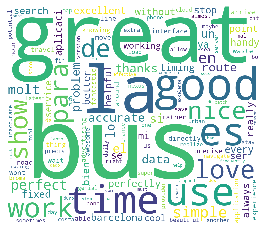

In [39]:
gener_wordcloud(new_text)

### from the wordcould:
- as the barcelonaBus is a high rate app, so there are lots of positive comments on it. hence, the largest word in the img is 'great'. besides, other positive words e.g. 'love', 'good' also shown in the img.
- even though we try to remove all non-English words, there still some words remains.  --> words 'para' and 'la' remain.
- and the wordcloud can deliver some useful info, e.g. we can see most customers care about the 'time' and whether the app can work or not.

# LondonUrbanThings: datasize:2447; overall rate: 4.28

In [42]:
londonRev = pd.read_excel('LondonUrbanThings.xlsx')
londonRev.head(5)

,Unnamed: 0,name,rating,date,upvotes,review
0,0,Niamh O'Loughlin,1,"June 1, 2020",1,Sorry this data can not be loaded at this time...
1,1,Colin Spare,4,"April 1, 2020",1,Good app to use does the job but pop up ads ve...
2,2,William de Oliveira,5,"February 25, 2020",2,Amazing. Easy to use and full of interesting f...
3,3,Daniel Simmons,5,"March 28, 2020",1,Very useful app to check local bus times
4,4,Dhirendra Parmar,5,"March 23, 2020",0,"Good, easy and precise infirmation"


In [43]:
londonRev.drop(['Unnamed: 0','name','date'],1, inplace = True) 
londonRev[['rating','upvotes']].describe()

,rating,upvotes
count,2447.000000,2447.000000
mean,4.279935,0.259093
std,1.193681,1.231525
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,23.000000


In [45]:
londonRev['rating'].value_counts()

5    1545
4     495
1     183
3     137
2      87
Name: rating, dtype: int64

## seperate into positive and negative 

In [134]:
postive_review = pd.DataFrame()
for i in range(londonRev.shape[0]):
   # print(londonRev.loc[i]['rating'])
    if londonRev.loc[i]['rating'] >= 4:
        #print('!!!')
        postive_review = postive_review.append(londonRev.loc[i])
print(postive_review.shape)

(2040, 3)


In [95]:
negative_review = pd.DataFrame()
for i in range(londonRev.shape[0]):
   # print(londonRev.loc[i]['rating'])
    if londonRev.loc[i]['rating'] < 4:
        #print('!!!')
        negative_review = negative_review.append(londonRev.loc[i])
print(negative_review.shape)

(407, 3)


In [87]:
negative_token = sep_token(negative_review)
pd.Series(negative_token).value_counts()[:35]





  0%|          | 0/407 [00:00<?, ?it/s]



  0%|          | 1/407 [00:00<01:26,  4.71it/s]



  0%|          | 2/407 [00:00<01:28,  4.58it/s]



  1%|          | 3/407 [00:00<01:34,  4.27it/s]



  1%|          | 4/407 [00:00<01:37,  4.12it/s]



  1%|          | 5/407 [00:01<01:44,  3.83it/s]



  1%|▏         | 6/407 [00:01<01:41,  3.95it/s]



  2%|▏         | 7/407 [00:01<01:36,  4.14it/s]



  2%|▏         | 8/407 [00:02<01:40,  3.98it/s]



  2%|▏         | 9/407 [00:02<01:35,  4.18it/s]



  2%|▏         | 10/407 [00:02<01:42,  3.87it/s]



  3%|▎         | 11/407 [00:02<01:42,  3.88it/s]



  3%|▎         | 12/407 [00:03<01:45,  3.75it/s]



  3%|▎         | 13/407 [00:03<01:57,  3.34it/s]



  3%|▎         | 14/407 [00:03<02:02,  3.20it/s]



  4%|▎         | 15/407 [00:04<01:52,  3.49it/s]



  4%|▍         | 16/407 [00:04<01:56,  3.37it/s]



  4%|▍         | 17/407 [00:04<01:46,  3.66it/s]



  4%|▍         | 18/407 [00:04<01:40,  3.86it/s]



  5%|▍         | 19/407 [0

 62%|██████▏   | 253/407 [00:54<00:43,  3.56it/s]



 62%|██████▏   | 254/407 [00:54<00:41,  3.72it/s]



 63%|██████▎   | 255/407 [00:54<00:38,  3.94it/s]



 63%|██████▎   | 256/407 [00:54<00:36,  4.15it/s]



 63%|██████▎   | 257/407 [00:55<00:37,  3.98it/s]



 63%|██████▎   | 258/407 [00:55<00:37,  3.92it/s]



 64%|██████▎   | 259/407 [00:55<00:39,  3.72it/s]



 64%|██████▍   | 260/407 [00:55<00:39,  3.76it/s]



 64%|██████▍   | 261/407 [00:56<00:38,  3.78it/s]



 64%|██████▍   | 262/407 [00:56<00:38,  3.76it/s]



 65%|██████▍   | 263/407 [00:56<00:38,  3.77it/s]



 65%|██████▍   | 264/407 [00:57<00:38,  3.75it/s]



 65%|██████▌   | 265/407 [00:57<00:38,  3.73it/s]



 65%|██████▌   | 266/407 [00:57<00:37,  3.78it/s]



 66%|██████▌   | 267/407 [00:57<00:37,  3.77it/s]



 66%|██████▌   | 268/407 [00:58<00:36,  3.76it/s]



 66%|██████▌   | 269/407 [00:58<00:36,  3.79it/s]



 66%|██████▋   | 270/407 [00:58<00:36,  3.80it/s]



 67%|██████▋   | 271/407 [00:58<00:35,  3.80it

bus         97
time        47
good        46
times       34
work        34
used        25
update      24
get         21
working     19
accurate    16
great       16
use         16
stop        16
works       16
find        15
always      15
location    14
would       13
please      13
useless     13
dtype: int64

In [88]:
n = [3,4,5]
a = pd.Series([y for x in n for y in ngrams(negative_token,x)]).value_counts()
a[:10]

(trying, find, road)               2
(find, next, bus)                  2
(view, bus, times)                 2
(every, single, time)              2
(used, work, brilliantly)          2
(map, zoom, see, trying, small)    1
(thought, know, get)               1
(fine, long, time, work)           1
(delete, go, back, wait, see)      1
(stop, small, annoying, detail)    1
dtype: int64

In [89]:
c = Counter([' '.join(y) for x in [3,4,5] for y in ngrams(negative_token,x)])
df_test = pd.DataFrame({'ngrams': list(c.keys()),'count': list(c.values())})
df_test[:10]

,ngrams,count
0,sorry data loaded,1
1,data loaded time,1
2,loaded time aware,1
3,time aware please,1
4,aware please try,1
5,please try later,1
6,try later getting,1
7,later getting message,1
8,getting message tried,1
9,message tried contact,1


In [90]:
clean_negative = tokenToText(negative_token)


'sorry data loaded time aware please try later getting message tried contact thats well used good solid almost unusable hardly ever works tap try switch even going view bus times work time without times unless update fix use another yep agree used 3 4 usually extremely reliable issue resolved shortly like longer reliable great work longer might android version 10 issue reason ad removal populate list every touch even bunch get one need result lazy worse ago want pay recommend bus bus station 6 ago still last year layout example d8 shown stop c case 6 already ever update would great wasnt giant bar left hand side screen purpose banner top button telling zoom well one reduce map size 1 4 screen transport easier use phone good one thing really really open turn location even though never ask option works perfectly fine uninstalled work always worked older since galaxy s7 appear support address ago never received reply 1 star afraid unless customer service would recommend getting unreliable

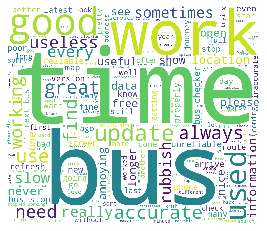

In [91]:
gener_wordcloud(clean_negative)

### postive_review

In [137]:
postive_token = sep_token(postive_review)
pd.Series(postive_token).value_counts()[:35]







  0%|          | 0/2040 [00:00<?, ?it/s]





  0%|          | 1/2040 [00:00<09:17,  3.66it/s]

Good to use does the job but pop up very i dont know why you have these on your there is no need for it and you want to charge to get rid of the this is suppose to be a free remember that








  0%|          | 2/2040 [00:00<09:14,  3.67it/s]

Amazing Easy to use and full of interesting








  0%|          | 3/2040 [00:00<08:53,  3.82it/s]

Very useful to check local bus times
Good easy and precise infirmation








  0%|          | 4/2040 [00:00<08:17,  4.09it/s]





  0%|          | 5/2040 [00:01<08:06,  4.18it/s]

Love this Use it every time I travel I use it for work and it is fantastic I have never my bus and it me waiting at the bus stop for long of time








  0%|          | 6/2040 [00:01<07:59,  4.24it/s]

Very useful at bus where there is not electronic to indicate how long the wait for the bus will be and whether it is worth waiting for a bus in poor weather or if it is best to start walking when the destination is only a couple of and the bus is going to be








  0%|          | 7/2040 [00:01<07:44,  4.38it/s]

Really handy for your journey








  0%|          | 8/2040 [00:01<08:01,  4.22it/s]

I have been this for a few now and apart from a few it me very well OFF TO THE ORIGINATOR It is serving the Transport system of in the best possible way and I am sure it will evolve even more in the future








  0%|          | 9/2040 [00:02<08:00,  4.23it/s]

This is invaluable to me I can leave home at the right time and not waste time at bus i use the feature a lot It also up to date information about my local which was an unexpected bonus








  0%|          | 10/2040 [00:02<07:49,  4.32it/s]

times out of this is accurate Invaluable if you need to keep a constant eye on bus times especially in








  1%|          | 11/2040 [00:02<07:43,  4.37it/s]

It train times as well as bus times from near to where you are The seem to be more accurate than in other








  1%|          | 12/2040 [00:02<07:49,  4.32it/s]

incredibly useful and no this a bot review i like the only stopping me from giving it five is the frequent








  1%|          | 13/2040 [00:03<07:55,  4.27it/s]

I use bus checker great if you are going out because you dont need to leave untill bus is due no hanging around for








  1%|          | 14/2040 [00:03<07:45,  4.35it/s]

A good Would be great to be able to share and link to a child s phone to know which bus they are on








  1%|          | 15/2040 [00:03<08:38,  3.91it/s]

Usually almost always on point Works on time which I guess is behind everyone else s reality Would recommend








  1%|          | 16/2040 [00:03<08:26,  3.99it/s]

bus checker is brilliant can check bus times route and Very very useful








  1%|          | 17/2040 [00:04<08:00,  4.21it/s]

this from few now Very accurate in bus Definitely far reliable than








  1%|          | 18/2040 [00:04<08:38,  3.90it/s]

Very useful when around I use the a fair bit so it s really handy and usually pretty reliable








  1%|          | 19/2040 [00:04<09:30,  3.54it/s]

Invaluable used many times every day Shame the individual bus stop have though








  1%|          | 20/2040 [00:04<09:05,  3.70it/s]

I rely on this now it s part of my daily life That s as strong a review as I can give thank you great work








  1%|          | 21/2040 [00:05<09:25,  3.57it/s]

This is excellent I use it every time I am about to leave the house to judge how long I will have to wait for the bus








  1%|          | 22/2040 [00:05<08:54,  3.78it/s]

it s a great to use to get around plan your don t get lost or your bus good luck people








  1%|          | 23/2040 [00:05<08:20,  4.03it/s]

Often reliable Occasionally been incorrect but usually good








  1%|          | 24/2040 [00:05<08:04,  4.16it/s]

Always use this for my local bus times and find it pretty accurate mostly








  1%|          | 25/2040 [00:06<07:52,  4.26it/s]

Excellent that it easy to get around Thanks








  1%|▏         | 26/2040 [00:06<07:41,  4.36it/s]

Works well and easy to use best bus I have found out of several








  1%|▏         | 27/2040 [00:06<07:40,  4.37it/s]

as a bus stop is exactly opposite our house i always check when the next or will be coming and before they are due i make a dash towards the bus stop and happily board it upon arrival








  1%|▏         | 28/2040 [00:06<07:42,  4.35it/s]

really useful when there is no electronic advice








  1%|▏         | 29/2040 [00:07<07:43,  4.34it/s]

An excellent service with a distinction








  1%|▏         | 30/2040 [00:07<07:41,  4.36it/s]

I think that is is very good and sometimes accurate








  2%|▏         | 31/2040 [00:07<07:29,  4.47it/s]

Its handy to have as i can check time for next bus








  2%|▏         | 32/2040 [00:07<07:29,  4.47it/s]

Always spot on with times and accuracy








  2%|▏         | 33/2040 [00:07<07:30,  4.46it/s]

Very good Generally reliable








  2%|▏         | 34/2040 [00:08<08:15,  4.05it/s]

Very easy to use t been wrong to date








  2%|▏         | 35/2040 [00:08<08:13,  4.07it/s]

This is such a handy to see when are due








  2%|▏         | 36/2040 [00:08<07:55,  4.21it/s]

very useful no longer have wait for bus








  2%|▏         | 37/2040 [00:08<07:40,  4.35it/s]

Always handy usually accurate








  2%|▏         | 38/2040 [00:09<07:48,  4.27it/s]

Very helpful to check from home








  2%|▏         | 39/2040 [00:09<07:39,  4.36it/s]

Easy to use and surprisingly accurate








  2%|▏         | 40/2040 [00:09<07:40,  4.34it/s]

Very useful for me to know bus time s me waiting








  2%|▏         | 41/2040 [00:09<08:12,  4.06it/s]

It s the perfect for me getting around that s all I got to say








  2%|▏         | 42/2040 [00:10<07:50,  4.24it/s]

Easy to use quick response








  2%|▏         | 43/2040 [00:10<08:24,  3.96it/s]

very good and mostly accurate better than most








  2%|▏         | 44/2040 [00:10<07:57,  4.18it/s]

Great use it everyday very very convenient








  2%|▏         | 45/2040 [00:10<08:08,  4.08it/s]

Great Thank you so much








  2%|▏         | 46/2040 [00:11<08:05,  4.10it/s]

t be without it me waiting in the cold at bus








  2%|▏         | 47/2040 [00:11<07:46,  4.27it/s]

Such a handy tool to have it is very useful








  2%|▏         | 48/2040 [00:11<08:09,  4.07it/s]

Easy to use and plan








  2%|▏         | 49/2040 [00:11<08:08,  4.08it/s]

Works well no obvious
Nearly always accurate








  2%|▏         | 50/2040 [00:12<07:42,  4.30it/s]





  2%|▎         | 51/2040 [00:12<08:17,  4.00it/s]

great site very easy to use








  3%|▎         | 52/2040 [00:12<08:45,  3.78it/s]

Been this for It s accurate and reliable and it s a great








  3%|▎         | 53/2040 [00:12<09:28,  3.49it/s]

Very prompt with some nice








  3%|▎         | 54/2040 [00:13<09:43,  3.40it/s]

Much easier to use than








  3%|▎         | 55/2040 [00:13<08:56,  3.70it/s]

love this use it all the time








  3%|▎         | 56/2040 [00:13<08:41,  3.81it/s]

good and easy to use








  3%|▎         | 57/2040 [00:13<08:17,  3.98it/s]

It s all good very reliable








  3%|▎         | 58/2040 [00:14<08:21,  3.95it/s]

Best transport I reckon








  3%|▎         | 59/2040 [00:14<07:55,  4.17it/s]

happy with this Very easy to use








  3%|▎         | 60/2040 [00:14<07:58,  4.14it/s]

Very useful and accurate








  3%|▎         | 61/2040 [00:14<07:58,  4.14it/s]

Terrific of the time it s right








  3%|▎         | 62/2040 [00:15<07:57,  4.14it/s]

easy to navigate








  3%|▎         | 63/2040 [00:15<08:04,  4.08it/s]

Not bad at all easy to use








  3%|▎         | 64/2040 [00:15<08:20,  3.95it/s]

Very useful Thank you








  3%|▎         | 65/2040 [00:15<08:12,  4.01it/s]

Awesome It s great








  3%|▎         | 66/2040 [00:16<07:53,  4.17it/s]

amazing service thanks








  3%|▎         | 67/2040 [00:16<07:58,  4.12it/s]

Very accurate love it








  3%|▎         | 68/2040 [00:16<08:08,  4.04it/s]

Best bus I have had so far








  3%|▎         | 69/2040 [00:16<07:58,  4.12it/s]

great for getting around








  3%|▎         | 70/2040 [00:17<07:46,  4.22it/s]

Very useful tool








  3%|▎         | 71/2040 [00:17<07:36,  4.31it/s]

Use it every day Great








  4%|▎         | 72/2040 [00:17<07:31,  4.36it/s]

Dose the job quite well








  4%|▎         | 73/2040 [00:17<07:53,  4.15it/s]

Its great and very useful








  4%|▎         | 74/2040 [00:18<07:53,  4.15it/s]

Great and useful








  4%|▎         | 75/2040 [00:18<07:35,  4.32it/s]

useful and informative








  4%|▎         | 76/2040 [00:18<07:25,  4.41it/s]

Very handful map








  4%|▍         | 77/2040 [00:18<07:21,  4.45it/s]

Brilliant t be








  4%|▍         | 78/2040 [00:18<07:14,  4.51it/s]

Don t travel in without it








  4%|▍         | 79/2040 [00:19<07:03,  4.63it/s]





  4%|▍         | 80/2040 [00:19<07:48,  4.18it/s]

Love this application
sometimes the eta is inaccurate








  4%|▍         | 81/2040 [00:19<08:44,  3.73it/s]

you can leave work and home at the right time and get bus straight away brilliant








  4%|▍         | 82/2040 [00:19<08:45,  3.73it/s]

Just doing what we need to get from a to b








  4%|▍         | 83/2040 [00:20<08:22,  3.90it/s]

extremely important all daily travel Awesome








  4%|▍         | 84/2040 [00:20<08:55,  3.65it/s]

me how long I got to wait for a bus Just what I it to do








  4%|▍         | 85/2040 [00:20<08:19,  3.92it/s]

Very useful








  4%|▍         | 86/2040 [00:20<08:15,  3.95it/s]

Does the job efficiently








  4%|▍         | 87/2040 [00:21<08:29,  3.83it/s]

it s very good thing to have








  4%|▍         | 88/2040 [00:21<08:16,  3.93it/s]

I m new to this help me greatly








  4%|▍         | 89/2040 [00:21<08:06,  4.01it/s]

does the job








  4%|▍         | 90/2040 [00:21<07:48,  4.16it/s]

Absolutely on Point








  4%|▍         | 91/2040 [00:22<07:53,  4.11it/s]

It is a good








  5%|▍         | 92/2040 [00:22<08:15,  3.93it/s]

The this








  5%|▍         | 93/2040 [00:22<08:25,  3.85it/s]

enjoy lost without it








  5%|▍         | 94/2040 [00:23<09:17,  3.49it/s]

always on time








  5%|▍         | 95/2040 [00:23<09:19,  3.48it/s]

straight Ford and understandable








  5%|▍         | 96/2040 [00:23<08:40,  3.74it/s]

I can not live without it








  5%|▍         | 97/2040 [00:23<08:33,  3.78it/s]

Never me down








  5%|▍         | 98/2040 [00:24<08:01,  4.03it/s]

Haven t fully tried it








  5%|▍         | 99/2040 [00:24<08:55,  3.63it/s]

Easy to use








  5%|▍         | 100/2040 [00:24<08:57,  3.61it/s]

Very nice








  5%|▍         | 101/2040 [00:24<08:47,  3.67it/s]

Better than the








  5%|▌         | 102/2040 [00:25<08:39,  3.73it/s]

very good








  5%|▌         | 103/2040 [00:25<08:30,  3.79it/s]

very good








  5%|▌         | 104/2040 [00:25<08:41,  3.71it/s]

Very Good








  5%|▌         | 105/2040 [00:25<08:08,  3.96it/s]

Great








  5%|▌         | 106/2040 [00:26<07:49,  4.12it/s]

Great








  5%|▌         | 107/2040 [00:26<08:33,  3.76it/s]

Love it








  5%|▌         | 108/2040 [00:26<08:32,  3.77it/s]

Brilliant








  5%|▌         | 109/2040 [00:27<08:29,  3.79it/s]

Does the job Sometimes slow on time to find location on the map but still better than a bunch of other similar which I tried to use








  5%|▌         | 110/2040 [00:27<07:57,  4.04it/s]

Excellent it does exactly what I need








  5%|▌         | 111/2040 [00:27<07:46,  4.14it/s]

I rely on this it s very accurate








  5%|▌         | 112/2040 [00:27<07:40,  4.19it/s]

Highly








  6%|▌         | 113/2040 [00:27<07:24,  4.33it/s]

Its








  6%|▌         | 114/2040 [00:28<07:14,  4.43it/s]

Works well








  6%|▌         | 115/2040 [00:28<07:49,  4.10it/s]

It s convenient for me to use








  6%|▌         | 116/2040 [00:28<07:34,  4.23it/s]

great








  6%|▌         | 117/2040 [00:28<07:44,  4.14it/s]







  6%|▌         | 118/2040 [00:29<07:38,  4.19it/s]







  6%|▌         | 119/2040 [00:29<08:16,  3.87it/s]







  6%|▌         | 120/2040 [00:29<08:07,  3.94it/s]

excellent utility








  6%|▌         | 121/2040 [00:29<07:54,  4.04it/s]





  6%|▌         | 122/2040 [00:30<07:24,  4.32it/s]

in general good
very good








  6%|▌         | 123/2040 [00:30<07:19,  4.36it/s]

great








  6%|▌         | 124/2040 [00:30<07:26,  4.29it/s]

very useful








  6%|▌         | 125/2040 [00:30<07:27,  4.28it/s]

Excellent service








  6%|▌         | 126/2040 [00:31<07:30,  4.25it/s]

V good








  6%|▌         | 127/2040 [00:31<07:21,  4.33it/s]

Great








  6%|▋         | 128/2040 [00:31<07:43,  4.13it/s]

Really helpful








  6%|▋         | 129/2040 [00:31<07:58,  4.00it/s]

Excellent information








  6%|▋         | 130/2040 [00:32<07:33,  4.21it/s]

Great








  6%|▋         | 131/2040 [00:32<07:29,  4.24it/s]

brilliant








  6%|▋         | 132/2040 [00:32<07:17,  4.36it/s]

excellent








  7%|▋         | 133/2040 [00:32<07:21,  4.32it/s]

brilliant








  7%|▋         | 134/2040 [00:32<07:35,  4.19it/s]

useful








  7%|▋         | 135/2040 [00:33<07:28,  4.25it/s]

good








  7%|▋         | 136/2040 [00:33<07:41,  4.13it/s]

good








  7%|▋         | 137/2040 [00:33<07:40,  4.13it/s]

helpful








  7%|▋         | 138/2040 [00:33<07:30,  4.22it/s]

Great








  7%|▋         | 139/2040 [00:34<07:35,  4.17it/s]

excellent








  7%|▋         | 140/2040 [00:34<07:29,  4.23it/s]

helpful








  7%|▋         | 141/2040 [00:34<07:27,  4.24it/s]

Good








  7%|▋         | 142/2040 [00:34<07:21,  4.30it/s]

Good








  7%|▋         | 143/2040 [00:35<07:21,  4.29it/s]

Excellent that out the best in how such live data should be in a useful and clean way Would it be possible to include the registration number of the








  7%|▋         | 144/2040 [00:35<07:04,  4.46it/s]

Good for being it for with minimal disruption dysfunction








  7%|▋         | 145/2040 [00:35<07:00,  4.50it/s]

Great tool A retirement must especially in this cold weather Thank you








  7%|▋         | 146/2040 [00:35<07:17,  4.33it/s]

works very well never had a problem with this








  7%|▋         | 147/2040 [00:35<07:12,  4.38it/s]

Great for very precise








  7%|▋         | 148/2040 [00:36<07:14,  4.36it/s]

Alright








  7%|▋         | 149/2040 [00:36<07:32,  4.18it/s]

Cool








  7%|▋         | 150/2040 [00:36<07:41,  4.10it/s]

Very good








  7%|▋         | 151/2040 [00:37<08:22,  3.76it/s]

Perfect thanks








  7%|▋         | 152/2040 [00:37<08:00,  3.93it/s]

Perfect








  8%|▊         | 153/2040 [00:37<07:33,  4.16it/s]





  8%|▊         | 154/2040 [00:37<07:15,  4.33it/s]

Very good
quite good








  8%|▊         | 155/2040 [00:37<07:21,  4.27it/s]

Indispensable








  8%|▊         | 156/2040 [00:38<07:15,  4.33it/s]

Awesomeness








  8%|▊         | 157/2040 [00:38<07:33,  4.15it/s]

Very useful don t know how I get around without it








  8%|▊         | 158/2040 [00:38<07:12,  4.35it/s]





  8%|▊         | 159/2040 [00:38<07:11,  4.36it/s]

working now
I love this and use it all the time but today the t work i have a








  8%|▊         | 160/2040 [00:39<07:13,  4.34it/s]

I been the the last two and was working like a charm yesterday and since then its not showing anything On the place of the map there s a message Play and that s it I twice nothing Gave it a good to update still nothing Please fix it Edit Fixed Working like a charm again the








  8%|▊         | 161/2040 [00:39<07:13,  4.33it/s]

It me about the I don t need to think about it the sign of a good








  8%|▊         | 162/2040 [00:39<07:18,  4.28it/s]

Thanks Dev this is so handy Performance smooth and stable and not intrusive Soon will buy the ad option out








  8%|▊         | 163/2040 [00:39<07:17,  4.29it/s]

Great Could be by a notification when a certain bus is X away








  8%|▊         | 164/2040 [00:39<07:10,  4.35it/s]

I use it every day one if the better around








  8%|▊         | 165/2040 [00:40<07:07,  4.38it/s]

It does what it on sticker








  8%|▊         | 166/2040 [00:40<06:53,  4.53it/s]

Does what it should well








  8%|▊         | 167/2040 [00:40<06:59,  4.47it/s]

Great job thank you








  8%|▊         | 168/2040 [00:40<06:58,  4.47it/s]

Spot on
Used this for best on market








  8%|▊         | 169/2040 [00:41<06:47,  4.60it/s]





  8%|▊         | 170/2040 [00:41<06:37,  4.70it/s]

Great for








  8%|▊         | 171/2040 [00:41<06:41,  4.66it/s]

Works great for me








  8%|▊         | 172/2040 [00:41<06:55,  4.50it/s]

Is been very love it








  8%|▊         | 173/2040 [00:41<06:53,  4.52it/s]

Awesome for what I use it for








  9%|▊         | 174/2040 [00:42<06:49,  4.56it/s]

It s cool








  9%|▊         | 175/2040 [00:42<07:01,  4.43it/s]

nice








  9%|▊         | 176/2040 [00:42<06:56,  4.47it/s]

Great








  9%|▊         | 177/2040 [00:42<06:56,  4.47it/s]

Nice








  9%|▊         | 178/2040 [00:43<06:48,  4.56it/s]

Brilliant








  9%|▉         | 179/2040 [00:43<06:52,  4.51it/s]

Great








  9%|▉         | 180/2040 [00:43<06:55,  4.47it/s]

Brilliant








  9%|▉         | 181/2040 [00:43<07:10,  4.31it/s]

This is amazing around easy for anyone The built in journey planner is very good and the bus and train times are accurate The only flaw I have is with the For underground the only the going from one of the For railway the only This t as big an issue as the underground Regardless of this flaw the It would be even better if this could be fixed








  9%|▉         | 182/2040 [00:43<07:00,  4.42it/s]

I normally hate bus because they freeze and give you the wrong information This one is great it you all the around where you are the next per with time








  9%|▉         | 183/2040 [00:44<06:49,  4.54it/s]

Very user friendly and fully feature bus So useful for bus that have no digital And i can determine if i have time to nip into a shop and get a snack before my next bus








  9%|▉         | 184/2040 [00:44<07:04,  4.38it/s]

Great But it you can sync saved But then it didnt work So now all my are gone Can anyone help me out








  9%|▉         | 185/2040 [00:44<06:56,  4.45it/s]

If you are a who public transport to many different that you have never been to before i suggest this just cant compete with its journey capability








  9%|▉         | 186/2040 [00:44<06:45,  4.57it/s]

Very useful the gap left by s inconsistent and broken The active bus stop could be zoom easier








  9%|▉         | 187/2040 [00:45<06:40,  4.62it/s]

I use this daily Very reliably me when are Great for timing when to leave to avoid hanging around at bus








  9%|▉         | 188/2040 [00:45<06:42,  4.60it/s]

Been this since and the version in Little did I know the would dupe their long standing like this I my proof of purchase last week and got no response I m to use the free version and I m to pay again for an I already before to get rid of the What to do I guess this was their intention of getting rid of the version of the to force to pay for it again








  9%|▉         | 189/2040 [00:45<06:42,  4.59it/s]

This is wonderful I can t commend it enough it does what it s supposed to and I m very with it even out of the it works as well thank you








  9%|▉         | 190/2040 [00:45<06:43,  4.59it/s]

First time it and it was useful You need connection to make it work It would be nice to have a better location searching tool as I had to manually move the destination point multiple times Nevertheless I would recommend it if it t have such massive of








  9%|▉         | 191/2040 [00:45<06:41,  4.61it/s]

Good very useful A tip for the designer It would be even better if the would automatically show the favorite bus stop as I have more than It me from back or forth to the right bus stop








  9%|▉         | 192/2040 [00:46<06:35,  4.67it/s]

Its a very useful I use it everyday before heading to the accurate timing What I like most about this is the design layout and is very easy and to use Amazing








  9%|▉         | 193/2040 [00:46<06:36,  4.66it/s]

Very reliable and user friendly To my knowledge t give if there s route on which would be useful
When I get lost on transport this great my problem Great Thanks








 10%|▉         | 194/2040 [00:46<06:28,  4.75it/s]





 10%|▉         | 195/2040 [00:46<06:26,  4.78it/s]

Functional but Does the job and have made








 10%|▉         | 196/2040 [00:46<06:27,  4.75it/s]

It s and user friendly but sometimes a short while to find my location








 10%|▉         | 197/2040 [00:47<06:51,  4.48it/s]

fine when it works other than that it s not too bad the bus timetable is not working on did not work all day yesterday indoors or outdoors can you explain why thank you








 10%|▉         | 198/2040 [00:47<07:05,  4.33it/s]

Works well and me the I need clearly








 10%|▉         | 199/2040 [00:47<07:12,  4.26it/s]

Great best I found yet for of of other too








 10%|▉         | 200/2040 [00:47<07:02,  4.36it/s]

Nothing good thing I t believe it is it








 10%|▉         | 201/2040 [00:48<07:04,  4.33it/s]

Very easy to use and I found it very accurate apart from peak traffic Prefer it to the equivalent








 10%|▉         | 202/2040 [00:48<07:04,  4.33it/s]

I have been this for and have to say it is the best are really helpful too








 10%|▉         | 203/2040 [00:48<07:05,  4.32it/s]

This is a good but would be better if you could use it without








 10%|█         | 204/2040 [00:48<06:58,  4.39it/s]

I like this It s accurate and reliable The journey planner option is very good








 10%|█         | 205/2040 [00:49<07:16,  4.21it/s]

t be without it use it for work and days out very informative thanks








 10%|█         | 206/2040 [00:49<07:24,  4.13it/s]

Brilliant until I it recently and the stop for green was no longer there








 10%|█         | 207/2040 [00:49<07:13,  4.23it/s]

A must for bus travel much easier and very accurate








 10%|█         | 208/2040 [00:49<07:00,  4.35it/s]

A must have for anyone living in and surrounding area








 10%|█         | 209/2040 [00:50<06:51,  4.44it/s]

Currently t appear to account for route Apart from that it s great for me








 10%|█         | 210/2040 [00:50<06:49,  4.47it/s]

Amazing sometimes but i am sure u r working on it








 10%|█         | 211/2040 [00:50<06:47,  4.49it/s]

Excellent all I need for getting around








 10%|█         | 212/2040 [00:50<06:55,  4.40it/s]

Good sometimes a few out but very useful








 10%|█         | 213/2040 [00:50<06:57,  4.38it/s]

This is very useful for finding the transfer from train to train station








 10%|█         | 214/2040 [00:51<06:43,  4.53it/s]





 11%|█         | 215/2040 [00:51<07:12,  4.22it/s]

Very good some times slow on
Good good to see what are on way and where they go








 11%|█         | 216/2040 [00:51<07:04,  4.30it/s]

Great little for showing bus waiting and arrival times








 11%|█         | 217/2040 [00:51<07:05,  4.29it/s]

Sometimes it contradictory








 11%|█         | 218/2040 [00:52<07:02,  4.31it/s]

Good for time keeping and to plan ahead to jump on the bus








 11%|█         | 219/2040 [00:52<07:06,  4.27it/s]

This is a really helpful I fully recommend it








 11%|█         | 220/2040 [00:52<06:54,  4.39it/s]

Great to move around with








 11%|█         | 221/2040 [00:52<07:01,  4.31it/s]

best to look up








 11%|█         | 222/2040 [00:53<06:55,  4.38it/s]

It s a great I love it
Use this all the time to check bus








 11%|█         | 223/2040 [00:53<06:40,  4.54it/s]





 11%|█         | 224/2040 [00:53<06:31,  4.64it/s]

All I need for a bus
Very useful and friendly I like it








 11%|█         | 225/2040 [00:53<06:22,  4.75it/s]





 11%|█         | 226/2040 [00:53<06:20,  4.77it/s]

Nice little works well








 11%|█         | 227/2040 [00:54<06:42,  4.50it/s]

It s simple to use and it works








 11%|█         | 228/2040 [00:54<06:40,  4.52it/s]

Bus are very precise








 11%|█         | 229/2040 [00:54<06:34,  4.59it/s]

Does the job and does it well








 11%|█▏        | 230/2040 [00:54<06:27,  4.67it/s]





 11%|█▏        | 231/2040 [00:54<06:26,  4.68it/s]

t be without it
Love the new update








 11%|█▏        | 232/2040 [00:55<06:29,  4.64it/s]

It is an excellent way of keeping track of transport








 11%|█▏        | 233/2040 [00:55<06:36,  4.55it/s]

It s free








 11%|█▏        | 234/2040 [00:55<06:46,  4.45it/s]

Thank you very nice job








 12%|█▏        | 235/2040 [00:55<06:50,  4.40it/s]

A great must have








 12%|█▏        | 236/2040 [00:56<06:45,  4.45it/s]

A good comprehensive








 12%|█▏        | 237/2040 [00:56<06:52,  4.38it/s]

Great and really accurate








 12%|█▏        | 238/2040 [00:56<06:49,  4.41it/s]

Easy to use and very reliable








 12%|█▏        | 239/2040 [00:56<06:48,  4.41it/s]

Very useful and reliable








 12%|█▏        | 240/2040 [00:56<06:43,  4.46it/s]

One of the best








 12%|█▏        | 241/2040 [00:57<06:47,  4.42it/s]

Great use it








 12%|█▏        | 242/2040 [00:57<06:44,  4.44it/s]

It s a great








 12%|█▏        | 243/2040 [00:57<06:38,  4.51it/s]

The best








 12%|█▏        | 244/2040 [00:57<06:49,  4.38it/s]

Extremely useful








 12%|█▏        | 245/2040 [00:58<06:39,  4.49it/s]

Very good Thanks








 12%|█▏        | 246/2040 [00:58<07:09,  4.17it/s]

Very useful when in town








 12%|█▏        | 247/2040 [00:58<08:45,  3.41it/s]







 12%|█▏        | 248/2040 [00:59<08:07,  3.67it/s]







 12%|█▏        | 249/2040 [00:59<08:16,  3.61it/s]

Easy and quick








 12%|█▏        | 250/2040 [00:59<08:14,  3.62it/s]

Still great








 12%|█▏        | 251/2040 [00:59<07:45,  3.84it/s]

Very helpful








 12%|█▏        | 252/2040 [01:00<07:19,  4.07it/s]

Very helpful








 12%|█▏        | 253/2040 [01:00<07:04,  4.21it/s]

Very useful








 12%|█▏        | 254/2040 [01:00<07:26,  4.00it/s]

Good








 12%|█▎        | 255/2040 [01:00<07:18,  4.07it/s]

Good








 13%|█▎        | 256/2040 [01:00<07:16,  4.09it/s]

Great








 13%|█▎        | 257/2040 [01:01<07:44,  3.84it/s]

Great








 13%|█▎        | 258/2040 [01:01<07:38,  3.89it/s]

VERY good








 13%|█▎        | 259/2040 [01:01<07:18,  4.06it/s]

Good








 13%|█▎        | 260/2040 [01:02<07:49,  3.79it/s]

Nice








 13%|█▎        | 261/2040 [01:02<07:32,  3.93it/s]

Good help








 13%|█▎        | 262/2040 [01:02<07:12,  4.11it/s]

Good








 13%|█▎        | 263/2040 [01:02<07:13,  4.10it/s]

Good








 13%|█▎        | 264/2040 [01:03<08:03,  3.68it/s]

Fantastic








 13%|█▎        | 265/2040 [01:03<07:51,  3.76it/s]







 13%|█▎        | 266/2040 [01:03<08:10,  3.62it/s]

Love it








 13%|█▎        | 267/2040 [01:03<07:43,  3.83it/s]

Great








 13%|█▎        | 268/2040 [01:04<07:40,  3.85it/s]

Excellent








 13%|█▎        | 269/2040 [01:04<07:49,  3.78it/s]

Indispensable








 13%|█▎        | 270/2040 [01:04<07:27,  3.96it/s]

Awesome








 13%|█▎        | 271/2040 [01:04<07:03,  4.18it/s]

Great








 13%|█▎        | 272/2040 [01:05<07:07,  4.13it/s]

Does what it Found it very useful








 13%|█▎        | 273/2040 [01:05<07:37,  3.86it/s]

Had to it to be able to navigate around the more confidently Not really an








 13%|█▎        | 274/2040 [01:05<08:00,  3.68it/s]

Does what it does








 13%|█▎        | 275/2040 [01:06<08:42,  3.38it/s]

This is a good and reliable








 14%|█▎        | 276/2040 [01:06<08:07,  3.62it/s]

Very helpful and easy to use








 14%|█▎        | 277/2040 [01:06<07:53,  3.72it/s]

So on reflection to my first review I believe I under rated a perfect score I reside in and find this a possession if like me you rely on the transport system to go out and about This never let me down it s always be accurate and I am not sure what would do without it Once you have figured out how to use it I suggest you sit and discover when your not busy it s a very straight forward and accurate For me if I could give more I would








 14%|█▎        | 278/2040 [01:06<07:38,  3.84it/s]

I love this I always find it works spot on I use it for myself and also to tell my daughter when the bus is near for her journey home from college hanging around in the rain








 14%|█▎        | 279/2040 [01:07<07:38,  3.84it/s]

Have been this for the last on a daily basis not found any other as reliable as this one








 14%|█▎        | 280/2040 [01:07<08:01,  3.65it/s]

Please days with wrong arrival times on my usual park Could you check this out Thanks








 14%|█▍        | 281/2040 [01:07<08:32,  3.43it/s]

Like the ability to your usual bus and get a status update really quickly Nice








 14%|█▍        | 282/2040 [01:07<07:53,  3.71it/s]





 14%|█▍        | 283/2040 [01:08<07:34,  3.86it/s]

The is refresh and there is no obvious way to flag this to the used to work fine though this is a recent fault last two Follow up have feedback and the problem to be fixed Thanks for the quick response
Absolutely essential but be aware that in free mode there will be very annoying and intrusive pop








 14%|█▍        | 284/2040 [01:08<07:49,  3.74it/s]

I find this application easy to use and very helpful when on the move








 14%|█▍        | 285/2040 [01:08<07:32,  3.88it/s]

I just it now is not up to so i don t know much but am enjoying it








 14%|█▍        | 286/2040 [01:08<08:04,  3.62it/s]

The bus checker is very very when at times I have to take the bus








 14%|█▍        | 287/2040 [01:09<07:59,  3.65it/s]

Fantastic product








 14%|█▍        | 288/2040 [01:09<07:55,  3.69it/s]

Always works well








 14%|█▍        | 289/2040 [01:09<07:40,  3.80it/s]

Only been for a couple of days Surprisingly good








 14%|█▍        | 290/2040 [01:09<07:17,  4.00it/s]

Use it for work so far very good








 14%|█▍        | 291/2040 [01:10<07:00,  4.16it/s]

Great Extremely useful in








 14%|█▍        | 292/2040 [01:10<07:58,  3.65it/s]

Great does what it on the tin








 14%|█▍        | 293/2040 [01:10<07:41,  3.79it/s]





 14%|█▍        | 294/2040 [01:10<07:05,  4.10it/s]

Very accurate and helpful
Very good








 14%|█▍        | 295/2040 [01:11<07:13,  4.03it/s]

It is very useful








 15%|█▍        | 296/2040 [01:11<07:14,  4.01it/s]

Very good








 15%|█▍        | 297/2040 [01:11<06:58,  4.16it/s]

Very useful








 15%|█▍        | 298/2040 [01:11<06:57,  4.18it/s]

Pretty








 15%|█▍        | 299/2040 [01:12<06:49,  4.25it/s]

Fantastic








 15%|█▍        | 300/2040 [01:12<06:42,  4.32it/s]

Good








 15%|█▍        | 301/2040 [01:12<06:41,  4.33it/s]

Works if you stick to the same route with an unfamiliar area








 15%|█▍        | 302/2040 [01:12<06:29,  4.46it/s]





 15%|█▍        | 303/2040 [01:13<06:28,  4.47it/s]

Fantastic every so often it t load up but a quick close and reopen it
Nothing to say does what it s suppose to do








 15%|█▍        | 304/2040 [01:13<06:28,  4.46it/s]

The is a Must when out and about








 15%|█▍        | 305/2040 [01:13<06:37,  4.36it/s]

Good Generally correct








 15%|█▌        | 306/2040 [01:13<06:33,  4.40it/s]

I use this for bus only and it is good and accurate to use








 15%|█▌        | 307/2040 [01:13<06:36,  4.37it/s]

Is really good in used everyday to go work








 15%|█▌        | 308/2040 [01:14<06:37,  4.36it/s]

Great handy no from me








 15%|█▌        | 309/2040 [01:14<06:28,  4.46it/s]

Nice been for








 15%|█▌        | 310/2040 [01:14<06:25,  4.49it/s]

That s a brilliant








 15%|█▌        | 311/2040 [01:14<06:18,  4.56it/s]





 15%|█▌        | 312/2040 [01:15<06:14,  4.62it/s]

Easy access
Good








 15%|█▌        | 313/2040 [01:15<06:27,  4.46it/s]

Overall I am very happy with this and am very glad that I for the ad free version Sometimes it me to save time by going for an alternative bus if my usual bus is badly I did have a problem a few days ago when it said there were no due but the service on the bus stop also said there were no due so I knew the problem was not with the I still need to find my way around a bit more but I m so glad that I have it








 15%|█▌        | 314/2040 [01:15<06:31,  4.41it/s]

Good








 15%|█▌        | 315/2040 [01:15<06:20,  4.53it/s]

Great help








 15%|█▌        | 316/2040 [01:15<06:36,  4.35it/s]

Wonderful does a simple job really well easy to use and no used it for some time now








 16%|█▌        | 317/2040 [01:16<06:25,  4.47it/s]

Simple and easy to use








 16%|█▌        | 318/2040 [01:16<06:34,  4.36it/s]

were beginning to be annoying so have Works well around stopped working on all my have now When will we get tram times








 16%|█▌        | 319/2040 [01:16<06:28,  4.42it/s]







 16%|█▌        | 320/2040 [01:16<06:25,  4.47it/s]

Very useful








 16%|█▌        | 321/2040 [01:17<06:26,  4.44it/s]

Not bad can still improve








 16%|█▌        | 322/2040 [01:17<06:19,  4.52it/s]

Nice bus I can get to wherever I want any time early








 16%|█▌        | 323/2040 [01:17<06:45,  4.23it/s]

Use the one for my local which works really well Have also used the one which is also good








 16%|█▌        | 324/2040 [01:17<06:54,  4.14it/s]

all ways arrive on time as given on the








 16%|█▌        | 325/2040 [01:18<06:59,  4.09it/s]

Very quick and responsive to find the current location and Very easy to use








 16%|█▌        | 326/2040 [01:18<06:44,  4.23it/s]

Gill








 16%|█▌        | 327/2040 [01:18<06:43,  4.25it/s]





 16%|█▌        | 328/2040 [01:18<06:23,  4.46it/s]

Useful
Good Us








 16%|█▌        | 329/2040 [01:19<07:28,  3.81it/s]

Great Don t know how I did without it








 16%|█▌        | 330/2040 [01:19<07:12,  3.95it/s]

M FORTUNE








 16%|█▌        | 331/2040 [01:19<07:27,  3.82it/s]

Good timing








 16%|█▋        | 332/2040 [01:19<07:10,  3.96it/s]

Pretty much spot on








 16%|█▋        | 333/2040 [01:20<07:05,  4.01it/s]

Always on time








 16%|█▋        | 334/2040 [01:20<07:05,  4.01it/s]

K








 16%|█▋        | 335/2040 [01:20<07:21,  3.86it/s]

Just the best one no about








 16%|█▋        | 336/2040 [01:20<07:19,  3.88it/s]

Such a great Perfect timing








 17%|█▋        | 337/2040 [01:21<07:15,  3.91it/s]

Does exactly what it on the tin








 17%|█▋        | 338/2040 [01:21<07:47,  3.64it/s]

Useful








 17%|█▋        | 339/2040 [01:21<07:52,  3.60it/s]

Love this








 17%|█▋        | 340/2040 [01:21<07:57,  3.56it/s]

Easy to use








 17%|█▋        | 341/2040 [01:22<07:43,  3.66it/s]

Great








 17%|█▋        | 342/2040 [01:22<07:14,  3.91it/s]

Great








 17%|█▋        | 343/2040 [01:22<06:51,  4.12it/s]

it








 17%|█▋        | 344/2040 [01:22<06:37,  4.27it/s]

Nice to use








 17%|█▋        | 345/2040 [01:23<06:27,  4.37it/s]

Love it








 17%|█▋        | 346/2040 [01:23<06:42,  4.21it/s]







 17%|█▋        | 347/2040 [01:23<06:43,  4.19it/s]

All good








 17%|█▋        | 348/2040 [01:23<06:56,  4.06it/s]

Amazing








 17%|█▋        | 349/2040 [01:24<06:58,  4.04it/s]

Great








 17%|█▋        | 350/2040 [01:24<06:49,  4.13it/s]







 17%|█▋        | 351/2040 [01:24<06:33,  4.29it/s]





 17%|█▋        | 352/2040 [01:24<06:32,  4.30it/s]

Wonderful
Very good for bus count a little while to learn to navigate but what of his kind t Only criticism sometimes after searching and a route it t like to go back to the other it gave you and you have to start the search process again to look at alternative








 17%|█▋        | 353/2040 [01:25<06:41,  4.20it/s]

Bus Checker








 17%|█▋        | 354/2040 [01:25<06:50,  4.11it/s]

I chose this over simply because it s easier to see The sensible bold font size and optional dark background it easy on the especially if you are looking at your mobile LED at night If you already have poor vision this can be an issue This by you to choose a dark background old style bus times display I can t give it due to frequent intrusive However previous data have now been fixed








 17%|█▋        | 355/2040 [01:25<06:34,  4.27it/s]

Good








 17%|█▋        | 356/2040 [01:25<06:26,  4.35it/s]

Good but could be better








 18%|█▊        | 357/2040 [01:25<06:30,  4.31it/s]

My go to is great but can we have back up too








 18%|█▊        | 358/2040 [01:26<06:50,  4.10it/s]

Really like it








 18%|█▊        | 359/2040 [01:26<06:45,  4.15it/s]

The best bus I used








 18%|█▊        | 360/2040 [01:26<06:37,  4.22it/s]

So much better than a previous I used Was on tube at Hammersmith whether to stay on train or hop off and go upstairs to bus garage Quickly checked on this to see when next bus went In off train rushed upstairs caught bus Fabulous bus took me right home whereas tube would have meant walking in unsafe area at midnight








 18%|█▊        | 361/2040 [01:26<06:40,  4.19it/s]

Best ever








 18%|█▊        | 362/2040 [01:27<07:16,  3.85it/s]

So far so good








 18%|█▊        | 363/2040 [01:27<08:20,  3.35it/s]

Best bus








 18%|█▊        | 364/2040 [01:27<08:07,  3.44it/s]

Bus checker








 18%|█▊        | 365/2040 [01:28<08:37,  3.24it/s]

Very good








 18%|█▊        | 366/2040 [01:28<07:58,  3.49it/s]

Very useful








 18%|█▊        | 367/2040 [01:28<08:06,  3.44it/s]

I it but not not so great








 18%|█▊        | 368/2040 [01:29<07:46,  3.58it/s]

I only use it when crash








 18%|█▊        | 369/2040 [01:29<08:51,  3.14it/s]

Good








 18%|█▊        | 370/2040 [01:29<08:07,  3.42it/s]

Really useful








 18%|█▊        | 371/2040 [01:29<08:00,  3.48it/s]

the worry out of bus travel








 18%|█▊        | 372/2040 [01:30<07:33,  3.67it/s]

Only just it slightly longer times for it to find your location than I have experienced with other But overall so far so good It could also show times due to in addition to how many it should be That way you can easily plot the time you need to be at the bus stop








 18%|█▊        | 373/2040 [01:30<07:08,  3.89it/s]

USE IT EVERY SINGLE DAY








 18%|█▊        | 374/2040 [01:30<07:26,  3.73it/s]

Fast and clear








 18%|█▊        | 375/2040 [01:31<08:29,  3.27it/s]

Excellent








 18%|█▊        | 376/2040 [01:31<07:55,  3.50it/s]

Must Have








 18%|█▊        | 377/2040 [01:31<07:58,  3.48it/s]

great








 19%|█▊        | 378/2040 [01:31<07:29,  3.70it/s]

Are we nearly there yet








 19%|█▊        | 379/2040 [01:32<07:03,  3.92it/s]

Great








 19%|█▊        | 380/2040 [01:32<06:41,  4.14it/s]

Great








 19%|█▊        | 381/2040 [01:32<06:27,  4.28it/s]

Good Only gripe cannot search by bus stop code








 19%|█▊        | 382/2040 [01:32<06:14,  4.42it/s]

Great little








 19%|█▉        | 383/2040 [01:32<06:17,  4.39it/s]

Excellent little








 19%|█▉        | 384/2040 [01:33<06:25,  4.30it/s]

Works well








 19%|█▉        | 385/2040 [01:33<06:23,  4.32it/s]







 19%|█▉        | 386/2040 [01:33<06:22,  4.33it/s]







 19%|█▉        | 387/2040 [01:33<06:23,  4.31it/s]

Saved a lot of wasted time in my life Love it








 19%|█▉        | 388/2040 [01:34<06:38,  4.14it/s]

Great Some just tell you about nearest stop to you but with this one you can any stop even plan ahead or make up some I Love it








 19%|█▉        | 389/2040 [01:34<06:29,  4.24it/s]

Sick








 19%|█▉        | 390/2040 [01:34<06:25,  4.28it/s]

Love it








 19%|█▉        | 391/2040 [01:34<06:41,  4.11it/s]

Very helpful








 19%|█▉        | 392/2040 [01:35<06:38,  4.14it/s]

Great








 19%|█▉        | 393/2040 [01:35<06:45,  4.06it/s]

Always right every time no more waiting at cold bus don t know what id do with out it








 19%|█▉        | 394/2040 [01:35<06:36,  4.15it/s]

to know about where you can get your bus and the time of arrival








 19%|█▉        | 395/2040 [01:35<06:44,  4.07it/s]

Never me yet








 19%|█▉        | 396/2040 [01:36<06:42,  4.09it/s]

Good never let s me down








 19%|█▉        | 397/2040 [01:36<07:00,  3.91it/s]







 20%|█▉        | 398/2040 [01:36<06:38,  4.12it/s]

Good








 20%|█▉        | 399/2040 [01:36<06:34,  4.15it/s]

LOVE IT








 20%|█▉        | 400/2040 [01:37<06:25,  4.26it/s]

Handy








 20%|█▉        | 401/2040 [01:37<06:17,  4.35it/s]

It does what it and not let me down in getting quickly








 20%|█▉        | 402/2040 [01:37<06:14,  4.37it/s]

Bus Checker








 20%|█▉        | 403/2040 [01:37<06:08,  4.45it/s]

Would be late for work if I t have this








 20%|█▉        | 404/2040 [01:37<06:11,  4.41it/s]







 20%|█▉        | 405/2040 [01:38<06:14,  4.37it/s]

This everything laid out in a simple and easy way everything is interactive so you can track the bus it you how heavy traffic is you can plan or just check when the bus is due as well as all this you can get live Literally everything I look for is there I only just got the so I m still everything it does I m sure there s many more








 20%|█▉        | 406/2040 [01:38<06:04,  4.49it/s]

Love the








 20%|█▉        | 407/2040 [01:38<06:01,  4.52it/s]

very handy








 20%|██        | 408/2040 [01:38<06:27,  4.21it/s]

Bus checker








 20%|██        | 409/2040 [01:39<06:22,  4.26it/s]

It is but it a long time to load








 20%|██        | 410/2040 [01:39<08:17,  3.27it/s]

Simply Brilliant








 20%|██        | 411/2040 [01:39<08:42,  3.12it/s]







 20%|██        | 412/2040 [01:40<09:20,  2.91it/s]

Great








 20%|██        | 413/2040 [01:40<08:20,  3.25it/s]

Excellent








 20%|██        | 414/2040 [01:40<07:37,  3.56it/s]

A








 20%|██        | 415/2040 [01:41<07:29,  3.61it/s]

Top for








 20%|██        | 416/2040 [01:41<06:54,  3.92it/s]

Good








 20%|██        | 417/2040 [01:41<06:54,  3.91it/s]

Fixed








 20%|██        | 418/2040 [01:41<06:38,  4.07it/s]

Good








 21%|██        | 419/2040 [01:41<06:24,  4.22it/s]

Nice








 21%|██        | 420/2040 [01:42<06:17,  4.29it/s]

Perfect does the job








 21%|██        | 421/2040 [01:42<06:26,  4.18it/s]

Great great great








 21%|██        | 422/2040 [01:42<06:37,  4.07it/s]

Great








 21%|██        | 423/2040 [01:42<06:21,  4.24it/s]

Its very easy to use it and very helpful








 21%|██        | 424/2040 [01:43<06:24,  4.21it/s]

Cool








 21%|██        | 425/2040 [01:43<06:54,  3.89it/s]

Sandy








 21%|██        | 426/2040 [01:43<07:09,  3.76it/s]

Great accurate








 21%|██        | 427/2040 [01:43<06:47,  3.96it/s]

Very Helpful








 21%|██        | 428/2040 [01:44<06:34,  4.09it/s]

Brilliant always works is great for before I leave home








 21%|██        | 429/2040 [01:44<06:34,  4.09it/s]

Regular user








 21%|██        | 430/2040 [01:44<06:22,  4.21it/s]

Great








 21%|██        | 431/2040 [01:44<06:13,  4.31it/s]

Accurate








 21%|██        | 432/2040 [01:45<06:07,  4.38it/s]

Easy to use








 21%|██        | 433/2040 [01:45<06:01,  4.44it/s]

Good style and








 21%|██▏       | 434/2040 [01:45<06:05,  4.40it/s]

Quick accurate








 21%|██▏       | 435/2040 [01:45<06:00,  4.45it/s]

Very accurate








 21%|██▏       | 436/2040 [01:45<06:08,  4.35it/s]

Great








 21%|██▏       | 437/2040 [01:46<06:07,  4.37it/s]

Good bus








 21%|██▏       | 438/2040 [01:46<06:05,  4.38it/s]

Cracking








 22%|██▏       | 439/2040 [01:46<06:09,  4.33it/s]







 22%|██▏       | 440/2040 [01:46<06:17,  4.23it/s]

This bus is perfect for you know the whereabouts of the selected you will use Great








 22%|██▏       | 441/2040 [01:47<06:01,  4.42it/s]





 22%|██▏       | 442/2040 [01:47<05:56,  4.48it/s]

It me search much faster
Best ever








 22%|██▏       | 443/2040 [01:47<06:09,  4.32it/s]

bus checker








 22%|██▏       | 444/2040 [01:47<06:14,  4.26it/s]

Bus








 22%|██▏       | 445/2040 [01:48<06:35,  4.03it/s]







 22%|██▏       | 446/2040 [01:48<08:03,  3.30it/s]

Terry








 22%|██▏       | 447/2040 [01:48<07:26,  3.56it/s]

Excellent








 22%|██▏       | 448/2040 [01:49<07:09,  3.70it/s]







 22%|██▏       | 449/2040 [01:49<07:06,  3.73it/s]







 22%|██▏       | 450/2040 [01:49<07:15,  3.65it/s]

Does the job








 22%|██▏       | 451/2040 [01:49<07:04,  3.74it/s]

Great








 22%|██▏       | 452/2040 [01:50<07:22,  3.59it/s]

Actually works








 22%|██▏       | 453/2040 [01:50<07:18,  3.62it/s]

Y








 22%|██▏       | 454/2040 [01:50<07:10,  3.68it/s]

Hello








 22%|██▏       | 455/2040 [01:50<07:07,  3.70it/s]

Brilliant








 22%|██▏       | 456/2040 [01:51<06:37,  3.98it/s]

Best bus on android








 22%|██▏       | 457/2040 [01:51<06:33,  4.02it/s]







 22%|██▏       | 458/2040 [01:51<06:30,  4.06it/s]

It s a very user friendly








 22%|██▎       | 459/2040 [01:51<06:19,  4.17it/s]

Good








 23%|██▎       | 460/2040 [01:52<07:33,  3.49it/s]

Very useful








 23%|██▎       | 461/2040 [01:52<06:57,  3.78it/s]







 23%|██▎       | 462/2040 [01:52<06:39,  3.95it/s]

Travel








 23%|██▎       | 463/2040 [01:52<06:48,  3.86it/s]

Near perfection








 23%|██▎       | 464/2040 [01:53<06:28,  4.06it/s]

Great








 23%|██▎       | 465/2040 [01:53<06:20,  4.13it/s]

when your bus is








 23%|██▎       | 466/2040 [01:53<06:52,  3.82it/s]

Useful but does crash occasionally








 23%|██▎       | 467/2040 [01:53<07:01,  3.73it/s]

It s a working








 23%|██▎       | 468/2040 [01:54<07:26,  3.52it/s]







 23%|██▎       | 469/2040 [01:54<06:55,  3.78it/s]

Does its job








 23%|██▎       | 470/2040 [01:54<06:42,  3.90it/s]

Fed up with








 23%|██▎       | 471/2040 [01:55<06:44,  3.88it/s]

Perfect
Never miss a bus








 23%|██▎       | 472/2040 [01:55<06:17,  4.16it/s]





 23%|██▎       | 473/2040 [01:55<06:01,  4.34it/s]

Awesome but








 23%|██▎       | 474/2040 [01:55<05:50,  4.47it/s]

Good job








 23%|██▎       | 475/2040 [01:55<05:42,  4.57it/s]

Life saver








 23%|██▎       | 476/2040 [01:56<05:37,  4.63it/s]





 23%|██▎       | 477/2040 [01:56<05:36,  4.65it/s]

Brilliant help with travel times and very accurate Ta for service
Great








 23%|██▎       | 478/2040 [01:56<05:31,  4.71it/s]

Brilliant








 23%|██▎       | 479/2040 [01:56<05:48,  4.48it/s]

Exactly like how I want








 24%|██▎       | 480/2040 [01:56<05:38,  4.61it/s]

Very nice








 24%|██▎       | 481/2040 [01:57<05:59,  4.34it/s]

Good but uninstalled because of full page with sound








 24%|██▎       | 482/2040 [01:57<06:15,  4.15it/s]

Daily use








 24%|██▎       | 483/2040 [01:57<06:32,  3.96it/s]

I like this








 24%|██▎       | 484/2040 [01:57<06:32,  3.97it/s]

Very good








 24%|██▍       | 485/2040 [01:58<06:22,  4.06it/s]





 24%|██▍       | 486/2040 [01:58<06:00,  4.31it/s]

Handy
Very handy








 24%|██▍       | 487/2040 [01:58<05:51,  4.42it/s]

Love it








 24%|██▍       | 488/2040 [01:58<06:31,  3.96it/s]

Never had any








 24%|██▍       | 489/2040 [01:59<06:43,  3.84it/s]

Best bus tracker I used








 24%|██▍       | 490/2040 [01:59<07:07,  3.63it/s]

Don








 24%|██▍       | 491/2040 [01:59<07:00,  3.68it/s]

So far i loke it








 24%|██▍       | 492/2040 [02:00<08:04,  3.20it/s]

Very








 24%|██▍       | 493/2040 [02:00<07:35,  3.39it/s]

Great








 24%|██▍       | 494/2040 [02:00<07:31,  3.43it/s]

Great








 24%|██▍       | 495/2040 [02:00<06:54,  3.72it/s]

Brilliant








 24%|██▍       | 496/2040 [02:01<07:12,  3.57it/s]

Reliable








 24%|██▍       | 497/2040 [02:01<06:55,  3.71it/s]

Brilliant








 24%|██▍       | 498/2040 [02:01<06:41,  3.84it/s]







 24%|██▍       | 499/2040 [02:02<06:50,  3.75it/s]

Slightly slow but reliable








 25%|██▍       | 500/2040 [02:02<06:25,  3.99it/s]

Since the update the is now more user friendly








 25%|██▍       | 501/2040 [02:02<06:09,  4.16it/s]







Brilliant
Shown u some love


 25%|██▍       | 502/2040 [02:02<05:50,  4.39it/s]





 25%|██▍       | 503/2040 [02:02<05:48,  4.41it/s]





 25%|██▍       | 504/2040 [02:03<05:32,  4.62it/s]

Excellent
anywhere








 25%|██▍       | 505/2040 [02:03<05:27,  4.68it/s]





 25%|██▍       | 506/2040 [02:03<05:19,  4.80it/s]

Bus Checker
Plain simple easy to use and just works








 25%|██▍       | 507/2040 [02:03<05:25,  4.71it/s]

Great








 25%|██▍       | 508/2040 [02:03<05:36,  4.55it/s]

Nice layout and easy to use








 25%|██▍       | 509/2040 [02:04<05:31,  4.62it/s]

I really like this








 25%|██▌       | 510/2040 [02:04<05:29,  4.64it/s]





 25%|██▌       | 511/2040 [02:04<05:34,  4.57it/s]

Very good application works very well
Great








 25%|██▌       | 512/2040 [02:04<05:35,  4.55it/s]

Really good








 25%|██▌       | 513/2040 [02:05<05:45,  4.42it/s]

Brilliant for getting about night








 25%|██▌       | 514/2040 [02:05<05:38,  4.51it/s]

Helpful








 25%|██▌       | 515/2040 [02:05<05:35,  4.55it/s]

Very reliable i use it a lot








 25%|██▌       | 516/2040 [02:05<05:29,  4.63it/s]

Useful simple to use








 25%|██▌       | 517/2040 [02:05<05:31,  4.59it/s]





 25%|██▌       | 518/2040 [02:06<05:21,  4.73it/s]

great
Great works really well in








 25%|██▌       | 519/2040 [02:06<05:20,  4.75it/s]

Great








 25%|██▌       | 520/2040 [02:06<05:18,  4.77it/s]





 26%|██▌       | 521/2040 [02:06<05:21,  4.73it/s]

So helpful and generally very accurate
Best they ever
Great








 26%|██▌       | 522/2040 [02:06<05:17,  4.78it/s]





 26%|██▌       | 523/2040 [02:07<05:20,  4.74it/s]

Always reliable not had an issue yet








 26%|██▌       | 524/2040 [02:07<05:25,  4.65it/s]

Good but too many








 26%|██▌       | 525/2040 [02:07<05:28,  4.61it/s]

Best bus I used








 26%|██▌       | 526/2040 [02:07<05:30,  4.58it/s]

Useful and easy








 26%|██▌       | 527/2040 [02:08<06:09,  4.10it/s]

Ashraf








 26%|██▌       | 528/2040 [02:08<05:51,  4.30it/s]

Very useful








 26%|██▌       | 529/2040 [02:08<05:59,  4.20it/s]

Peter








 26%|██▌       | 530/2040 [02:08<06:14,  4.03it/s]

Accurate








 26%|██▌       | 531/2040 [02:09<05:55,  4.24it/s]

Great








 26%|██▌       | 532/2040 [02:09<05:45,  4.36it/s]







 26%|██▌       | 533/2040 [02:09<06:59,  3.59it/s]

Bus








 26%|██▌       | 534/2040 [02:09<07:20,  3.42it/s]

Really








 26%|██▌       | 535/2040 [02:10<07:41,  3.26it/s]

Useful








 26%|██▋       | 536/2040 [02:10<07:11,  3.48it/s]

Service Controller








 26%|██▋       | 537/2040 [02:10<08:04,  3.10it/s]







 26%|██▋       | 538/2040 [02:11<07:41,  3.25it/s]

L








 26%|██▋       | 539/2040 [02:11<07:45,  3.23it/s]

Bus Checker








 26%|██▋       | 540/2040 [02:11<07:51,  3.18it/s]

Bus checker








 27%|██▋       | 541/2040 [02:12<07:51,  3.18it/s]







 27%|██▋       | 542/2040 [02:12<07:32,  3.31it/s]

So good








 27%|██▋       | 543/2040 [02:12<07:10,  3.48it/s]

Very g od








 27%|██▋       | 544/2040 [02:13<07:13,  3.45it/s]

Bus checker








 27%|██▋       | 545/2040 [02:13<06:43,  3.71it/s]

Love it very helpful and easy








 27%|██▋       | 546/2040 [02:13<06:29,  3.84it/s]

it








 27%|██▋       | 547/2040 [02:13<06:42,  3.71it/s]

Brilliant except for the








 27%|██▋       | 548/2040 [02:14<08:03,  3.09it/s]

Excellent








 27%|██▋       | 549/2040 [02:14<07:46,  3.19it/s]

The best very easy to use








 27%|██▋       | 550/2040 [02:14<07:05,  3.50it/s]







 27%|██▋       | 551/2040 [02:14<06:45,  3.68it/s]

it








 27%|██▋       | 552/2040 [02:15<06:35,  3.76it/s]

Easy and simple








 27%|██▋       | 553/2040 [02:15<07:29,  3.31it/s]

So useful








 27%|██▋       | 554/2040 [02:15<06:54,  3.58it/s]

Very easy to use and accurate








 27%|██▋       | 555/2040 [02:16<07:30,  3.30it/s]

Fantastic








 27%|██▋       | 556/2040 [02:16<07:00,  3.53it/s]

Very accurate great help








 27%|██▋       | 557/2040 [02:16<07:15,  3.40it/s]

A








 27%|██▋       | 558/2040 [02:17<07:21,  3.35it/s]

Fast and correct








 27%|██▋       | 559/2040 [02:17<06:42,  3.68it/s]

Very useful








 27%|██▋       | 560/2040 [02:17<06:33,  3.77it/s]

Great very accurate








 28%|██▊       | 561/2040 [02:17<06:33,  3.76it/s]

Very good








 28%|██▊       | 562/2040 [02:18<06:40,  3.69it/s]

Handy








 28%|██▊       | 563/2040 [02:18<06:21,  3.87it/s]

Solid and nice








 28%|██▊       | 564/2040 [02:18<06:00,  4.10it/s]

The best








 28%|██▊       | 565/2040 [02:18<06:38,  3.70it/s]

Unmissable








 28%|██▊       | 566/2040 [02:19<06:39,  3.69it/s]

Does what it








 28%|██▊       | 567/2040 [02:19<06:18,  3.89it/s]

love it








 28%|██▊       | 568/2040 [02:19<06:03,  4.04it/s]

Master of all








 28%|██▊       | 569/2040 [02:19<06:18,  3.89it/s]

Bus checker








 28%|██▊       | 570/2040 [02:20<06:06,  4.01it/s]

One of the best








 28%|██▊       | 571/2040 [02:20<05:55,  4.13it/s]

V useful








 28%|██▊       | 572/2040 [02:20<05:48,  4.22it/s]

Accurate








 28%|██▊       | 573/2040 [02:20<06:13,  3.93it/s]

GREAT








 28%|██▊       | 574/2040 [02:21<06:29,  3.77it/s]

Best tool ever








 28%|██▊       | 575/2040 [02:21<06:17,  3.88it/s]







 28%|██▊       | 576/2040 [02:21<06:20,  3.85it/s]

T








 28%|██▊       | 577/2040 [02:21<06:08,  3.97it/s]

Very very useful








 28%|██▊       | 578/2040 [02:22<05:51,  4.16it/s]

Well done








 28%|██▊       | 579/2040 [02:22<05:51,  4.16it/s]

Does the job pretty well








 28%|██▊       | 580/2040 [02:22<06:05,  4.00it/s]

Traveler








 28%|██▊       | 581/2040 [02:22<06:06,  3.98it/s]

Bus check








 29%|██▊       | 582/2040 [02:23<06:20,  3.83it/s]

Good








 29%|██▊       | 583/2040 [02:23<08:51,  2.74it/s]

Works








 29%|██▊       | 584/2040 [02:23<07:52,  3.08it/s]

Thanks great








 29%|██▊       | 585/2040 [02:24<07:10,  3.38it/s]







 29%|██▊       | 586/2040 [02:24<06:35,  3.68it/s]

It s a GREAT








 29%|██▉       | 587/2040 [02:24<06:07,  3.96it/s]

bus








 29%|██▉       | 588/2040 [02:24<05:47,  4.18it/s]

Great








 29%|██▉       | 589/2040 [02:25<05:48,  4.17it/s]





 29%|██▉       | 590/2040 [02:25<05:27,  4.43it/s]

Excellent
Very accurate times








 29%|██▉       | 591/2040 [02:25<05:34,  4.33it/s]

Good








 29%|██▉       | 592/2040 [02:25<05:41,  4.24it/s]

Very useful








 29%|██▉       | 593/2040 [02:26<06:26,  3.75it/s]

A








 29%|██▉       | 594/2040 [02:26<06:37,  3.63it/s]

Bus








 29%|██▉       | 595/2040 [02:26<08:05,  2.98it/s]

Excellent service








 29%|██▉       | 596/2040 [02:27<08:23,  2.87it/s]

Great








 29%|██▉       | 597/2040 [02:27<08:51,  2.72it/s]

Good








 29%|██▉       | 598/2040 [02:28<10:17,  2.33it/s]

Very useful








 29%|██▉       | 599/2040 [02:28<11:14,  2.14it/s]

Great to have








 29%|██▉       | 600/2040 [02:29<11:31,  2.08it/s]

Best ever








 29%|██▉       | 601/2040 [02:29<11:47,  2.03it/s]

Solid








 30%|██▉       | 602/2040 [02:30<11:39,  2.05it/s]

Spot on








 30%|██▉       | 603/2040 [02:30<11:28,  2.09it/s]

Brilliant








 30%|██▉       | 604/2040 [02:31<10:52,  2.20it/s]

Very








 30%|██▉       | 605/2040 [02:31<11:38,  2.05it/s]

Great








 30%|██▉       | 606/2040 [02:32<11:12,  2.13it/s]

Perfect








 30%|██▉       | 607/2040 [02:32<10:21,  2.30it/s]

Excellent








 30%|██▉       | 608/2040 [02:32<09:58,  2.39it/s]

Easy








 30%|██▉       | 609/2040 [02:33<09:18,  2.56it/s]

Always reliable








 30%|██▉       | 610/2040 [02:33<09:01,  2.64it/s]

Accuracy








 30%|██▉       | 611/2040 [02:33<08:56,  2.66it/s]

Easy to use








 30%|███       | 612/2040 [02:34<09:06,  2.61it/s]

Good service








 30%|███       | 613/2040 [02:34<10:23,  2.29it/s]

nice one








 30%|███       | 614/2040 [02:35<09:44,  2.44it/s]

Amazing








 30%|███       | 615/2040 [02:35<09:22,  2.53it/s]

very good








 30%|███       | 616/2040 [02:35<08:38,  2.75it/s]

Perfect








 30%|███       | 617/2040 [02:36<07:58,  2.97it/s]

Good








 30%|███       | 618/2040 [02:36<07:12,  3.29it/s]

Very nice








 30%|███       | 619/2040 [02:36<06:40,  3.55it/s]

Easy to use








 30%|███       | 620/2040 [02:36<06:15,  3.79it/s]







 30%|███       | 621/2040 [02:37<05:57,  3.97it/s]

Great








 30%|███       | 622/2040 [02:37<05:45,  4.11it/s]

Works good








 31%|███       | 623/2040 [02:37<05:34,  4.24it/s]

Great








 31%|███       | 624/2040 [02:37<05:37,  4.19it/s]

Very reliable








 31%|███       | 625/2040 [02:38<07:17,  3.24it/s]

Good








 31%|███       | 626/2040 [02:38<07:18,  3.22it/s]

Excellent








 31%|███       | 627/2040 [02:38<06:56,  3.39it/s]

Great service








 31%|███       | 628/2040 [02:39<08:59,  2.62it/s]

Good








 31%|███       | 629/2040 [02:39<09:44,  2.41it/s]

Lovely








 31%|███       | 630/2040 [02:40<09:31,  2.47it/s]

Good








 31%|███       | 631/2040 [02:40<10:18,  2.28it/s]

Perfect








 31%|███       | 632/2040 [02:41<10:57,  2.14it/s]

Good








 31%|███       | 633/2040 [02:41<10:12,  2.30it/s]

Very good








 31%|███       | 634/2040 [02:42<09:54,  2.36it/s]

Good








 31%|███       | 635/2040 [02:42<09:45,  2.40it/s]

Good








 31%|███       | 636/2040 [02:42<09:18,  2.51it/s]

Love it








 31%|███       | 637/2040 [02:43<09:17,  2.52it/s]

GREAT








 31%|███▏      | 638/2040 [02:43<09:54,  2.36it/s]

Good








 31%|███▏      | 639/2040 [02:44<10:11,  2.29it/s]

Useful








 31%|███▏      | 640/2040 [02:44<10:15,  2.27it/s]

Love it








 31%|███▏      | 641/2040 [02:45<10:52,  2.15it/s]

Good








 31%|███▏      | 642/2040 [02:45<10:17,  2.26it/s]

excellent








 32%|███▏      | 643/2040 [02:45<09:56,  2.34it/s]

Superb








 32%|███▏      | 644/2040 [02:46<10:50,  2.15it/s]

Excellent








 32%|███▏      | 645/2040 [02:46<10:58,  2.12it/s]

Great








 32%|███▏      | 646/2040 [02:47<12:09,  1.91it/s]

Bountiful








 32%|███▏      | 647/2040 [02:48<11:22,  2.04it/s]

Nice








 32%|███▏      | 648/2040 [02:48<10:07,  2.29it/s]

Good








 32%|███▏      | 649/2040 [02:48<09:10,  2.52it/s]

Great








 32%|███▏      | 650/2040 [02:49<09:16,  2.50it/s]

Good








 32%|███▏      | 651/2040 [02:49<08:45,  2.64it/s]

Good








 32%|███▏      | 652/2040 [02:49<09:29,  2.44it/s]

I like it but








 32%|███▏      | 653/2040 [02:50<10:41,  2.16it/s]

Perfect








 32%|███▏      | 654/2040 [02:50<10:37,  2.18it/s]

Amazing bus service at your finger








 32%|███▏      | 655/2040 [02:51<11:06,  2.08it/s]

This is one of the best business








 32%|███▏      | 656/2040 [02:51<10:19,  2.23it/s]

Really helpful and accurate








 32%|███▏      | 657/2040 [02:52<09:36,  2.40it/s]

Great for and alike








 32%|███▏      | 658/2040 [02:52<10:40,  2.16it/s]

My new go to travel User friendly and easy to use If there was the function to track journey arrival times I d give it








 32%|███▏      | 659/2040 [02:53<11:17,  2.04it/s]







 32%|███▏      | 660/2040 [02:53<11:28,  2.00it/s]

Brilliant








 32%|███▏      | 661/2040 [02:54<10:50,  2.12it/s]

Works well








 32%|███▏      | 662/2040 [02:54<12:14,  1.88it/s]

It is not all the time very accurate but overall it s pretty good








 32%|███▎      | 663/2040 [02:55<11:02,  2.08it/s]

Great








 33%|███▎      | 664/2040 [02:55<11:12,  2.05it/s]

Great








 33%|███▎      | 665/2040 [02:56<10:37,  2.16it/s]

Very good








 33%|███▎      | 666/2040 [02:56<10:49,  2.11it/s]

This is going to make busy a lot smoother for my journey








 33%|███▎      | 667/2040 [02:57<11:03,  2.07it/s]

Its very good and time








 33%|███▎      | 668/2040 [02:57<10:42,  2.14it/s]

Very useful








 33%|███▎      | 669/2040 [02:58<11:15,  2.03it/s]

On time








 33%|███▎      | 670/2040 [02:58<10:44,  2.13it/s]

Pucker








 33%|███▎      | 671/2040 [02:58<10:33,  2.16it/s]

Bus Times








 33%|███▎      | 672/2040 [02:59<10:24,  2.19it/s]

star








 33%|███▎      | 673/2040 [02:59<10:09,  2.24it/s]

Very useful








 33%|███▎      | 674/2040 [03:00<11:19,  2.01it/s]

Wicked always accurate so far








 33%|███▎      | 675/2040 [03:00<10:31,  2.16it/s]

Excellent








 33%|███▎      | 676/2040 [03:01<12:08,  1.87it/s]

Great does what I need








 33%|███▎      | 677/2040 [03:02<11:57,  1.90it/s]

Great








 33%|███▎      | 678/2040 [03:02<11:44,  1.93it/s]

Most of the time it s accurate and reliable








 33%|███▎      | 679/2040 [03:02<11:07,  2.04it/s]

Wonderful useful always on time








 33%|███▎      | 680/2040 [03:03<10:39,  2.13it/s]

I love it








 33%|███▎      | 681/2040 [03:03<11:30,  1.97it/s]

Good easy to use








 33%|███▎      | 682/2040 [03:04<11:40,  1.94it/s]

Really useful








 33%|███▎      | 683/2040 [03:04<10:46,  2.10it/s]

Exactly what I was looking for and useful








 34%|███▎      | 684/2040 [03:05<10:41,  2.11it/s]







 34%|███▎      | 685/2040 [03:05<10:17,  2.19it/s]

Bus check








 34%|███▎      | 686/2040 [03:06<11:23,  1.98it/s]

I find it very useful








 34%|███▎      | 687/2040 [03:06<11:38,  1.94it/s]

Amazing








 34%|███▎      | 688/2040 [03:07<11:56,  1.89it/s]

Very good








 34%|███▍      | 689/2040 [03:07<10:58,  2.05it/s]

Good service








 34%|███▍      | 690/2040 [03:08<11:35,  1.94it/s]

Great








 34%|███▍      | 691/2040 [03:08<10:47,  2.08it/s]

Works really well








 34%|███▍      | 692/2040 [03:09<10:35,  2.12it/s]

Comprehensive and very helpful








 34%|███▍      | 693/2040 [03:09<11:02,  2.03it/s]

Great








 34%|███▍      | 694/2040 [03:10<10:54,  2.06it/s]

It s great








 34%|███▍      | 695/2040 [03:11<12:09,  1.84it/s]







 34%|███▍      | 696/2040 [03:11<11:23,  1.97it/s]

Always on time








 34%|███▍      | 697/2040 [03:11<11:26,  1.96it/s]

Very good








 34%|███▍      | 698/2040 [03:12<10:02,  2.23it/s]

Great








 34%|███▍      | 699/2040 [03:12<09:57,  2.25it/s]

Nice








 34%|███▍      | 700/2040 [03:13<09:21,  2.39it/s]

Excellent








 34%|███▍      | 701/2040 [03:13<08:44,  2.55it/s]

Excellent








 34%|███▍      | 702/2040 [03:13<08:45,  2.55it/s]

Awesome








 34%|███▍      | 703/2040 [03:14<08:46,  2.54it/s]

Love it








 35%|███▍      | 704/2040 [03:14<08:12,  2.71it/s]

it








 35%|███▍      | 705/2040 [03:14<07:25,  2.99it/s]

Great especially the To those who are with I have found that when near a bus station the to revert to the timetable if the are running late then the station not them then the data can not be live Once then the telemetry over and you have








 35%|███▍      | 706/2040 [03:14<06:36,  3.37it/s]

I m a bus driver so this is really useful for me Tried several bus information before settling on this one It s simple it works you can get it free but for just you can have it without the Great value Other have found the constantly wrong Often wrong might be more accurate and that is just a feature of the flaky system that the data feed for this and all other bus








 35%|███▍      | 707/2040 [03:15<05:59,  3.70it/s]







Made me change after first use
Its soon helpful


 35%|███▍      | 708/2040 [03:15<05:30,  4.03it/s]





 35%|███▍      | 709/2040 [03:15<05:10,  4.29it/s]





 35%|███▍      | 710/2040 [03:15<04:54,  4.52it/s]

The best
I had a wobble but dev let me know the server was down now back up and running Great








 35%|███▍      | 711/2040 [03:15<04:49,  4.60it/s]

Don t listen to D








 35%|███▍      | 712/2040 [03:16<05:14,  4.22it/s]

Good but








 35%|███▍      | 713/2040 [03:16<05:07,  4.32it/s]

Best bus checker








 35%|███▌      | 714/2040 [03:16<05:09,  4.29it/s]

Love the but can we have the option of the colour scheme back to black or even better Thanks








 35%|███▌      | 715/2040 [03:16<05:02,  4.37it/s]

Great








 35%|███▌      | 716/2040 [03:17<05:13,  4.22it/s]

Great
A very big help








 35%|███▌      | 717/2040 [03:17<04:59,  4.42it/s]





 35%|███▌      | 718/2040 [03:17<04:46,  4.61it/s]

Very good








 35%|███▌      | 719/2040 [03:18<06:38,  3.32it/s]

Fast and accurate bus








 35%|███▌      | 720/2040 [03:18<07:37,  2.88it/s]

Amazing








 35%|███▌      | 721/2040 [03:18<07:56,  2.77it/s]

bom








 35%|███▌      | 722/2040 [03:19<09:38,  2.28it/s]

Does the job








 35%|███▌      | 723/2040 [03:19<09:08,  2.40it/s]

The best








 35%|███▌      | 724/2040 [03:20<09:37,  2.28it/s]

New to








 36%|███▌      | 725/2040 [03:21<10:53,  2.01it/s]

It works








 36%|███▌      | 726/2040 [03:22<15:29,  1.41it/s]

Must have








 36%|███▌      | 727/2040 [03:22<14:35,  1.50it/s]

Good








 36%|███▌      | 728/2040 [03:23<12:33,  1.74it/s]

Nice equipment








 36%|███▌      | 729/2040 [03:23<14:07,  1.55it/s]

Best bus








 36%|███▌      | 730/2040 [03:24<12:31,  1.74it/s]

It s always spot on








 36%|███▌      | 731/2040 [03:24<11:13,  1.94it/s]

Very handy








 36%|███▌      | 732/2040 [03:25<11:42,  1.86it/s]

Very useful and always works unlike some








 36%|███▌      | 733/2040 [03:25<11:02,  1.97it/s]

Better than other I used








 36%|███▌      | 734/2040 [03:26<09:48,  2.22it/s]

Very helpful








 36%|███▌      | 735/2040 [03:26<11:09,  1.95it/s]

Good








 36%|███▌      | 736/2040 [03:27<09:53,  2.20it/s]

Good








 36%|███▌      | 737/2040 [03:27<11:07,  1.95it/s]

Greatly








 36%|███▌      | 738/2040 [03:28<10:46,  2.01it/s]

Bus








 36%|███▌      | 739/2040 [03:28<09:48,  2.21it/s]

Very useful








 36%|███▋      | 740/2040 [03:29<11:07,  1.95it/s]

Life made so much easier








 36%|███▋      | 741/2040 [03:29<11:47,  1.84it/s]

Brown








 36%|███▋      | 742/2040 [03:30<11:04,  1.95it/s]

Works well








 36%|███▋      | 743/2040 [03:30<10:27,  2.07it/s]

Great








 36%|███▋      | 744/2040 [03:31<09:46,  2.21it/s]

Very accurate








 37%|███▋      | 745/2040 [03:31<09:59,  2.16it/s]

Great Simple and accurate








 37%|███▋      | 746/2040 [03:31<09:42,  2.22it/s]

Really easy to use Great








 37%|███▋      | 747/2040 [03:32<10:37,  2.03it/s]







 37%|███▋      | 748/2040 [03:33<10:41,  2.01it/s]

Fast and accurate love it








 37%|███▋      | 749/2040 [03:33<11:12,  1.92it/s]

Accurate








 37%|███▋      | 750/2040 [03:33<09:52,  2.18it/s]

I still happy with it








 37%|███▋      | 751/2040 [03:34<09:01,  2.38it/s]







 37%|███▋      | 752/2040 [03:34<10:25,  2.06it/s]

Great








 37%|███▋      | 753/2040 [03:35<11:07,  1.93it/s]

Very useful








 37%|███▋      | 754/2040 [03:35<10:23,  2.06it/s]

Ease of use








 37%|███▋      | 755/2040 [03:36<10:33,  2.03it/s]

I love it








 37%|███▋      | 756/2040 [03:36<10:17,  2.08it/s]

Great








 37%|███▋      | 757/2040 [03:37<09:50,  2.17it/s]

Accurate








 37%|███▋      | 758/2040 [03:37<08:59,  2.38it/s]

Excellent








 37%|███▋      | 759/2040 [03:38<10:01,  2.13it/s]

Perfect








 37%|███▋      | 760/2040 [03:38<09:26,  2.26it/s]

Brilliant








 37%|███▋      | 761/2040 [03:39<09:55,  2.15it/s]

Accurate but








 37%|███▋      | 762/2040 [03:39<09:47,  2.17it/s]

Great








 37%|███▋      | 763/2040 [03:40<10:43,  1.98it/s]

Ideal








 37%|███▋      | 764/2040 [03:40<10:04,  2.11it/s]

Good outstanding








 38%|███▊      | 765/2040 [03:41<11:19,  1.88it/s]

This is easy to use Uncomplicated and the screen with the unlike some that you have to refresh to see time change It a map of nearest bus You just tap the bus stop and all that go there are up If you want a particular bus only tap onto the number and you will get information on that bus only Highly








 38%|███▊      | 766/2040 [03:41<11:27,  1.85it/s]

If you live in and use I would suggest this Does what it on the tin does it well and I rarely have problem with it Android Wear compatibility would be brilliant especially if it could automatically work out what stop your at and display the next few as soon as you the on Android Wear PLEASE








 38%|███▊      | 767/2040 [03:42<10:33,  2.01it/s]

This is the best thing since sliced bread








 38%|███▊      | 768/2040 [03:42<11:06,  1.91it/s]

This is mandatory for all it s a really great Unfortunately for the moment I have to give it no more than four It s not rare for a certain bus stop to lose all information of incoming and that there are no incoming when there are This is a major flaw that is not yet in








 38%|███▊      | 769/2040 [03:43<10:35,  2.00it/s]

Excellent








 38%|███▊      | 770/2040 [03:43<10:54,  1.94it/s]

s best friend








 38%|███▊      | 771/2040 [03:44<10:27,  2.02it/s]

First thing in the morning








 38%|███▊      | 772/2040 [03:44<11:10,  1.89it/s]

Very useful on the go








 38%|███▊      | 773/2040 [03:45<10:35,  1.99it/s]







 38%|███▊      | 774/2040 [03:45<09:34,  2.20it/s]

Free and pretty accurate








 38%|███▊      | 775/2040 [03:45<09:16,  2.27it/s]

Great to know I have time to catch that bus each morning Now I just check as I get ready and take my time to the bus No need to run and less time wasted at cold bus








 38%|███▊      | 776/2040 [03:46<09:44,  2.16it/s]

Good








 38%|███▊      | 777/2040 [03:46<09:26,  2.23it/s]

Invaluable








 38%|███▊      | 778/2040 [03:47<10:53,  1.93it/s]

It works








 38%|███▊      | 779/2040 [03:48<10:53,  1.93it/s]

Just it








 38%|███▊      | 780/2040 [03:48<10:07,  2.07it/s]

Really useful








 38%|███▊      | 781/2040 [03:49<10:45,  1.95it/s]

Very good but I hate the theres no need for them








 38%|███▊      | 782/2040 [03:49<10:19,  2.03it/s]

Easy to use








 38%|███▊      | 783/2040 [03:50<10:58,  1.91it/s]

you all you need








 38%|███▊      | 784/2040 [03:50<09:59,  2.09it/s]

Very useful








 38%|███▊      | 785/2040 [03:50<09:03,  2.31it/s]

Reliable and accurate Get it








 39%|███▊      | 786/2040 [03:51<08:52,  2.36it/s]

Reliable








 39%|███▊      | 787/2040 [03:51<08:44,  2.39it/s]

All aboard








 39%|███▊      | 788/2040 [03:52<09:03,  2.30it/s]

Nice








 39%|███▊      | 789/2040 [03:52<08:53,  2.34it/s]

it








 39%|███▊      | 790/2040 [03:52<09:04,  2.29it/s]

I love it








 39%|███▉      | 791/2040 [03:53<08:32,  2.44it/s]

Good








 39%|███▉      | 792/2040 [03:53<08:39,  2.40it/s]

bus








 39%|███▉      | 793/2040 [03:54<09:40,  2.15it/s]

Perfect








 39%|███▉      | 794/2040 [03:54<09:25,  2.20it/s]

Usually works well Sometimes a delay in getting the bus but usually very good








 39%|███▉      | 795/2040 [03:55<09:23,  2.21it/s]

Decent








 39%|███▉      | 796/2040 [03:55<09:27,  2.19it/s]

As accurate as other bus but the interface is great with good map and route planner








 39%|███▉      | 797/2040 [03:56<08:45,  2.36it/s]

Wicked








 39%|███▉      | 798/2040 [03:56<08:30,  2.43it/s]







 39%|███▉      | 799/2040 [03:56<08:46,  2.36it/s]

I love it it s very useful when I am out and about and it s really easy to use so thank you








 39%|███▉      | 800/2040 [03:57<08:14,  2.51it/s]

se








 39%|███▉      | 801/2040 [03:57<08:41,  2.38it/s]

Bus checker








 39%|███▉      | 802/2040 [03:58<08:32,  2.42it/s]

I love it my cab driving hate it








 39%|███▉      | 803/2040 [03:58<08:51,  2.33it/s]







 39%|███▉      | 804/2040 [03:58<08:21,  2.46it/s]

G K F








 39%|███▉      | 805/2040 [03:59<08:17,  2.48it/s]

Very helpful








 40%|███▉      | 806/2040 [03:59<07:58,  2.58it/s]

It s great








 40%|███▉      | 807/2040 [03:59<07:31,  2.73it/s]

Bus Checker








 40%|███▉      | 808/2040 [04:00<07:27,  2.75it/s]

Good so far








 40%|███▉      | 809/2040 [04:00<07:13,  2.84it/s]







 40%|███▉      | 810/2040 [04:01<07:48,  2.63it/s]

Loving the material design








 40%|███▉      | 811/2040 [04:01<08:53,  2.30it/s]

Fantastic to get bus service








 40%|███▉      | 812/2040 [04:01<07:34,  2.70it/s]

Does what it on the tin








 40%|███▉      | 813/2040 [04:02<07:01,  2.91it/s]

The best








 40%|███▉      | 814/2040 [04:02<06:20,  3.23it/s]

Wen I it it was the best thing








 40%|███▉      | 815/2040 [04:02<05:51,  3.49it/s]

Bus time table








 40%|████      | 816/2040 [04:02<05:26,  3.74it/s]

Very useful








 40%|████      | 817/2040 [04:03<05:13,  3.90it/s]

I like it
Really good








 40%|████      | 818/2040 [04:03<04:54,  4.15it/s]





 40%|████      | 819/2040 [04:03<04:57,  4.11it/s]

Great bus time








 40%|████      | 820/2040 [04:03<04:44,  4.28it/s]

Must have








 40%|████      | 821/2040 [04:03<04:48,  4.23it/s]

Bus checker








 40%|████      | 822/2040 [04:04<04:46,  4.25it/s]

t be better








 40%|████      | 823/2040 [04:04<04:39,  4.35it/s]

Great accurate of the time but useful none the less








 40%|████      | 824/2040 [04:04<04:42,  4.31it/s]

Outstanding








 40%|████      | 825/2040 [04:04<05:11,  3.90it/s]

Good but not the best








 40%|████      | 826/2040 [04:05<05:13,  3.87it/s]

Bus checker great








 41%|████      | 827/2040 [04:05<05:05,  3.97it/s]

The most effective tool for








 41%|████      | 828/2040 [04:05<05:07,  3.94it/s]







 41%|████      | 829/2040 [04:06<05:16,  3.83it/s]

An for all








 41%|████      | 830/2040 [04:06<05:07,  3.93it/s]

Best bus ever t do without it








 41%|████      | 831/2040 [04:06<05:16,  3.82it/s]

Great free








 41%|████      | 832/2040 [04:06<05:04,  3.97it/s]

Bus service








 41%|████      | 833/2040 [04:07<05:17,  3.80it/s]







 41%|████      | 834/2040 [04:07<05:18,  3.79it/s]

Bus








 41%|████      | 835/2040 [04:07<05:04,  3.95it/s]

I like this








 41%|████      | 836/2040 [04:07<04:58,  4.03it/s]

Bus Checker








 41%|████      | 837/2040 [04:08<04:54,  4.09it/s]

Great








 41%|████      | 838/2040 [04:08<04:50,  4.14it/s]

It works very well








 41%|████      | 839/2040 [04:08<04:42,  4.25it/s]

Gud








 41%|████      | 840/2040 [04:08<04:59,  4.01it/s]

Always accurate








 41%|████      | 841/2040 [04:09<05:31,  3.62it/s]

Love it








 41%|████▏     | 842/2040 [04:09<05:18,  3.76it/s]

Thanks








 41%|████▏     | 843/2040 [04:09<05:30,  3.62it/s]

Great








 41%|████▏     | 844/2040 [04:09<05:08,  3.88it/s]

Excellent








 41%|████▏     | 845/2040 [04:10<04:57,  4.01it/s]

Nice the best that i have ever used








 41%|████▏     | 846/2040 [04:10<05:08,  3.88it/s]

Bus checker








 42%|████▏     | 847/2040 [04:10<05:03,  3.93it/s]







 42%|████▏     | 848/2040 [04:10<05:02,  3.94it/s]

Very very useful for daily people








 42%|████▏     | 849/2040 [04:11<04:59,  3.98it/s]

journey time easy and always on spot








 42%|████▏     | 850/2040 [04:11<04:44,  4.18it/s]

Great








 42%|████▏     | 851/2040 [04:11<05:13,  3.80it/s]

Handy








 42%|████▏     | 852/2040 [04:11<05:44,  3.45it/s]

Better than the








 42%|████▏     | 853/2040 [04:12<05:35,  3.53it/s]







Great
Good


 42%|████▏     | 854/2040 [04:12<05:05,  3.88it/s]





 42%|████▏     | 855/2040 [04:12<05:17,  3.73it/s]

Good








 42%|████▏     | 856/2040 [04:12<04:59,  3.96it/s]

Good application Very exact and reliable








 42%|████▏     | 857/2040 [04:13<04:47,  4.12it/s]

Brilliant








 42%|████▏     | 858/2040 [04:13<04:33,  4.32it/s]

Excellent








 42%|████▏     | 859/2040 [04:13<04:39,  4.23it/s]

Works perfectly








 42%|████▏     | 860/2040 [04:13<04:39,  4.22it/s]

Best ever t do without it








 42%|████▏     | 861/2040 [04:14<04:39,  4.22it/s]

I love it








 42%|████▏     | 862/2040 [04:14<04:30,  4.35it/s]

Brilliant








 42%|████▏     | 863/2040 [04:14<05:02,  3.89it/s]

Bus checker








 42%|████▏     | 864/2040 [04:14<05:27,  3.59it/s]

Great








 42%|████▏     | 865/2040 [04:15<05:18,  3.69it/s]

sunny Kay








 42%|████▏     | 866/2040 [04:15<05:12,  3.76it/s]

Bus








 42%|████▎     | 867/2040 [04:15<05:07,  3.82it/s]

Great








 43%|████▎     | 868/2040 [04:15<04:56,  3.95it/s]

R Smith








 43%|████▎     | 869/2040 [04:16<04:47,  4.07it/s]

j








 43%|████▎     | 870/2040 [04:16<04:38,  4.20it/s]

I love it








 43%|████▎     | 871/2040 [04:16<04:39,  4.19it/s]

Awesome








 43%|████▎     | 872/2040 [04:16<04:42,  4.13it/s]

Love it








 43%|████▎     | 873/2040 [04:17<04:48,  4.05it/s]

Very attractive and useful








 43%|████▎     | 874/2040 [04:17<04:45,  4.08it/s]

That s nice application i love it








 43%|████▎     | 875/2040 [04:17<04:44,  4.10it/s]

Rose








 43%|████▎     | 876/2040 [04:17<04:39,  4.17it/s]

Good








 43%|████▎     | 877/2040 [04:18<04:47,  4.04it/s]

It works








 43%|████▎     | 878/2040 [04:18<04:56,  3.92it/s]

Great worked perfectly








 43%|████▎     | 879/2040 [04:18<04:51,  3.99it/s]

Brilliant








 43%|████▎     | 880/2040 [04:18<04:49,  4.00it/s]

Great








 43%|████▎     | 881/2040 [04:19<05:01,  3.85it/s]

Great








 43%|████▎     | 882/2040 [04:19<05:08,  3.75it/s]

Brilliant








 43%|████▎     | 883/2040 [04:19<04:54,  3.93it/s]

The best for








 43%|████▎     | 884/2040 [04:19<04:45,  4.05it/s]

Great








 43%|████▎     | 885/2040 [04:20<04:40,  4.12it/s]

Great








 43%|████▎     | 886/2040 [04:20<04:47,  4.01it/s]







 43%|████▎     | 887/2040 [04:20<04:40,  4.11it/s]

Very accurate bus








 44%|████▎     | 888/2040 [04:20<04:51,  3.95it/s]

Accurate and fast








 44%|████▎     | 889/2040 [04:21<04:41,  4.08it/s]

Very beautiful








 44%|████▎     | 890/2040 [04:21<04:44,  4.04it/s]

Great








 44%|████▎     | 891/2040 [04:21<04:47,  4.00it/s]







 44%|████▎     | 892/2040 [04:21<04:46,  4.01it/s]

Excellent new design








 44%|████▍     | 893/2040 [04:22<04:47,  3.98it/s]

Very good and accurate








 44%|████▍     | 894/2040 [04:22<04:37,  4.13it/s]

Wow








 44%|████▍     | 895/2040 [04:22<04:33,  4.18it/s]

Very helpful








 44%|████▍     | 896/2040 [04:22<04:38,  4.11it/s]

Absolutely superb








 44%|████▍     | 897/2040 [04:23<04:43,  4.03it/s]

Good








 44%|████▍     | 898/2040 [04:23<04:44,  4.01it/s]

Bus checker








 44%|████▍     | 899/2040 [04:23<04:53,  3.88it/s]

Good stuff indeed








 44%|████▍     | 900/2040 [04:23<04:38,  4.10it/s]

Its so good








 44%|████▍     | 901/2040 [04:24<04:37,  4.11it/s]

Good








 44%|████▍     | 902/2040 [04:24<04:27,  4.26it/s]

Exactly what I need








 44%|████▍     | 903/2040 [04:24<04:28,  4.23it/s]

Nice








 44%|████▍     | 904/2040 [04:24<04:20,  4.36it/s]

Great








 44%|████▍     | 905/2040 [04:25<04:23,  4.31it/s]

The best actually








 44%|████▍     | 906/2040 [04:25<04:25,  4.26it/s]

Great








 44%|████▍     | 907/2040 [04:25<04:30,  4.18it/s]

It is useful








 45%|████▍     | 908/2040 [04:25<04:38,  4.07it/s]

Very good








 45%|████▍     | 909/2040 [04:25<04:31,  4.17it/s]

Love it








 45%|████▍     | 910/2040 [04:26<04:32,  4.14it/s]

Amazing








 45%|████▍     | 911/2040 [04:26<04:31,  4.17it/s]

Good application








 45%|████▍     | 912/2040 [04:26<04:22,  4.29it/s]

V good








 45%|████▍     | 913/2040 [04:26<04:18,  4.36it/s]

Very good








 45%|████▍     | 914/2040 [04:27<04:12,  4.46it/s]

Great








 45%|████▍     | 915/2040 [04:27<04:28,  4.19it/s]

Very useful








 45%|████▍     | 916/2040 [04:27<04:20,  4.31it/s]

Very useful








 45%|████▍     | 917/2040 [04:27<04:20,  4.31it/s]

Great








 45%|████▌     | 918/2040 [04:28<04:19,  4.32it/s]

Brilliant








 45%|████▌     | 919/2040 [04:28<04:17,  4.35it/s]

Love it








 45%|████▌     | 920/2040 [04:28<04:12,  4.43it/s]







 45%|████▌     | 921/2040 [04:28<04:11,  4.45it/s]

Awesome








 45%|████▌     | 922/2040 [04:28<04:20,  4.30it/s]

Brilliant








 45%|████▌     | 923/2040 [04:29<04:23,  4.24it/s]

Amazing








 45%|████▌     | 924/2040 [04:29<04:30,  4.12it/s]

Good








 45%|████▌     | 925/2040 [04:29<04:25,  4.20it/s]

Excellent








 45%|████▌     | 926/2040 [04:29<04:19,  4.30it/s]







 45%|████▌     | 927/2040 [04:30<04:31,  4.11it/s]

Good








 45%|████▌     | 928/2040 [04:30<04:22,  4.24it/s]

It show you exactly in which place and many about time and








 46%|████▌     | 929/2040 [04:30<04:33,  4.06it/s]

Where would I be without this








 46%|████▌     | 930/2040 [04:30<04:22,  4.22it/s]

Really good








 46%|████▌     | 931/2040 [04:31<04:32,  4.07it/s]

I love this on the It works well and is easy to navigate On the tablet it a little unwieldy and not as user friendly The one thing missing on all is an alarm feature that you could set yourself so many before a bus will reach your stop to remind you when to leave home








 46%|████▌     | 932/2040 [04:31<04:30,  4.10it/s]

So far so good








 46%|████▌     | 933/2040 [04:31<04:19,  4.27it/s]








Very useful


 46%|████▌     | 934/2040 [04:31<04:07,  4.47it/s]





 46%|████▌     | 935/2040 [04:32<04:12,  4.37it/s]

His job








 46%|████▌     | 936/2040 [04:32<04:09,  4.43it/s]

Its useful








 46%|████▌     | 937/2040 [04:32<04:14,  4.33it/s]

Bus Checker








 46%|████▌     | 938/2040 [04:32<04:09,  4.42it/s]

Very Useful








 46%|████▌     | 939/2040 [04:32<04:14,  4.32it/s]

Good








 46%|████▌     | 940/2040 [04:33<04:16,  4.29it/s]

Stop hounding me to rate this It s really








 46%|████▌     | 941/2040 [04:33<04:33,  4.02it/s]

Good to find the that I need me figure out how to get somewhere since it the bus and the times are in








 46%|████▌     | 942/2040 [04:33<04:33,  4.02it/s]

Best bus ever








 46%|████▌     | 943/2040 [04:34<04:35,  3.98it/s]

Works great if near Wi Fi otherwise sometimes a while to register Love it though life easier








 46%|████▋     | 944/2040 [04:34<04:31,  4.03it/s]

Bus checker








 46%|████▋     | 945/2040 [04:34<04:35,  3.98it/s]

Good








 46%|████▋     | 946/2040 [04:34<04:25,  4.13it/s]

Very accurate








 46%|████▋     | 947/2040 [04:34<04:20,  4.20it/s]

Lost all








 46%|████▋     | 948/2040 [04:35<04:23,  4.15it/s]

Great little








 47%|████▋     | 949/2040 [04:35<04:27,  4.08it/s]

Easy and accurate








 47%|████▋     | 950/2040 [04:35<04:38,  3.91it/s]







 47%|████▋     | 951/2040 [04:35<04:28,  4.06it/s]

Best ever








 47%|████▋     | 952/2040 [04:36<04:30,  4.02it/s]

Lifesaver








 47%|████▋     | 953/2040 [04:36<04:31,  4.01it/s]







 47%|████▋     | 954/2040 [04:36<04:37,  3.92it/s]

Very good and useful








 47%|████▋     | 955/2040 [04:36<04:32,  3.98it/s]

Always accurate








 47%|████▋     | 956/2040 [04:37<04:35,  3.93it/s]

Useful








 47%|████▋     | 957/2040 [04:37<04:31,  3.99it/s]

Works perfectly








 47%|████▋     | 958/2040 [04:37<04:26,  4.06it/s]

Catch the bus








 47%|████▋     | 959/2040 [04:37<04:24,  4.08it/s]

Great help that l don t have to leave home early very happy out of








 47%|████▋     | 960/2040 [04:38<04:25,  4.07it/s]

Best bus stop








 47%|████▋     | 961/2040 [04:38<04:15,  4.22it/s]

Very nice








 47%|████▋     | 962/2040 [04:38<04:08,  4.33it/s]

Fantastic bus spot on times your location really quick








 47%|████▋     | 963/2040 [04:38<04:08,  4.33it/s]

Good








 47%|████▋     | 964/2040 [04:39<04:04,  4.40it/s]

So far so good








 47%|████▋     | 965/2040 [04:39<04:00,  4.47it/s]

Brilliant








 47%|████▋     | 966/2040 [04:39<03:58,  4.50it/s]

well most of the time








 47%|████▋     | 967/2040 [04:39<04:01,  4.45it/s]







 47%|████▋     | 968/2040 [04:39<03:59,  4.48it/s]

It works perfectly better than other in the same category








 48%|████▊     | 969/2040 [04:40<04:02,  4.42it/s]







 48%|████▊     | 970/2040 [04:40<04:05,  4.35it/s]

A lifesaver








 48%|████▊     | 971/2040 [04:40<04:01,  4.42it/s]

Works well but need good signal or Wi Fi








 48%|████▊     | 972/2040 [04:40<04:03,  4.38it/s]

Very








 48%|████▊     | 973/2040 [04:41<04:07,  4.31it/s]

Superb








 48%|████▊     | 974/2040 [04:41<04:07,  4.31it/s]

Bus checker








 48%|████▊     | 975/2040 [04:41<04:05,  4.34it/s]







 48%|████▊     | 976/2040 [04:41<04:03,  4.37it/s]

The best bus i have used








 48%|████▊     | 977/2040 [04:42<04:20,  4.08it/s]







 48%|████▊     | 978/2040 [04:42<04:10,  4.24it/s]

Love it








 48%|████▊     | 979/2040 [04:42<04:10,  4.24it/s]

Very helpful








 48%|████▊     | 980/2040 [04:42<04:46,  3.70it/s]

I love this it s really helpful








 48%|████▊     | 981/2040 [04:43<04:26,  3.97it/s]

Like it
Works quickly








 48%|████▊     | 982/2040 [04:43<04:11,  4.21it/s]





 48%|████▊     | 983/2040 [04:43<04:09,  4.24it/s]

Giddy girl








 48%|████▊     | 984/2040 [04:43<04:03,  4.34it/s]

Great always precise and reliable








 48%|████▊     | 985/2040 [04:44<04:08,  4.25it/s]

Bus checker








 48%|████▊     | 986/2040 [04:44<04:04,  4.31it/s]

Good








 48%|████▊     | 987/2040 [04:44<04:06,  4.26it/s]

Great








 48%|████▊     | 988/2040 [04:44<04:15,  4.11it/s]

Recommend for everyone








 48%|████▊     | 989/2040 [04:44<04:13,  4.15it/s]

ONE








 49%|████▊     | 990/2040 [04:45<04:16,  4.09it/s]

Great








 49%|████▊     | 991/2040 [04:45<04:09,  4.20it/s]







 49%|████▊     | 992/2040 [04:45<04:13,  4.14it/s]







 49%|████▊     | 993/2040 [04:45<04:16,  4.09it/s]

Excellent i use it all the time top








 49%|████▊     | 994/2040 [04:46<04:11,  4.16it/s]

Very accurate Well








 49%|████▉     | 995/2040 [04:46<04:08,  4.20it/s]

Really helpful and a pleasure to use








 49%|████▉     | 996/2040 [04:46<04:10,  4.17it/s]

The best








 49%|████▉     | 997/2040 [04:46<04:14,  4.10it/s]

bus checker








 49%|████▉     | 998/2040 [04:47<04:10,  4.15it/s]

Great








 49%|████▉     | 999/2040 [04:47<04:10,  4.16it/s]

I love this








 49%|████▉     | 1000/2040 [04:47<04:07,  4.21it/s]

SO HELPFUL








 49%|████▉     | 1001/2040 [04:47<04:10,  4.15it/s]

Really








 49%|████▉     | 1002/2040 [04:48<04:15,  4.06it/s]

Really useful love it








 49%|████▉     | 1003/2040 [04:48<04:07,  4.19it/s]

D








 49%|████▉     | 1004/2040 [04:48<04:04,  4.24it/s]

Terry








 49%|████▉     | 1005/2040 [04:48<04:02,  4.27it/s]







 49%|████▉     | 1006/2040 [04:49<03:54,  4.40it/s]

Miss








 49%|████▉     | 1007/2040 [04:49<04:00,  4.30it/s]

Very useful








 49%|████▉     | 1008/2040 [04:49<04:13,  4.08it/s]

Excellent








 49%|████▉     | 1009/2040 [04:49<04:25,  3.88it/s]

V good








 50%|████▉     | 1010/2040 [04:50<04:17,  4.00it/s]

Good working








 50%|████▉     | 1011/2040 [04:50<04:24,  3.90it/s]

Very useful








 50%|████▉     | 1012/2040 [04:50<04:20,  3.95it/s]

Very good








 50%|████▉     | 1013/2040 [04:50<04:17,  4.00it/s]

Very good








 50%|████▉     | 1014/2040 [04:51<04:06,  4.16it/s]

Good








 50%|████▉     | 1015/2040 [04:51<03:57,  4.31it/s]

NICE








 50%|████▉     | 1016/2040 [04:51<03:53,  4.39it/s]

Useful








 50%|████▉     | 1017/2040 [04:51<03:56,  4.32it/s]

Great








 50%|████▉     | 1018/2040 [04:51<03:51,  4.42it/s]

Fantastic








 50%|████▉     | 1019/2040 [04:52<03:49,  4.44it/s]

it








 50%|█████     | 1020/2040 [04:52<03:46,  4.50it/s]

Excellent








 50%|█████     | 1021/2040 [04:52<03:44,  4.55it/s]

Love it








 50%|█████     | 1022/2040 [04:52<03:51,  4.40it/s]

Very helpful when works








 50%|█████     | 1023/2040 [04:53<03:52,  4.38it/s]







 50%|█████     | 1024/2040 [04:53<03:55,  4.31it/s]

Bus time mate








 50%|█████     | 1025/2040 [04:53<03:48,  4.45it/s]

Excellent








 50%|█████     | 1026/2040 [04:53<03:48,  4.43it/s]

Excellent








 50%|█████     | 1027/2040 [04:53<03:46,  4.47it/s]

bun si precis








 50%|█████     | 1028/2040 [04:54<03:47,  4.45it/s]

Brilliant








 50%|█████     | 1029/2040 [04:54<03:47,  4.44it/s]







 50%|█████     | 1030/2040 [04:54<03:41,  4.57it/s]

Great








 51%|█████     | 1031/2040 [04:54<03:43,  4.51it/s]







 51%|█████     | 1032/2040 [04:55<04:12,  3.99it/s]

Love it








 51%|█████     | 1033/2040 [04:55<04:07,  4.06it/s]

Bus








 51%|█████     | 1034/2040 [04:55<03:55,  4.26it/s]

Class








 51%|█████     | 1035/2040 [04:55<03:55,  4.27it/s]

The best till date








 51%|█████     | 1036/2040 [04:56<03:52,  4.33it/s]

So far so good








 51%|█████     | 1037/2040 [04:56<03:55,  4.26it/s]







 51%|█████     | 1038/2040 [04:56<03:52,  4.32it/s]

Great








 51%|█████     | 1039/2040 [04:56<03:55,  4.26it/s]

Excellent








 51%|█████     | 1040/2040 [04:57<03:57,  4.20it/s]

Great functionality and reliable








 51%|█████     | 1041/2040 [04:57<03:59,  4.17it/s]

I use this quite a lot and find out easy to use very intuitive I used to spend a not insignificant proportion of my time standing at bus for one thing or another but now I can leave my house with just enough time to get to the bus stop as a bus The I had to wait since this is about to the average waiting time of previously A considerable improvement








 51%|█████     | 1042/2040 [04:57<03:52,  4.29it/s]

Simple and direct








 51%|█████     | 1043/2040 [04:57<03:51,  4.30it/s]

I been this for over a year The is fantastic as it you to see when your preferred are due in about a second It took me a few to that you had to zoom in to see the bus as they are not visible when out a little way Thanks great








 51%|█████     | 1044/2040 [04:57<03:57,  4.19it/s]

Great bus








 51%|█████     | 1045/2040 [04:58<03:55,  4.23it/s]

I don t write many but








 51%|█████▏    | 1046/2040 [04:58<03:59,  4.15it/s]

By far the best bus








 51%|█████▏    | 1047/2040 [04:58<04:01,  4.11it/s]

Best for Girl on the go








 51%|█████▏    | 1048/2040 [04:58<03:57,  4.18it/s]

another bloated and unusable with this great so far








 51%|█████▏    | 1049/2040 [04:59<03:49,  4.31it/s]

Bit but does the job








 51%|█████▏    | 1050/2040 [04:59<03:47,  4.35it/s]

School








 52%|█████▏    | 1051/2040 [04:59<03:48,  4.33it/s]

Bus stop








 52%|█████▏    | 1052/2040 [04:59<03:43,  4.42it/s]

The best bus on the market








 52%|█████▏    | 1053/2040 [05:00<03:44,  4.40it/s]

Free one works most of the time








 52%|█████▏    | 1054/2040 [05:00<03:41,  4.44it/s]







 52%|█████▏    | 1055/2040 [05:00<04:03,  4.04it/s]

Easy to use and Really Powerful and fast








 52%|█████▏    | 1056/2040 [05:00<03:56,  4.16it/s]

Probably the best








 52%|█████▏    | 1057/2040 [05:01<04:52,  3.36it/s]

Decent








 52%|█████▏    | 1058/2040 [05:01<04:39,  3.51it/s]

Top








 52%|█████▏    | 1059/2040 [05:01<04:28,  3.65it/s]

It s great








 52%|█████▏    | 1060/2040 [05:01<04:25,  3.69it/s]

Good








 52%|█████▏    | 1061/2040 [05:02<04:13,  3.87it/s]

Get it mate








 52%|█████▏    | 1062/2040 [05:02<04:01,  4.05it/s]

Great








 52%|█████▏    | 1063/2040 [05:02<03:53,  4.19it/s]

Good








 52%|█████▏    | 1064/2040 [05:02<03:50,  4.23it/s]

Always on time








 52%|█████▏    | 1065/2040 [05:03<04:06,  3.95it/s]

one








 52%|█████▏    | 1066/2040 [05:03<04:09,  3.91it/s]

Must have








 52%|█████▏    | 1067/2040 [05:03<04:02,  4.02it/s]

bus checker








 52%|█████▏    | 1068/2040 [05:03<03:58,  4.07it/s]

Precise timing








 52%|█████▏    | 1069/2040 [05:04<03:53,  4.17it/s]

Bus Checked








 52%|█████▏    | 1070/2040 [05:04<03:49,  4.23it/s]

A Must Have For Bus Use








 52%|█████▎    | 1071/2040 [05:04<04:26,  3.63it/s]

Wonderful








 53%|█████▎    | 1072/2040 [05:04<04:22,  3.69it/s]

It does what it it does








 53%|█████▎    | 1073/2040 [05:05<04:21,  3.70it/s]

Brilliant








 53%|█████▎    | 1074/2040 [05:05<04:20,  3.70it/s]

Alright








 53%|█████▎    | 1075/2040 [05:05<04:11,  3.84it/s]

Great








 53%|█████▎    | 1076/2040 [05:06<04:06,  3.91it/s]

Very easy to use reliable up to date Now I stay in the warm till its time for my bus without being cold and wet at a bus stop








 53%|█████▎    | 1077/2040 [05:06<03:55,  4.08it/s]

Brilliant








 53%|█████▎    | 1078/2040 [05:06<03:58,  4.04it/s]

Bus live rota








 53%|█████▎    | 1079/2040 [05:06<03:50,  4.16it/s]

Good but could be better








 53%|█████▎    | 1080/2040 [05:06<03:40,  4.35it/s]

Handy Add








 53%|█████▎    | 1081/2040 [05:07<03:41,  4.32it/s]

Great








 53%|█████▎    | 1082/2040 [05:07<03:51,  4.15it/s]

Excellent








 53%|█████▎    | 1083/2040 [05:07<03:45,  4.25it/s]

Slick look good functionality








 53%|█████▎    | 1084/2040 [05:07<04:08,  3.84it/s]







 53%|█████▎    | 1085/2040 [05:08<03:59,  3.99it/s]

bus checker








 53%|█████▎    | 1086/2040 [05:08<03:48,  4.17it/s]

Can t do without it








 53%|█████▎    | 1087/2040 [05:08<03:48,  4.17it/s]

fantastic just taking more often my anxiety I recommend this to everyone








 53%|█████▎    | 1088/2040 [05:08<03:49,  4.15it/s]

Bus service and times








 53%|█████▎    | 1089/2040 [05:09<03:41,  4.29it/s]

Brilliant








 53%|█████▎    | 1090/2040 [05:09<03:35,  4.42it/s]

So useful








 53%|█████▎    | 1091/2040 [05:09<03:31,  4.48it/s]

Life saver








 54%|█████▎    | 1092/2040 [05:09<03:45,  4.21it/s]

Cool








 54%|█████▎    | 1093/2040 [05:10<03:44,  4.21it/s]

It works and are not too big








 54%|█████▎    | 1094/2040 [05:10<03:47,  4.16it/s]

Great for








 54%|█████▎    | 1095/2040 [05:10<03:39,  4.30it/s]

Bus Checker








 54%|█████▎    | 1096/2040 [05:10<03:39,  4.31it/s]

Great stuff








 54%|█████▍    | 1097/2040 [05:10<03:41,  4.27it/s]

Very good but








 54%|█████▍    | 1098/2040 [05:11<03:43,  4.21it/s]

It would of been better if it had the option to set the time you want to see when the bus for example from to








 54%|█████▍    | 1099/2040 [05:11<03:42,  4.24it/s]

Great for traveling








 54%|█████▍    | 1100/2040 [05:11<03:36,  4.35it/s]

Great








 54%|█████▍    | 1101/2040 [05:11<03:36,  4.34it/s]







 54%|█████▍    | 1102/2040 [05:12<03:31,  4.43it/s]

It is a good application and to find actual bus for a stop








 54%|█████▍    | 1103/2040 [05:12<03:31,  4.44it/s]

Works well








 54%|█████▍    | 1104/2040 [05:12<03:27,  4.51it/s]

BUS CHECKER








 54%|█████▍    | 1105/2040 [05:12<03:36,  4.33it/s]

Amazing I would give it more if I could It me a lot of time every day








 54%|█████▍    | 1106/2040 [05:13<03:41,  4.21it/s]

Great








 54%|█████▍    | 1107/2040 [05:13<03:43,  4.17it/s]

Great the look and real of the bus very exact departure times too








 54%|█████▍    | 1108/2040 [05:13<03:43,  4.18it/s]

Amazing








 54%|█████▍    | 1109/2040 [05:13<03:38,  4.26it/s]

Easy going








 54%|█████▍    | 1110/2040 [05:13<03:40,  4.22it/s]

Bus due








 54%|█████▍    | 1111/2040 [05:14<03:33,  4.35it/s]

Slick and beautiful to use








 55%|█████▍    | 1112/2040 [05:14<03:27,  4.47it/s]

clark








 55%|█████▍    | 1113/2040 [05:14<03:24,  4.52it/s]

Its better than the one I had before this one I no and would recommend it to other people








 55%|█████▍    | 1114/2040 [05:14<03:29,  4.43it/s]

Does the job








 55%|█████▍    | 1115/2040 [05:15<03:26,  4.48it/s]

Great








 55%|█████▍    | 1116/2040 [05:15<03:24,  4.53it/s]

Must have








 55%|█████▍    | 1117/2040 [05:15<03:24,  4.51it/s]

Cool








 55%|█████▍    | 1118/2040 [05:15<03:27,  4.44it/s]

Very clear and highly functional








 55%|█████▍    | 1119/2040 [05:15<03:25,  4.48it/s]

One of the better








 55%|█████▍    | 1120/2040 [05:16<03:28,  4.41it/s]

Well done








 55%|█████▍    | 1121/2040 [05:16<03:40,  4.17it/s]

I Love this








 55%|█████▌    | 1122/2040 [05:16<03:44,  4.09it/s]

Just what it








 55%|█████▌    | 1123/2040 [05:16<03:40,  4.15it/s]

Perfect This is in my top useful Easy to view use and navigate Thank you








 55%|█████▌    | 1124/2040 [05:17<03:35,  4.25it/s]

At last








 55%|█████▌    | 1125/2040 [05:17<03:35,  4.25it/s]

Good








 55%|█████▌    | 1126/2040 [05:17<03:35,  4.25it/s]

Best








 55%|█████▌    | 1127/2040 [05:17<03:41,  4.12it/s]

Works well








 55%|█████▌    | 1128/2040 [05:18<03:46,  4.03it/s]

Impressive








 55%|█████▌    | 1129/2040 [05:18<03:45,  4.03it/s]

Bus Checker is absolutely fantastic easy to use and you to your destination I love it








 55%|█████▌    | 1130/2040 [05:18<03:46,  4.02it/s]

Great








 55%|█████▌    | 1131/2040 [05:18<03:42,  4.09it/s]

Needs a little here and there but overall it s a useful








 55%|█████▌    | 1132/2040 [05:19<03:37,  4.17it/s]

Bus checker








 56%|█████▌    | 1133/2040 [05:19<03:34,  4.24it/s]

Bus checker is so useful and easy to use








 56%|█████▌    | 1134/2040 [05:19<03:35,  4.21it/s]







 56%|█████▌    | 1135/2040 [05:19<03:32,  4.25it/s]

Most reliable bus








 56%|█████▌    | 1136/2040 [05:20<03:29,  4.32it/s]

Bus times








 56%|█████▌    | 1137/2040 [05:20<03:28,  4.34it/s]

Useful tool








 56%|█████▌    | 1138/2040 [05:20<03:28,  4.32it/s]

galore








 56%|█████▌    | 1139/2040 [05:20<03:42,  4.05it/s]







 56%|█████▌    | 1140/2040 [05:21<03:36,  4.15it/s]

Best stop ever








 56%|█████▌    | 1141/2040 [05:21<03:30,  4.27it/s]

bus checker








 56%|█████▌    | 1142/2040 [05:21<03:33,  4.20it/s]

Best bus checker ever








 56%|█████▌    | 1143/2040 [05:21<03:47,  3.94it/s]

Very very helpful








 56%|█████▌    | 1144/2040 [05:22<03:39,  4.08it/s]

Bus Times








 56%|█████▌    | 1145/2040 [05:22<03:39,  4.08it/s]







 56%|█████▌    | 1146/2040 [05:22<03:35,  4.14it/s]

Works very well use it every d








 56%|█████▌    | 1147/2040 [05:22<03:36,  4.13it/s]

bus








 56%|█████▋    | 1148/2040 [05:22<03:27,  4.29it/s]

Brilliant








 56%|█████▋    | 1149/2040 [05:23<03:31,  4.22it/s]

Great work well plus side you can any bus number








 56%|█████▋    | 1150/2040 [05:23<03:28,  4.27it/s]

Very good even a map of bus in the area








 56%|█████▋    | 1151/2040 [05:23<03:28,  4.26it/s]

Great








 56%|█████▋    | 1152/2040 [05:23<03:23,  4.37it/s]

out I use it all the time








 57%|█████▋    | 1153/2040 [05:24<03:22,  4.38it/s]

Amazing








 57%|█████▋    | 1154/2040 [05:24<03:21,  4.39it/s]

I don t miss my like before








 57%|█████▋    | 1155/2040 [05:24<03:22,  4.38it/s]

Great








 57%|█████▋    | 1156/2040 [05:24<03:25,  4.30it/s]

I love this








 57%|█████▋    | 1157/2040 [05:25<03:22,  4.36it/s]

When it works of da time Very handy n reliable x








 57%|█████▋    | 1158/2040 [05:25<03:22,  4.36it/s]

Love it








 57%|█████▋    | 1159/2040 [05:25<03:20,  4.39it/s]

Nice








 57%|█████▋    | 1160/2040 [05:25<03:17,  4.45it/s]

Great if u use on a daily basis enough said








 57%|█████▋    | 1161/2040 [05:25<03:20,  4.39it/s]

Love it not with








 57%|█████▋    | 1162/2040 [05:26<03:17,  4.44it/s]

Good to go








 57%|█████▋    | 1163/2040 [05:26<03:30,  4.16it/s]

Easy to use and reliable most of time








 57%|█████▋    | 1164/2040 [05:26<03:25,  4.27it/s]

Great








 57%|█████▋    | 1165/2040 [05:26<03:20,  4.37it/s]

Useful








 57%|█████▋    | 1166/2040 [05:27<03:21,  4.33it/s]

bus checker is the best journey planner to the best of my knowledge Thanks








 57%|█████▋    | 1167/2040 [05:27<03:19,  4.37it/s]

Amazing








 57%|█████▋    | 1168/2040 [05:27<03:24,  4.27it/s]

Fast information up to date good to have a must for travel








 57%|█████▋    | 1169/2040 [05:27<03:28,  4.18it/s]

Great are practically always spot on does exactly what it on the tin








 57%|█████▋    | 1170/2040 [05:28<03:26,  4.22it/s]

Very reliable








 57%|█████▋    | 1171/2040 [05:28<03:26,  4.20it/s]

Good little








 57%|█████▋    | 1172/2040 [05:28<03:27,  4.19it/s]

E H








 57%|█████▊    | 1173/2040 [05:28<03:18,  4.37it/s]





 58%|█████▊    | 1174/2040 [05:28<03:17,  4.39it/s]

Very fast
Perfect








 58%|█████▊    | 1175/2040 [05:29<03:17,  4.37it/s]

Bus








 58%|█████▊    | 1176/2040 [05:29<03:22,  4.26it/s]

It s a very good and useful especially when you re in a








 58%|█████▊    | 1177/2040 [05:29<03:22,  4.27it/s]

Best bus








 58%|█████▊    | 1178/2040 [05:29<03:28,  4.13it/s]

Good








 58%|█████▊    | 1179/2040 [05:30<03:25,  4.20it/s]

Brilliant








 58%|█████▊    | 1180/2040 [05:30<03:17,  4.35it/s]

So useful








 58%|█████▊    | 1181/2040 [05:30<03:21,  4.27it/s]

Great bus








 58%|█████▊    | 1182/2040 [05:30<03:22,  4.24it/s]

User friendly reliable








 58%|█████▊    | 1183/2040 [05:31<03:16,  4.35it/s]

Well often used








 58%|█████▊    | 1184/2040 [05:31<03:23,  4.21it/s]

I d be lost without it








 58%|█████▊    | 1185/2040 [05:31<03:27,  4.13it/s]

Amazing








 58%|█████▊    | 1186/2040 [05:31<03:28,  4.09it/s]

Excellent








 58%|█████▊    | 1187/2040 [05:32<03:26,  4.12it/s]

Good can t complain Does the job perfectly








 58%|█████▊    | 1188/2040 [05:32<03:27,  4.11it/s]

It does the job








 58%|█████▊    | 1189/2040 [05:32<03:20,  4.25it/s]







 58%|█████▊    | 1190/2040 [05:32<03:22,  4.20it/s]

A very useful








 58%|█████▊    | 1191/2040 [05:33<03:24,  4.15it/s]

Love It








 58%|█████▊    | 1192/2040 [05:33<03:39,  3.86it/s]







 58%|█████▊    | 1193/2040 [05:33<03:34,  3.94it/s]







 59%|█████▊    | 1194/2040 [05:33<03:31,  3.99it/s]

Great








 59%|█████▊    | 1195/2040 [05:34<03:27,  4.07it/s]

Sam








 59%|█████▊    | 1196/2040 [05:34<03:19,  4.24it/s]

Great








 59%|█████▊    | 1197/2040 [05:34<03:16,  4.28it/s]







 59%|█████▊    | 1198/2040 [05:34<03:19,  4.23it/s]

Awesome








 59%|█████▉    | 1199/2040 [05:34<03:20,  4.20it/s]

Been this for a month now Works well Spot on Good








 59%|█████▉    | 1200/2040 [05:35<03:16,  4.28it/s]

Bus Checker








 59%|█████▉    | 1201/2040 [05:35<03:20,  4.19it/s]

Works really well








 59%|█████▉    | 1202/2040 [05:35<03:14,  4.31it/s]

Does the job








 59%|█████▉    | 1203/2040 [05:35<03:19,  4.19it/s]

Does what it it should








 59%|█████▉    | 1204/2040 [05:36<03:16,  4.26it/s]

Decent








 59%|█████▉    | 1205/2040 [05:36<03:16,  4.24it/s]

Simply the Best








 59%|█████▉    | 1206/2040 [05:36<03:19,  4.19it/s]

Very useful No running also








 59%|█████▉    | 1207/2040 [05:36<03:11,  4.34it/s]

Great








 59%|█████▉    | 1208/2040 [05:37<03:15,  4.26it/s]

bus checker








 59%|█████▉    | 1209/2040 [05:37<03:13,  4.28it/s]

EXCELLENT








 59%|█████▉    | 1210/2040 [05:37<03:22,  4.10it/s]

Nice Easy








 59%|█████▉    | 1211/2040 [05:37<03:22,  4.09it/s]

Good








 59%|█████▉    | 1212/2040 [05:38<03:15,  4.23it/s]

Really easy to use and I love the








 59%|█████▉    | 1213/2040 [05:38<03:18,  4.17it/s]

Its very easy the Time and destination








 60%|█████▉    | 1214/2040 [05:38<03:17,  4.17it/s]

Easy and reliable








 60%|█████▉    | 1215/2040 [05:38<03:15,  4.23it/s]

Its very accurate and good for location data








 60%|█████▉    | 1216/2040 [05:39<03:15,  4.22it/s]

Smashing








 60%|█████▉    | 1217/2040 [05:39<03:14,  4.24it/s]

Super








 60%|█████▉    | 1218/2040 [05:39<03:15,  4.21it/s]







 60%|█████▉    | 1219/2040 [05:39<03:13,  4.24it/s]

Excellent








 60%|█████▉    | 1220/2040 [05:39<03:16,  4.18it/s]

easy to use








 60%|█████▉    | 1221/2040 [05:40<03:16,  4.18it/s]

Great








 60%|█████▉    | 1222/2040 [05:40<03:12,  4.25it/s]

Great accurate too








 60%|█████▉    | 1223/2040 [05:40<03:07,  4.35it/s]

It s wicked








 60%|██████    | 1224/2040 [05:40<03:08,  4.33it/s]

Bus checker








 60%|██████    | 1225/2040 [05:41<03:13,  4.21it/s]

Lovely








 60%|██████    | 1226/2040 [05:41<03:12,  4.24it/s]

Bus Checker








 60%|██████    | 1227/2040 [05:41<03:11,  4.25it/s]

Good








 60%|██████    | 1228/2040 [05:41<03:07,  4.33it/s]

Brilliant








 60%|██████    | 1229/2040 [05:42<03:10,  4.27it/s]

Good
Very informative








 60%|██████    | 1230/2040 [05:42<03:02,  4.44it/s]





 60%|██████    | 1231/2040 [05:42<03:01,  4.45it/s]

Hi
The best








 60%|██████    | 1232/2040 [05:42<02:56,  4.58it/s]





 60%|██████    | 1233/2040 [05:42<03:01,  4.45it/s]

Well done








 60%|██████    | 1234/2040 [05:43<03:02,  4.42it/s]

Excellent








 61%|██████    | 1235/2040 [05:43<03:00,  4.46it/s]

Great








 61%|██████    | 1236/2040 [05:43<02:57,  4.53it/s]

Excellent








 61%|██████    | 1237/2040 [05:43<03:00,  4.46it/s]

Quality








 61%|██████    | 1238/2040 [05:44<03:09,  4.22it/s]

tool very fast and easy to use








 61%|██████    | 1239/2040 [05:44<03:15,  4.10it/s]

this Is a very good bus c b








 61%|██████    | 1240/2040 [05:44<03:13,  4.14it/s]

Awesome








 61%|██████    | 1241/2040 [05:44<03:11,  4.16it/s]

It is a very very good fast accurate








 61%|██████    | 1242/2040 [05:45<03:32,  3.76it/s]

Handy








 61%|██████    | 1243/2040 [05:45<03:23,  3.92it/s]

Bus great easier








 61%|██████    | 1244/2040 [05:45<03:22,  3.93it/s]







 61%|██████    | 1245/2040 [05:45<03:20,  3.96it/s]

The best bus








 61%|██████    | 1246/2040 [05:46<03:18,  4.00it/s]

Amazing








 61%|██████    | 1247/2040 [05:46<03:10,  4.17it/s]

Very useful and pretty accurate








 61%|██████    | 1248/2040 [05:46<03:09,  4.19it/s]

Best of the best








 61%|██████    | 1249/2040 [05:46<03:06,  4.25it/s]

It s great can t do with out it








 61%|██████▏   | 1250/2040 [05:47<03:03,  4.30it/s]

Top and functionality








 61%|██████▏   | 1251/2040 [05:47<02:59,  4.40it/s]

Amazing








 61%|██████▏   | 1252/2040 [05:47<03:02,  4.31it/s]







 61%|██████▏   | 1253/2040 [05:47<03:02,  4.31it/s]

Lovely application








 61%|██████▏   | 1254/2040 [05:47<03:02,  4.32it/s]

Reliable good work done








 62%|██████▏   | 1255/2040 [05:48<02:59,  4.37it/s]

I like it








 62%|██████▏   | 1256/2040 [05:48<03:02,  4.30it/s]

So handy








 62%|██████▏   | 1257/2040 [05:48<03:02,  4.30it/s]

bus checker








 62%|██████▏   | 1258/2040 [05:48<02:59,  4.35it/s]

Bus








 62%|██████▏   | 1259/2040 [05:49<03:01,  4.30it/s]

Tank








 62%|██████▏   | 1260/2040 [05:49<03:01,  4.30it/s]

Best application ever








 62%|██████▏   | 1261/2040 [05:49<02:59,  4.34it/s]

Very good would recommend








 62%|██████▏   | 1262/2040 [05:49<02:55,  4.43it/s]

Great








 62%|██████▏   | 1263/2040 [05:50<03:01,  4.29it/s]

This is very good and reliable








 62%|██████▏   | 1264/2040 [05:50<02:59,  4.32it/s]

bus checker








 62%|██████▏   | 1265/2040 [05:50<03:03,  4.23it/s]

Amazing








 62%|██████▏   | 1266/2040 [05:50<03:06,  4.16it/s]

Great








 62%|██████▏   | 1267/2040 [05:51<03:10,  4.05it/s]

Works really Good on








 62%|██████▏   | 1268/2040 [05:51<03:11,  4.04it/s]

Superb








 62%|██████▏   | 1269/2040 [05:51<03:08,  4.10it/s]







 62%|██████▏   | 1270/2040 [05:51<03:00,  4.25it/s]







 62%|██████▏   | 1271/2040 [05:51<02:58,  4.32it/s]







 62%|██████▏   | 1272/2040 [05:52<02:58,  4.30it/s]







 62%|██████▏   | 1273/2040 [05:52<02:58,  4.29it/s]

BUS








 62%|██████▏   | 1274/2040 [05:52<02:55,  4.37it/s]

On the road








 62%|██████▎   | 1275/2040 [05:52<02:55,  4.36it/s]

Does what it








 63%|██████▎   | 1276/2040 [05:53<02:57,  4.31it/s]

Super








 63%|██████▎   | 1277/2040 [05:53<02:54,  4.36it/s]

Does the job








 63%|██████▎   | 1278/2040 [05:53<02:52,  4.41it/s]

Very








 63%|██████▎   | 1279/2040 [05:53<02:57,  4.29it/s]

Great application really useful








 63%|██████▎   | 1280/2040 [05:54<02:57,  4.29it/s]

Good service quick and efficient








 63%|██████▎   | 1281/2040 [05:54<02:55,  4.33it/s]

Good Use it all the time








 63%|██████▎   | 1282/2040 [05:54<02:56,  4.31it/s]

Good to have an idea








 63%|██████▎   | 1283/2040 [05:54<02:54,  4.34it/s]







 63%|██████▎   | 1284/2040 [05:54<02:56,  4.28it/s]

Fantastic very accurate








 63%|██████▎   | 1285/2040 [05:55<03:05,  4.08it/s]

Excellent








 63%|██████▎   | 1286/2040 [05:55<03:04,  4.10it/s]

Bus checker








 63%|██████▎   | 1287/2040 [05:55<02:59,  4.19it/s]

Nice








 63%|██████▎   | 1288/2040 [05:55<03:00,  4.17it/s]

PERFECT








 63%|██████▎   | 1289/2040 [05:56<03:06,  4.03it/s]

Best








 63%|██████▎   | 1290/2040 [05:56<03:06,  4.01it/s]

t me yet








 63%|██████▎   | 1291/2040 [05:56<03:01,  4.12it/s]

The best that have found








 63%|██████▎   | 1292/2040 [05:56<02:55,  4.27it/s]

So far good








 63%|██████▎   | 1293/2040 [05:57<03:11,  3.90it/s]

Spot on








 63%|██████▎   | 1294/2040 [05:57<03:06,  3.99it/s]







 63%|██████▎   | 1295/2040 [05:57<03:11,  3.90it/s]

Good








 64%|██████▎   | 1296/2040 [05:57<03:10,  3.91it/s]

Siva








 64%|██████▎   | 1297/2040 [05:58<03:02,  4.06it/s]

Good application








 64%|██████▎   | 1298/2040 [05:58<02:58,  4.15it/s]

Excellent








 64%|██████▎   | 1299/2040 [05:58<03:06,  3.98it/s]

Good








 64%|██████▎   | 1300/2040 [05:58<03:01,  4.07it/s]

ID love








 64%|██████▍   | 1301/2040 [05:59<02:59,  4.11it/s]

Good








 64%|██████▍   | 1302/2040 [05:59<03:00,  4.09it/s]

Excellent








 64%|██████▍   | 1303/2040 [05:59<03:02,  4.03it/s]

Give all time of bus








 64%|██████▍   | 1304/2040 [05:59<03:03,  4.01it/s]

Nice love t








 64%|██████▍   | 1305/2040 [06:00<03:01,  4.05it/s]

Good








 64%|██████▍   | 1306/2040 [06:00<02:56,  4.16it/s]

Bus checker








 64%|██████▍   | 1307/2040 [06:00<02:52,  4.25it/s]

Good








 64%|██████▍   | 1308/2040 [06:00<02:52,  4.23it/s]

Very easy to use and useful








 64%|██████▍   | 1309/2040 [06:01<02:51,  4.27it/s]

Fantastic must have








 64%|██████▍   | 1310/2040 [06:01<02:51,  4.26it/s]

Fantastic








 64%|██████▍   | 1311/2040 [06:01<02:51,  4.26it/s]

Very good try it








 64%|██████▍   | 1312/2040 [06:01<02:48,  4.32it/s]

Really Accurate Good stuff








 64%|██████▍   | 1313/2040 [06:02<02:51,  4.24it/s]

Brilliant








 64%|██████▍   | 1314/2040 [06:02<02:50,  4.26it/s]

Very useful








 64%|██████▍   | 1315/2040 [06:02<02:51,  4.22it/s]

It s good








 65%|██████▍   | 1316/2040 [06:02<02:48,  4.29it/s]

Very good








 65%|██████▍   | 1317/2040 [06:02<02:47,  4.33it/s]

Really handy








 65%|██████▍   | 1318/2040 [06:03<02:46,  4.33it/s]

Very accurate








 65%|██████▍   | 1319/2040 [06:03<02:50,  4.23it/s]

Lovely layout








 65%|██████▍   | 1320/2040 [06:03<02:44,  4.38it/s]

Accurate Easy Fast








 65%|██████▍   | 1321/2040 [06:03<02:44,  4.38it/s]

Very good








 65%|██████▍   | 1322/2040 [06:04<02:40,  4.48it/s]

Nash








 65%|██████▍   | 1323/2040 [06:04<02:49,  4.23it/s]

Nice








 65%|██████▍   | 1324/2040 [06:04<02:43,  4.37it/s]

Good








 65%|██████▍   | 1325/2040 [06:04<02:42,  4.40it/s]







 65%|██████▌   | 1326/2040 [06:04<02:39,  4.47it/s]







 65%|██████▌   | 1327/2040 [06:05<02:37,  4.52it/s]

very useful to have








 65%|██████▌   | 1328/2040 [06:05<02:43,  4.35it/s]

Very useful








 65%|██████▌   | 1329/2040 [06:05<02:42,  4.39it/s]







 65%|██████▌   | 1330/2040 [06:05<02:43,  4.35it/s]

Love it








 65%|██████▌   | 1331/2040 [06:06<02:43,  4.33it/s]

Very good sir








 65%|██████▌   | 1332/2040 [06:06<02:45,  4.28it/s]

Great








 65%|██████▌   | 1333/2040 [06:06<02:52,  4.10it/s]

Very nice








 65%|██████▌   | 1334/2040 [06:06<02:49,  4.17it/s]

Transport








 65%|██████▌   | 1335/2040 [06:07<02:46,  4.24it/s]

Mat








 65%|██████▌   | 1336/2040 [06:07<02:51,  4.11it/s]

Bus user








 66%|██████▌   | 1337/2040 [06:07<02:51,  4.11it/s]

Jay








 66%|██████▌   | 1338/2040 [06:07<02:52,  4.08it/s]

Nice very








 66%|██████▌   | 1339/2040 [06:08<02:51,  4.10it/s]

R








 66%|██████▌   | 1340/2040 [06:08<02:47,  4.18it/s]







 66%|██████▌   | 1341/2040 [06:08<02:46,  4.19it/s]

Spot on








 66%|██████▌   | 1342/2040 [06:08<02:56,  3.96it/s]

Like








 66%|██████▌   | 1343/2040 [06:09<02:48,  4.14it/s]

Good helpful








 66%|██████▌   | 1344/2040 [06:09<02:47,  4.16it/s]

Easy to use








 66%|██████▌   | 1345/2040 [06:09<02:57,  3.91it/s]

Great








 66%|██████▌   | 1346/2040 [06:09<02:54,  3.97it/s]

Great








 66%|██████▌   | 1347/2040 [06:10<02:57,  3.91it/s]







 66%|██████▌   | 1348/2040 [06:10<03:27,  3.34it/s]

One of the best








 66%|██████▌   | 1349/2040 [06:10<03:18,  3.47it/s]

superb








 66%|██████▌   | 1350/2040 [06:11<03:11,  3.61it/s]

Good one








 66%|██████▌   | 1351/2040 [06:11<03:19,  3.46it/s]

Very good








 66%|██████▋   | 1352/2040 [06:11<03:11,  3.58it/s]

Cool








 66%|██████▋   | 1353/2040 [06:11<03:08,  3.65it/s]

Vert good








 66%|██████▋   | 1354/2040 [06:12<03:18,  3.45it/s]

The best








 66%|██████▋   | 1355/2040 [06:12<03:20,  3.42it/s]

Very useful








 66%|██████▋   | 1356/2040 [06:12<03:10,  3.58it/s]

Great service








 67%|██████▋   | 1357/2040 [06:12<03:02,  3.74it/s]

Amazing








 67%|██████▋   | 1358/2040 [06:13<02:49,  4.01it/s]

accurate and useful








 67%|██████▋   | 1359/2040 [06:13<02:50,  4.00it/s]

Great








 67%|██████▋   | 1360/2040 [06:13<03:05,  3.66it/s]







 67%|██████▋   | 1361/2040 [06:14<03:11,  3.54it/s]







 67%|██████▋   | 1362/2040 [06:14<02:56,  3.85it/s]





 67%|██████▋   | 1363/2040 [06:14<02:53,  3.90it/s]

Great
Splendid








 67%|██████▋   | 1364/2040 [06:14<02:46,  4.07it/s]

Nice








 67%|██████▋   | 1365/2040 [06:14<02:45,  4.08it/s]

Good to use








 67%|██████▋   | 1366/2040 [06:15<02:44,  4.10it/s]

Very








 67%|██████▋   | 1367/2040 [06:15<02:41,  4.16it/s]

Useful and accurate








 67%|██████▋   | 1368/2040 [06:15<02:47,  4.02it/s]

nice one








 67%|██████▋   | 1369/2040 [06:15<02:42,  4.14it/s]

Great








 67%|██████▋   | 1370/2040 [06:16<02:38,  4.22it/s]

Great








 67%|██████▋   | 1371/2040 [06:16<02:35,  4.31it/s]

Great








 67%|██████▋   | 1372/2040 [06:16<02:32,  4.39it/s]







 67%|██████▋   | 1373/2040 [06:16<02:40,  4.15it/s]

Really Good








 67%|██████▋   | 1374/2040 [06:17<02:51,  3.89it/s]

Good








 67%|██████▋   | 1375/2040 [06:17<02:59,  3.70it/s]

The best








 67%|██████▋   | 1376/2040 [06:17<02:54,  3.81it/s]

Very useful








 68%|██████▊   | 1377/2040 [06:17<02:49,  3.91it/s]

Works perfectly








 68%|██████▊   | 1378/2040 [06:18<02:41,  4.10it/s]

Great and quick








 68%|██████▊   | 1379/2040 [06:18<02:39,  4.14it/s]

Great








 68%|██████▊   | 1380/2040 [06:18<02:37,  4.19it/s]

Good








 68%|██████▊   | 1381/2040 [06:18<02:35,  4.23it/s]

Perfect for school








 68%|██████▊   | 1382/2040 [06:19<02:35,  4.22it/s]

Very useful








 68%|██████▊   | 1383/2040 [06:19<02:36,  4.19it/s]

Love it








 68%|██████▊   | 1384/2040 [06:19<02:35,  4.23it/s]

Cool








 68%|██████▊   | 1385/2040 [06:19<02:36,  4.18it/s]

Great








 68%|██████▊   | 1386/2040 [06:20<02:33,  4.26it/s]

Good








 68%|██████▊   | 1387/2040 [06:20<02:42,  4.01it/s]

it








 68%|██████▊   | 1388/2040 [06:20<02:40,  4.07it/s]

Good








 68%|██████▊   | 1389/2040 [06:20<02:40,  4.05it/s]

Great








 68%|██████▊   | 1390/2040 [06:21<02:40,  4.05it/s]

Excellent








 68%|██████▊   | 1391/2040 [06:21<02:37,  4.13it/s]

Love it








 68%|██████▊   | 1392/2040 [06:21<02:38,  4.10it/s]

Perfect








 68%|██████▊   | 1393/2040 [06:21<02:35,  4.16it/s]

Good








 68%|██████▊   | 1394/2040 [06:22<02:33,  4.20it/s]

Nice








 68%|██████▊   | 1395/2040 [06:22<02:39,  4.04it/s]

Wonderful








 68%|██████▊   | 1396/2040 [06:22<02:38,  4.05it/s]

Good








 68%|██████▊   | 1397/2040 [06:22<02:34,  4.15it/s]

Excellent








 69%|██████▊   | 1398/2040 [06:22<02:30,  4.27it/s]

Love it








 69%|██████▊   | 1399/2040 [06:23<02:31,  4.23it/s]

Good








 69%|██████▊   | 1400/2040 [06:23<02:29,  4.28it/s]

Perfect








 69%|██████▊   | 1401/2040 [06:23<02:30,  4.26it/s]

it








 69%|██████▊   | 1402/2040 [06:23<02:28,  4.31it/s]

Good








 69%|██████▉   | 1403/2040 [06:24<02:31,  4.20it/s]

Accurate








 69%|██████▉   | 1404/2040 [06:24<02:29,  4.25it/s]

Great








 69%|██████▉   | 1405/2040 [06:24<02:33,  4.15it/s]

Great








 69%|██████▉   | 1406/2040 [06:24<02:34,  4.09it/s]

Good








 69%|██████▉   | 1407/2040 [06:25<02:36,  4.05it/s]

Doesnt work on my








 69%|██████▉   | 1408/2040 [06:25<02:37,  4.02it/s]

I love this is so so good beside the other but sometimes like after a of days or a week doesnt work any more so i have to delete the and it again And sometimes the time of the is not so accurate and that is one of my but beside of that the is








 69%|██████▉   | 1409/2040 [06:25<02:34,  4.08it/s]

Best I found to date








 69%|██████▉   | 1410/2040 [06:25<02:26,  4.29it/s]

Love it








 69%|██████▉   | 1411/2040 [06:26<02:27,  4.27it/s]

Simply what I








 69%|██████▉   | 1412/2040 [06:26<02:33,  4.09it/s]

Great data and easy stop location








 69%|██████▉   | 1413/2040 [06:26<02:35,  4.04it/s]

Handy to have








 69%|██████▉   | 1414/2040 [06:26<02:36,  4.01it/s]

Perfect almost








 69%|██████▉   | 1415/2040 [06:27<02:31,  4.13it/s]

Good enough but not always








 69%|██████▉   | 1416/2040 [06:27<02:29,  4.16it/s]

Great








 69%|██████▉   | 1417/2040 [06:27<02:28,  4.19it/s]

The bus information t always accurate However quite a good








 70%|██████▉   | 1418/2040 [06:27<02:25,  4.27it/s]

It is so useful No more standing in the rain or cold wondering when the bus is to arrive It is accurate so far v reliable








 70%|██████▉   | 1419/2040 [06:28<02:27,  4.21it/s]

Great








 70%|██████▉   | 1420/2040 [06:28<02:31,  4.10it/s]

Better than notice








 70%|██████▉   | 1421/2040 [06:28<02:29,  4.15it/s]

Decent








 70%|██████▉   | 1422/2040 [06:28<02:30,  4.11it/s]

Handy








 70%|██████▉   | 1423/2040 [06:28<02:28,  4.17it/s]

Very accurate








 70%|██████▉   | 1424/2040 [06:29<02:24,  4.26it/s]







 70%|██████▉   | 1425/2040 [06:29<02:23,  4.29it/s]

Does the trick








 70%|██████▉   | 1426/2040 [06:29<02:20,  4.36it/s]

Fantastically brilliant








 70%|██████▉   | 1427/2040 [06:29<02:21,  4.33it/s]

Not bad








 70%|███████   | 1428/2040 [06:30<02:33,  3.98it/s]

Very useful








 70%|███████   | 1429/2040 [06:30<02:39,  3.84it/s]

Good but








 70%|███████   | 1430/2040 [06:30<02:48,  3.63it/s]

This is great it me wasting time at bus now I know when its coming Thanks








 70%|███████   | 1431/2040 [06:31<02:43,  3.73it/s]

Bus checker








 70%|███████   | 1432/2040 [06:31<02:37,  3.86it/s]

Accurate very useful although it t able to pick up one of the bus I for recently








 70%|███████   | 1433/2040 [06:31<02:36,  3.87it/s]

Best bus








 70%|███████   | 1434/2040 [06:31<02:32,  3.99it/s]

Thank you for a wonderful Not only it does good it also good








 70%|███████   | 1435/2040 [06:31<02:26,  4.14it/s]

bus time checker








 70%|███████   | 1436/2040 [06:32<02:29,  4.04it/s]

Great








 70%|███████   | 1437/2040 [06:32<02:31,  3.98it/s]

Good








 70%|███████   | 1438/2040 [06:32<02:30,  3.99it/s]

Is really good but sometimes it goes blank so for that








 71%|███████   | 1439/2040 [06:32<02:26,  4.10it/s]

Works so much better than I tried very quick with the almost instant








 71%|███████   | 1440/2040 [06:33<02:30,  3.99it/s]

Galaxy








 71%|███████   | 1441/2040 [06:33<02:22,  4.21it/s]

Accurate and








 71%|███████   | 1442/2040 [06:33<02:21,  4.22it/s]

Excellent








 71%|███████   | 1443/2040 [06:33<02:17,  4.35it/s]

Super useful








 71%|███████   | 1444/2040 [06:34<02:18,  4.30it/s]

Great








 71%|███████   | 1445/2040 [06:34<02:22,  4.17it/s]

Almost great








 71%|███████   | 1446/2040 [06:34<02:22,  4.17it/s]

Nice








 71%|███████   | 1447/2040 [06:34<02:22,  4.16it/s]

Easy accurate








 71%|███████   | 1448/2040 [06:35<02:19,  4.25it/s]

Best android bus I tried








 71%|███████   | 1449/2040 [06:35<02:18,  4.26it/s]

Great If improve the batt consumption probably best free for bus timing








 71%|███████   | 1450/2040 [06:35<02:16,  4.32it/s]

Easy bus








 71%|███████   | 1451/2040 [06:35<02:18,  4.26it/s]

Simple and effective I don t like not knowing when This really me out








 71%|███████   | 1452/2040 [06:36<02:16,  4.32it/s]

Easy to use








 71%|███████   | 1453/2040 [06:36<02:17,  4.26it/s]

Brilliant I now know what time bus is coming and now judge my train perfect








 71%|███████▏  | 1454/2040 [06:36<02:21,  4.15it/s]

Great very accurate but too many pop up








 71%|███████▏  | 1455/2040 [06:36<02:17,  4.24it/s]

Really useful








 71%|███████▏  | 1456/2040 [06:37<02:20,  4.16it/s]

It s good for what time de bus is coming without to wait








 71%|███████▏  | 1457/2040 [06:37<02:18,  4.21it/s]

Fantastic Highly recommend








 71%|███████▏  | 1458/2040 [06:37<02:20,  4.14it/s]

you home just when you need it








 72%|███████▏  | 1459/2040 [06:37<02:19,  4.18it/s]

Very helpful








 72%|███████▏  | 1460/2040 [06:37<02:19,  4.17it/s]

Fantastic








 72%|███████▏  | 1461/2040 [06:38<02:16,  4.23it/s]

Bus stop








 72%|███████▏  | 1462/2040 [06:38<02:15,  4.27it/s]

Nice Works








 72%|███████▏  | 1463/2040 [06:38<02:16,  4.24it/s]

Simple and clear








 72%|███████▏  | 1464/2040 [06:38<02:16,  4.23it/s]

Since I bus checker I never wait at bus stop for long time








 72%|███████▏  | 1465/2040 [06:39<02:17,  4.19it/s]

The best








 72%|███████▏  | 1466/2040 [06:39<02:16,  4.21it/s]

Best yet








 72%|███████▏  | 1467/2040 [06:39<02:13,  4.28it/s]

My bus








 72%|███████▏  | 1468/2040 [06:39<02:13,  4.28it/s]







 72%|███████▏  | 1469/2040 [06:40<02:14,  4.24it/s]

Can t live without it








 72%|███████▏  | 1470/2040 [06:40<02:12,  4.29it/s]

Great








 72%|███████▏  | 1471/2040 [06:40<02:11,  4.34it/s]







 72%|███████▏  | 1472/2040 [06:40<02:11,  4.32it/s]

Bus Checker








 72%|███████▏  | 1473/2040 [06:41<02:11,  4.31it/s]

Excellent








 72%|███████▏  | 1474/2040 [06:41<02:10,  4.34it/s]

Bus checker always right








 72%|███████▏  | 1475/2040 [06:41<02:24,  3.91it/s]

Accurate timing I depend on this to plan my daily travel








 72%|███████▏  | 1476/2040 [06:41<02:17,  4.10it/s]

Excellent








 72%|███████▏  | 1477/2040 [06:42<02:31,  3.72it/s]

the bus exactly where you are No in from bus stop Excellent








 72%|███████▏  | 1478/2040 [06:42<02:23,  3.91it/s]

Great








 72%|███████▎  | 1479/2040 [06:42<02:18,  4.06it/s]

Decent








 73%|███████▎  | 1480/2040 [06:42<02:30,  3.72it/s]

bus checker








 73%|███████▎  | 1481/2040 [06:43<02:34,  3.63it/s]

bus checker








 73%|███████▎  | 1482/2040 [06:43<02:32,  3.67it/s]

Excellent I have found it helpful and so far accurate








 73%|███████▎  | 1483/2040 [06:43<02:28,  3.75it/s]

Very good glad I chose this very handy








 73%|███████▎  | 1484/2040 [06:43<02:23,  3.87it/s]







 73%|███████▎  | 1485/2040 [06:44<02:15,  4.08it/s]

J








 73%|███████▎  | 1486/2040 [06:44<02:15,  4.10it/s]

Very








 73%|███████▎  | 1487/2040 [06:44<02:09,  4.29it/s]

Bus checker








 73%|███████▎  | 1488/2040 [06:44<02:10,  4.22it/s]

Bus








 73%|███████▎  | 1489/2040 [06:45<02:07,  4.32it/s]

bus checker








 73%|███████▎  | 1490/2040 [06:45<02:10,  4.22it/s]

Its Better than nothing and so far accurate








 73%|███████▎  | 1491/2040 [06:45<02:07,  4.30it/s]

Fantastic application great graphics very useful Thanks








 73%|███████▎  | 1492/2040 [06:45<02:08,  4.26it/s]

Love this








 73%|███████▎  | 1493/2040 [06:45<02:08,  4.25it/s]

I Love it








 73%|███████▎  | 1494/2040 [06:46<02:08,  4.24it/s]

Bus checker








 73%|███████▎  | 1495/2040 [06:46<02:09,  4.22it/s]

Magnifico








 73%|███████▎  | 1496/2040 [06:46<02:09,  4.20it/s]

now i can see where my nearest bus is








 73%|███████▎  | 1497/2040 [06:46<02:08,  4.23it/s]







 73%|███████▎  | 1498/2040 [06:47<02:05,  4.31it/s]

Good








 73%|███████▎  | 1499/2040 [06:47<02:06,  4.29it/s]

Very reliable








 74%|███████▎  | 1500/2040 [06:47<02:04,  4.33it/s]

Great service








 74%|███████▎  | 1501/2040 [06:47<02:04,  4.33it/s]

Good application








 74%|███████▎  | 1502/2040 [06:48<02:06,  4.24it/s]

Amazing simply the best bus stop








 74%|███████▎  | 1503/2040 [06:48<02:08,  4.18it/s]

Very helpful and accurate Thank you so much








 74%|███████▎  | 1504/2040 [06:48<02:03,  4.33it/s]

bus checker








 74%|███████▍  | 1505/2040 [06:48<02:02,  4.35it/s]

Best








 74%|███████▍  | 1506/2040 [06:49<02:03,  4.33it/s]

Perfect very reliable and useful excellent efficacy








 74%|███████▍  | 1507/2040 [06:49<02:01,  4.38it/s]

Very good








 74%|███████▍  | 1508/2040 [06:49<02:00,  4.40it/s]

Very Apt








 74%|███████▍  | 1509/2040 [06:49<02:01,  4.36it/s]

Versatile








 74%|███████▍  | 1510/2040 [06:49<02:00,  4.39it/s]

Easy to use once you get the of it








 74%|███████▍  | 1511/2040 [06:50<02:02,  4.33it/s]

Great








 74%|███████▍  | 1512/2040 [06:50<01:59,  4.44it/s]

Very helpful when you need the bus quickly








 74%|███████▍  | 1513/2040 [06:50<02:08,  4.11it/s]

Great








 74%|███████▍  | 1514/2040 [06:50<02:09,  4.05it/s]

I have found this extremely useful








 74%|███████▍  | 1515/2040 [06:51<02:13,  3.95it/s]

Good It needs to be to be the best








 74%|███████▍  | 1516/2040 [06:51<02:13,  3.92it/s]

Really accurate n easy to use love it








 74%|███████▍  | 1517/2040 [06:51<02:13,  3.92it/s]

Very useful Handy when you have it








 74%|███████▍  | 1518/2040 [06:51<02:08,  4.08it/s]

Brilliant








 74%|███████▍  | 1519/2040 [06:52<02:06,  4.10it/s]

Really good








 75%|███████▍  | 1520/2040 [06:52<02:07,  4.08it/s]

Very best so far








 75%|███████▍  | 1521/2040 [06:52<02:04,  4.16it/s]

Sah








 75%|███████▍  | 1522/2040 [06:52<02:01,  4.26it/s]







 75%|███████▍  | 1523/2040 [06:53<01:57,  4.40it/s]

Wow








 75%|███████▍  | 1524/2040 [06:53<01:55,  4.47it/s]

Tried them all this is the best by far








 75%|███████▍  | 1525/2040 [06:53<01:57,  4.40it/s]

The best so far








 75%|███████▍  | 1526/2040 [06:53<01:57,  4.36it/s]

Reliable
Excellent








 75%|███████▍  | 1527/2040 [06:53<01:53,  4.53it/s]





 75%|███████▍  | 1528/2040 [06:54<02:03,  4.15it/s]

Fantastic very clever








 75%|███████▍  | 1529/2040 [06:54<02:00,  4.25it/s]

Easy to use Fast and accurate








 75%|███████▌  | 1530/2040 [06:54<01:58,  4.30it/s]

Accurate and easy use








 75%|███████▌  | 1531/2040 [06:54<01:59,  4.25it/s]

Easy to use Nice








 75%|███████▌  | 1532/2040 [06:55<01:57,  4.31it/s]

Excellent








 75%|███████▌  | 1533/2040 [06:55<02:00,  4.19it/s]

Doing fine so far








 75%|███████▌  | 1534/2040 [06:55<02:00,  4.20it/s]

Very good transport








 75%|███████▌  | 1535/2040 [06:55<01:58,  4.25it/s]

Awesome Perfect Always reliable








 75%|███████▌  | 1536/2040 [06:56<01:56,  4.31it/s]

really useful








 75%|███████▌  | 1537/2040 [06:56<01:58,  4.23it/s]

One of the most useful








 75%|███████▌  | 1538/2040 [06:56<01:59,  4.22it/s]

Excellent








 75%|███████▌  | 1539/2040 [06:56<01:59,  4.19it/s]

Really good up to time








 75%|███████▌  | 1540/2040 [06:57<02:00,  4.16it/s]

Does exactly what is








 76%|███████▌  | 1541/2040 [06:57<01:58,  4.20it/s]

Precise data on the move








 76%|███████▌  | 1542/2040 [06:57<01:57,  4.23it/s]

bus checker








 76%|███████▌  | 1543/2040 [06:57<01:55,  4.29it/s]

Awesome








 76%|███████▌  | 1544/2040 [06:58<01:58,  4.18it/s]

Very good








 76%|███████▌  | 1545/2040 [06:58<01:55,  4.29it/s]

Useful as a pair of pants








 76%|███████▌  | 1546/2040 [06:58<01:52,  4.39it/s]

Good








 76%|███████▌  | 1547/2040 [06:58<01:53,  4.33it/s]

it was a very good
Great








 76%|███████▌  | 1548/2040 [06:58<01:49,  4.49it/s]





 76%|███████▌  | 1549/2040 [06:59<01:52,  4.37it/s]

Really helpful








 76%|███████▌  | 1550/2040 [06:59<01:51,  4.38it/s]

Fantastic and accurate








 76%|███████▌  | 1551/2040 [06:59<01:52,  4.36it/s]

quick and accurate








 76%|███████▌  | 1552/2040 [06:59<01:49,  4.47it/s]

Brilliant








 76%|███████▌  | 1553/2040 [07:00<01:49,  4.45it/s]

Handy little








 76%|███████▌  | 1554/2040 [07:00<01:46,  4.54it/s]







 76%|███████▌  | 1555/2040 [07:00<01:50,  4.40it/s]

Accurate and very helpful








 76%|███████▋  | 1556/2040 [07:00<01:47,  4.49it/s]







 76%|███████▋  | 1557/2040 [07:00<01:46,  4.52it/s]







 76%|███████▋  | 1558/2040 [07:01<01:48,  4.45it/s]







 76%|███████▋  | 1559/2040 [07:01<01:49,  4.38it/s]

Good








 76%|███████▋  | 1560/2040 [07:01<01:54,  4.19it/s]

Very useful








 77%|███████▋  | 1561/2040 [07:01<01:54,  4.20it/s]

Great








 77%|███████▋  | 1562/2040 [07:02<01:49,  4.35it/s]





 77%|███████▋  | 1563/2040 [07:02<01:50,  4.33it/s]

Brilliant









 77%|███████▋  | 1564/2040 [07:02<01:49,  4.34it/s]

Excellent








 77%|███████▋  | 1565/2040 [07:02<01:50,  4.30it/s]

Very useful








 77%|███████▋  | 1566/2040 [07:03<01:47,  4.39it/s]

Amazing








 77%|███████▋  | 1567/2040 [07:03<01:50,  4.28it/s]

Very helpful








 77%|███████▋  | 1568/2040 [07:03<01:52,  4.20it/s]

Super useful








 77%|███████▋  | 1569/2040 [07:03<01:53,  4.14it/s]

Top draw








 77%|███████▋  | 1570/2040 [07:03<01:51,  4.21it/s]

Professionally reliable








 77%|███████▋  | 1571/2040 [07:04<01:50,  4.24it/s]

Out of this world








 77%|███████▋  | 1572/2040 [07:04<01:48,  4.30it/s]

Works awesomely








 77%|███████▋  | 1573/2040 [07:04<01:48,  4.29it/s]

Very good








 77%|███████▋  | 1574/2040 [07:04<01:45,  4.40it/s]

Great








 77%|███████▋  | 1575/2040 [07:05<01:45,  4.39it/s]

Good








 77%|███████▋  | 1576/2040 [07:05<01:44,  4.44it/s]

Outstanding








 77%|███████▋  | 1577/2040 [07:05<01:47,  4.30it/s]

Good








 77%|███████▋  | 1578/2040 [07:05<01:50,  4.19it/s]







 77%|███████▋  | 1579/2040 [07:06<01:50,  4.18it/s]

Excellent








 77%|███████▋  | 1580/2040 [07:06<01:47,  4.26it/s]

Excellent








 78%|███████▊  | 1581/2040 [07:06<01:48,  4.23it/s]

Brill








 78%|███████▊  | 1582/2040 [07:06<01:55,  3.97it/s]

Great








 78%|███████▊  | 1583/2040 [07:07<01:51,  4.09it/s]

Good








 78%|███████▊  | 1584/2040 [07:07<01:51,  4.09it/s]

Awesome








 78%|███████▊  | 1585/2040 [07:07<01:53,  4.02it/s]

Excellent








 78%|███████▊  | 1586/2040 [07:07<01:49,  4.16it/s]

Excellent








 78%|███████▊  | 1587/2040 [07:08<01:50,  4.11it/s]

Good








 78%|███████▊  | 1588/2040 [07:08<01:48,  4.17it/s]

VERY VERY GOOD








 78%|███████▊  | 1589/2040 [07:08<01:44,  4.31it/s]

Handy Harry








 78%|███████▊  | 1590/2040 [07:08<01:44,  4.30it/s]

Best ever








 78%|███████▊  | 1591/2040 [07:08<01:46,  4.20it/s]

Most useful on my phone








 78%|███████▊  | 1592/2040 [07:09<01:43,  4.33it/s]

Very Good








 78%|███████▊  | 1593/2040 [07:09<01:41,  4.39it/s]

Brilliant








 78%|███████▊  | 1594/2040 [07:09<01:40,  4.44it/s]

Outstanding bus availability








 78%|███████▊  | 1595/2040 [07:09<01:40,  4.43it/s]

Great work








 78%|███████▊  | 1596/2040 [07:10<01:38,  4.53it/s]

Brilliant








 78%|███████▊  | 1597/2040 [07:10<01:38,  4.50it/s]

Always reliable








 78%|███████▊  | 1598/2040 [07:10<01:39,  4.43it/s]







 78%|███████▊  | 1599/2040 [07:10<01:40,  4.37it/s]

Accurate








 78%|███████▊  | 1600/2040 [07:10<01:39,  4.41it/s]

Great








 78%|███████▊  | 1601/2040 [07:11<01:39,  4.41it/s]

Very useful








 79%|███████▊  | 1602/2040 [07:11<01:38,  4.43it/s]

So very useful








 79%|███████▊  | 1603/2040 [07:11<01:39,  4.39it/s]

Bloody brilliant








 79%|███████▊  | 1604/2040 [07:11<01:41,  4.31it/s]

Great








 79%|███████▊  | 1605/2040 [07:12<01:42,  4.22it/s]





 79%|███████▊  | 1606/2040 [07:12<01:37,  4.46it/s]

perfect
Fantastic








 79%|███████▉  | 1607/2040 [07:12<01:39,  4.36it/s]

Very good








 79%|███████▉  | 1608/2040 [07:12<01:36,  4.48it/s]

Best of the best








 79%|███████▉  | 1609/2040 [07:13<01:39,  4.32it/s]

f








 79%|███████▉  | 1610/2040 [07:13<01:39,  4.31it/s]

Top








 79%|███████▉  | 1611/2040 [07:13<01:38,  4.34it/s]

Very useful tool








 79%|███████▉  | 1612/2040 [07:13<01:40,  4.27it/s]

Great stuff








 79%|███████▉  | 1613/2040 [07:13<01:37,  4.37it/s]

Useful and well done








 79%|███████▉  | 1614/2040 [07:14<01:38,  4.31it/s]

Very good excellent








 79%|███████▉  | 1615/2040 [07:14<01:39,  4.29it/s]

Awesome








 79%|███████▉  | 1616/2040 [07:14<01:36,  4.41it/s]

awesome








 79%|███████▉  | 1617/2040 [07:14<01:39,  4.25it/s]

One








 79%|███████▉  | 1618/2040 [07:15<01:38,  4.29it/s]

Accurate








 79%|███████▉  | 1619/2040 [07:15<01:37,  4.33it/s]

Love it








 79%|███████▉  | 1620/2040 [07:15<01:36,  4.34it/s]

Superb recommend it to any one








 79%|███████▉  | 1621/2040 [07:15<01:35,  4.39it/s]

Good








 80%|███████▉  | 1622/2040 [07:16<01:36,  4.32it/s]

Best bus times I have found yet








 80%|███████▉  | 1623/2040 [07:16<01:46,  3.91it/s]

A good quick precise tool








 80%|███████▉  | 1624/2040 [07:16<01:43,  4.00it/s]

Great








 80%|███████▉  | 1625/2040 [07:16<01:44,  3.98it/s]

Excellent








 80%|███████▉  | 1626/2040 [07:17<01:42,  4.06it/s]

The Best








 80%|███████▉  | 1627/2040 [07:17<01:39,  4.15it/s]

very good








 80%|███████▉  | 1628/2040 [07:17<01:35,  4.30it/s]

Super








 80%|███████▉  | 1629/2040 [07:17<01:34,  4.33it/s]

Crazily accurate and easy to use








 80%|███████▉  | 1630/2040 [07:17<01:33,  4.38it/s]

Excellent








 80%|███████▉  | 1631/2040 [07:18<01:35,  4.28it/s]

Top








 80%|████████  | 1632/2040 [07:18<01:36,  4.21it/s]

Does what it on the tin








 80%|████████  | 1633/2040 [07:18<01:36,  4.21it/s]

Brilliant








 80%|████████  | 1634/2040 [07:18<01:36,  4.21it/s]

Too good








 80%|████████  | 1635/2040 [07:19<01:43,  3.90it/s]

Must have








 80%|████████  | 1636/2040 [07:19<01:43,  3.91it/s]

EXCELLENT








 80%|████████  | 1637/2040 [07:19<01:44,  3.87it/s]







 80%|████████  | 1638/2040 [07:20<01:48,  3.72it/s]

Very good








 80%|████████  | 1639/2040 [07:20<01:48,  3.71it/s]

Fantastic opportunity








 80%|████████  | 1640/2040 [07:20<01:44,  3.84it/s]

Brilliant








 80%|████████  | 1641/2040 [07:20<01:40,  3.96it/s]

Very good reliable and accurate








 80%|████████  | 1642/2040 [07:21<01:37,  4.07it/s]

Real time accurate information








 81%|████████  | 1643/2040 [07:21<01:35,  4.17it/s]

I like it It s always accurate








 81%|████████  | 1644/2040 [07:21<01:37,  4.07it/s]

Miss








 81%|████████  | 1645/2040 [07:21<01:39,  3.97it/s]

Fantastic and very precise








 81%|████████  | 1646/2040 [07:22<01:39,  3.95it/s]

Very useful easy to use








 81%|████████  | 1647/2040 [07:22<01:37,  4.04it/s]

It s very grateful








 81%|████████  | 1648/2040 [07:22<01:36,  4.08it/s]

Great








 81%|████████  | 1649/2040 [07:22<01:35,  4.08it/s]

Love this








 81%|████████  | 1650/2040 [07:22<01:33,  4.18it/s]

Excellent








 81%|████████  | 1651/2040 [07:23<01:31,  4.27it/s]

Brilliant








 81%|████████  | 1652/2040 [07:23<01:35,  4.05it/s]

Good








 81%|████████  | 1653/2040 [07:23<01:35,  4.07it/s]

Good








 81%|████████  | 1654/2040 [07:23<01:34,  4.07it/s]

This is a great








 81%|████████  | 1655/2040 [07:24<01:34,  4.08it/s]

Good Does what it say








 81%|████████  | 1656/2040 [07:24<01:33,  4.10it/s]

Good








 81%|████████  | 1657/2040 [07:24<01:31,  4.19it/s]

Nice








 81%|████████▏ | 1658/2040 [07:24<01:29,  4.25it/s]

Good service








 81%|████████▏ | 1659/2040 [07:25<01:39,  3.84it/s]

More than excellent








 81%|████████▏ | 1660/2040 [07:25<01:34,  4.02it/s]

Impressive








 81%|████████▏ | 1661/2040 [07:25<01:32,  4.08it/s]

Good








 81%|████████▏ | 1662/2040 [07:25<01:30,  4.17it/s]

Very accurate








 82%|████████▏ | 1663/2040 [07:26<01:30,  4.15it/s]

Best ever








 82%|████████▏ | 1664/2040 [07:26<01:29,  4.19it/s]







 82%|████████▏ | 1665/2040 [07:26<01:33,  4.01it/s]

Excellently








 82%|████████▏ | 1666/2040 [07:26<01:32,  4.07it/s]

So handy








 82%|████████▏ | 1667/2040 [07:27<01:31,  4.07it/s]

Good








 82%|████████▏ | 1668/2040 [07:27<01:27,  4.25it/s]

Very nice








 82%|████████▏ | 1669/2040 [07:27<01:28,  4.21it/s]

best








 82%|████████▏ | 1670/2040 [07:27<01:31,  4.06it/s]

Good but can be better








 82%|████████▏ | 1671/2040 [07:28<01:29,  4.11it/s]

Always correct








 82%|████████▏ | 1672/2040 [07:28<01:29,  4.12it/s]

Excellent and very helpful








 82%|████████▏ | 1673/2040 [07:28<01:40,  3.64it/s]

Does what it on the tin








 82%|████████▏ | 1674/2040 [07:28<01:36,  3.79it/s]

Very good








 82%|████████▏ | 1675/2040 [07:29<01:30,  4.03it/s]

Cool








 82%|████████▏ | 1676/2040 [07:29<01:27,  4.18it/s]

Very








 82%|████████▏ | 1677/2040 [07:29<01:28,  4.10it/s]

Brilliant for








 82%|████████▏ | 1678/2040 [07:29<01:28,  4.08it/s]

Great but not good when you are on a hail and ride route as I am but good everywhere else








 82%|████████▏ | 1679/2040 [07:30<01:27,  4.11it/s]

Great








 82%|████████▏ | 1680/2040 [07:30<01:26,  4.15it/s]

Very good








 82%|████████▏ | 1681/2040 [07:30<01:26,  4.17it/s]

Great








 82%|████████▏ | 1682/2040 [07:30<01:26,  4.16it/s]

Brilliant








 82%|████████▎ | 1683/2040 [07:31<01:24,  4.24it/s]

Excellent very reliable and dependable








 83%|████████▎ | 1684/2040 [07:31<01:24,  4.23it/s]

I Have no to describe how much I like it








 83%|████████▎ | 1685/2040 [07:31<01:22,  4.32it/s]

Very good








 83%|████████▎ | 1686/2040 [07:31<01:24,  4.17it/s]

Very good and accurate








 83%|████████▎ | 1687/2040 [07:32<01:32,  3.80it/s]

Excellent I don t have to wait in the cold and rain for a bus any more








 83%|████████▎ | 1688/2040 [07:32<01:32,  3.80it/s]

Very useful and up to date Love it








 83%|████████▎ | 1689/2040 [07:32<01:30,  3.86it/s]

Very accurate and easy to use Well done








 83%|████████▎ | 1690/2040 [07:32<01:30,  3.88it/s]

Too good to be true








 83%|████████▎ | 1691/2040 [07:33<01:30,  3.85it/s]

Very handy








 83%|████████▎ | 1692/2040 [07:33<01:29,  3.90it/s]

Very easy to use Good speed Excellent work








 83%|████████▎ | 1693/2040 [07:33<01:27,  3.95it/s]

There are many transport and they use the data so the accuracy and should be similar So far this one a great interface One great feature is the ability to display the approximate route This it a great when working out new ways of getting round on the bus Testing for another couple of days but it like the small cost is work while








 83%|████████▎ | 1694/2040 [07:33<01:26,  4.02it/s]

Good would recommend








 83%|████████▎ | 1695/2040 [07:34<01:23,  4.14it/s]

Let s you time your arrival at your stop perfectly








 83%|████████▎ | 1696/2040 [07:34<01:20,  4.25it/s]

Go for it








 83%|████████▎ | 1697/2040 [07:34<01:20,  4.24it/s]

like it so much








 83%|████████▎ | 1698/2040 [07:34<01:22,  4.14it/s]

Too good








 83%|████████▎ | 1699/2040 [07:35<01:21,  4.19it/s]

Awesome go for it








 83%|████████▎ | 1700/2040 [07:35<01:21,  4.16it/s]

Very good easy to use








 83%|████████▎ | 1701/2040 [07:35<01:22,  4.12it/s]

Good








 83%|████████▎ | 1702/2040 [07:35<01:25,  3.97it/s]

Excellent








 83%|████████▎ | 1703/2040 [07:36<01:28,  3.79it/s]

Highly








 84%|████████▎ | 1704/2040 [07:36<01:24,  3.96it/s]

quick and v accurate








 84%|████████▎ | 1705/2040 [07:36<01:27,  3.84it/s]

Seem








 84%|████████▎ | 1706/2040 [07:36<01:22,  4.04it/s]

Brilliant








 84%|████████▎ | 1707/2040 [07:37<01:32,  3.58it/s]

Useful all accurate








 84%|████████▎ | 1708/2040 [07:37<01:44,  3.17it/s]

to me








 84%|████████▍ | 1709/2040 [07:37<01:40,  3.29it/s]

Super








 84%|████████▍ | 1710/2040 [07:38<01:33,  3.51it/s]

Very good








 84%|████████▍ | 1711/2040 [07:38<01:30,  3.65it/s]

Good








 84%|████████▍ | 1712/2040 [07:38<01:26,  3.80it/s]

Brilliant








 84%|████████▍ | 1713/2040 [07:38<01:27,  3.74it/s]

Fast and easy








 84%|████████▍ | 1714/2040 [07:39<01:31,  3.58it/s]

One of most used








 84%|████████▍ | 1715/2040 [07:39<01:36,  3.37it/s]

Excellent








 84%|████████▍ | 1716/2040 [07:39<01:30,  3.60it/s]

Its awesome love it








 84%|████████▍ | 1717/2040 [07:39<01:24,  3.81it/s]

Thanks to no more long waiting at the bus stop








 84%|████████▍ | 1718/2040 [07:40<01:22,  3.90it/s]

Great








 84%|████████▍ | 1719/2040 [07:40<01:20,  3.96it/s]

Cool thing to have








 84%|████████▍ | 1720/2040 [07:40<01:17,  4.12it/s]

Great








 84%|████████▍ | 1721/2040 [07:40<01:17,  4.14it/s]

Nice








 84%|████████▍ | 1722/2040 [07:41<01:15,  4.18it/s]

Amazing








 84%|████████▍ | 1723/2040 [07:41<01:19,  4.01it/s]

Good








 85%|████████▍ | 1724/2040 [07:41<01:34,  3.34it/s]

Good








 85%|████████▍ | 1725/2040 [07:42<01:31,  3.46it/s]

sometimes not correct but still good








 85%|████████▍ | 1726/2040 [07:42<01:41,  3.10it/s]

The Best








 85%|████████▍ | 1727/2040 [07:42<01:45,  2.96it/s]

Brilliant








 85%|████████▍ | 1728/2040 [07:43<01:40,  3.11it/s]

Impressive accuracy








 85%|████████▍ | 1729/2040 [07:43<01:41,  3.06it/s]







 85%|████████▍ | 1730/2040 [07:43<01:59,  2.59it/s]

Z








 85%|████████▍ | 1731/2040 [07:44<01:54,  2.70it/s]

Awesome








 85%|████████▍ | 1732/2040 [07:44<01:39,  3.09it/s]







 85%|████████▍ | 1733/2040 [07:44<01:36,  3.20it/s]

Terrific








 85%|████████▌ | 1734/2040 [07:45<01:29,  3.43it/s]

Top one








 85%|████████▌ | 1735/2040 [07:45<01:22,  3.71it/s]

bus checker lite








 85%|████████▌ | 1736/2040 [07:45<01:21,  3.72it/s]







 85%|████████▌ | 1737/2040 [07:45<01:17,  3.92it/s]

Great








 85%|████████▌ | 1738/2040 [07:45<01:13,  4.12it/s]

Love it








 85%|████████▌ | 1739/2040 [07:46<01:10,  4.27it/s]

Good








 85%|████████▌ | 1740/2040 [07:46<01:12,  4.13it/s]

Great








 85%|████████▌ | 1741/2040 [07:46<01:12,  4.10it/s]

bus checker lite








 85%|████████▌ | 1742/2040 [07:46<01:13,  4.06it/s]







 85%|████████▌ | 1743/2040 [07:47<01:14,  4.00it/s]

Really good








 85%|████████▌ | 1744/2040 [07:47<01:29,  3.32it/s]

for this when i had the t have to pay for it again phone t be without it sometimes the bus is full check on the next one you might only have to wait couple of empty bus great








 86%|████████▌ | 1745/2040 [07:47<01:31,  3.21it/s]

Amazing








 86%|████████▌ | 1746/2040 [07:48<01:27,  3.34it/s]







 86%|████████▌ | 1747/2040 [07:48<01:24,  3.48it/s]

Good








 86%|████████▌ | 1748/2040 [07:48<01:18,  3.71it/s]

Very accurate








 86%|████████▌ | 1749/2040 [07:48<01:17,  3.74it/s]

Trial Only








 86%|████████▌ | 1750/2040 [07:49<01:15,  3.85it/s]

Brilliant








 86%|████████▌ | 1751/2040 [07:49<01:19,  3.64it/s]







 86%|████████▌ | 1752/2040 [07:49<01:14,  3.85it/s]

Be








 86%|████████▌ | 1753/2040 [07:49<01:11,  4.03it/s]

Excellent








 86%|████████▌ | 1754/2040 [07:50<01:18,  3.66it/s]

bus checker








 86%|████████▌ | 1755/2040 [07:50<01:18,  3.64it/s]

bus checker








 86%|████████▌ | 1756/2040 [07:50<01:22,  3.46it/s]

Miss lucy








 86%|████████▌ | 1757/2040 [07:51<01:20,  3.50it/s]

Good








 86%|████████▌ | 1758/2040 [07:51<01:18,  3.59it/s]

Very good








 86%|████████▌ | 1759/2040 [07:51<01:15,  3.74it/s]

Top








 86%|████████▋ | 1760/2040 [07:52<01:22,  3.39it/s]







 86%|████████▋ | 1761/2040 [07:52<01:34,  2.95it/s]

Bus checker








 86%|████████▋ | 1762/2040 [07:52<01:27,  3.17it/s]







 86%|████████▋ | 1763/2040 [07:53<01:30,  3.05it/s]

Bus times








 86%|████████▋ | 1764/2040 [07:53<01:25,  3.21it/s]

Very useful and easy to use








 87%|████████▋ | 1765/2040 [07:53<01:20,  3.41it/s]

Bus checker








 87%|████████▋ | 1766/2040 [07:53<01:17,  3.54it/s]

Useful in the extreme








 87%|████████▋ | 1767/2040 [07:54<01:29,  3.05it/s]

Amazing








 87%|████████▋ | 1768/2040 [07:54<01:36,  2.81it/s]

Khan








 87%|████████▋ | 1769/2040 [07:54<01:26,  3.13it/s]

Love it








 87%|████████▋ | 1770/2040 [07:55<01:36,  2.81it/s]

F








 87%|████████▋ | 1771/2040 [07:55<01:26,  3.11it/s]







 87%|████████▋ | 1772/2040 [07:56<01:30,  2.98it/s]

BUS CHECKER








 87%|████████▋ | 1773/2040 [07:56<01:30,  2.94it/s]

Petre








 87%|████████▋ | 1774/2040 [07:56<01:21,  3.28it/s]

Excellent








 87%|████████▋ | 1775/2040 [07:56<01:13,  3.59it/s]

Cool








 87%|████████▋ | 1776/2040 [07:57<01:13,  3.59it/s]







 87%|████████▋ | 1777/2040 [07:57<01:11,  3.68it/s]

Good








 87%|████████▋ | 1778/2040 [07:57<01:09,  3.78it/s]

Wick








 87%|████████▋ | 1779/2040 [07:57<01:09,  3.76it/s]

Bus checker








 87%|████████▋ | 1780/2040 [07:58<01:14,  3.48it/s]

Works like a dream








 87%|████████▋ | 1781/2040 [07:58<01:21,  3.18it/s]

Good but unstable








 87%|████████▋ | 1782/2040 [07:58<01:18,  3.28it/s]

Good








 87%|████████▋ | 1783/2040 [07:59<01:23,  3.09it/s]







 87%|████████▋ | 1784/2040 [07:59<01:17,  3.31it/s]

Great








 88%|████████▊ | 1785/2040 [07:59<01:11,  3.57it/s]

Brilliant but








 88%|████████▊ | 1786/2040 [07:59<01:08,  3.72it/s]

This is the first I have and rated as it is the best I have used on android It my life a lot more bearable knowing when the next bus is and I can stay a little later at work where it is nice and warm than waiting outside in the cold So far this been bang on for time of all the I use Definitely a great to have if you live in








 88%|████████▊ | 1787/2040 [08:00<01:13,  3.42it/s]

This is a really good and I come rely on this Light version a lot on Android a bit but the it out mostly








 88%|████████▊ | 1788/2040 [08:00<01:14,  3.39it/s]

awkward moment wen bus but dont wen Or yr lost in the middle of no where dont sit down and guess wat this you could find out wen yr bus is and to were are D or if yr lost it ya exactly wer tha nearest bus stop is and wat go there D








 88%|████████▊ | 1789/2040 [08:01<01:21,  3.07it/s]

A life saver








 88%|████████▊ | 1790/2040 [08:01<01:15,  3.29it/s]

Very Impressive








 88%|████████▊ | 1791/2040 [08:01<01:12,  3.45it/s]

bus checker








 88%|████████▊ | 1792/2040 [08:01<01:07,  3.69it/s]

Great








 88%|████████▊ | 1793/2040 [08:01<01:03,  3.86it/s]

Very useful and accurate








 88%|████████▊ | 1794/2040 [08:02<01:09,  3.55it/s]

Really Good








 88%|████████▊ | 1795/2040 [08:02<01:07,  3.61it/s]







 88%|████████▊ | 1796/2040 [08:02<01:03,  3.83it/s]

Mostly awesome








 88%|████████▊ | 1797/2040 [08:03<01:01,  3.92it/s]

Title








 88%|████████▊ | 1798/2040 [08:03<01:01,  3.93it/s]

Good








 88%|████████▊ | 1799/2040 [08:03<01:01,  3.90it/s]

No more waiting








 88%|████████▊ | 1800/2040 [08:03<01:00,  3.99it/s]

Really useful








 88%|████████▊ | 1801/2040 [08:04<00:58,  4.08it/s]

Great interface








 88%|████████▊ | 1802/2040 [08:04<00:57,  4.12it/s]

bus checker








 88%|████████▊ | 1803/2040 [08:04<00:56,  4.22it/s]

Brilliant








 88%|████████▊ | 1804/2040 [08:04<00:58,  4.06it/s]

Does what it on the tin Easy to use and great for all those bus that don t have a count down screen








 88%|████████▊ | 1805/2040 [08:05<00:58,  4.00it/s]







 89%|████████▊ | 1806/2040 [08:05<00:59,  3.93it/s]







 89%|████████▊ | 1807/2040 [08:05<01:08,  3.42it/s]







 89%|████████▊ | 1808/2040 [08:05<01:05,  3.54it/s]

Great








 89%|████████▊ | 1809/2040 [08:06<01:03,  3.61it/s]

S U P E R B








 89%|████████▊ | 1810/2040 [08:06<01:02,  3.67it/s]

Rate hate








 89%|████████▉ | 1811/2040 [08:06<01:03,  3.60it/s]

Bus checker lite








 89%|████████▉ | 1812/2040 [08:06<01:00,  3.76it/s]

Excellent








 89%|████████▉ | 1813/2040 [08:07<00:57,  3.95it/s]

Awesome








 89%|████████▉ | 1814/2040 [08:07<00:56,  4.00it/s]

Best ever








 89%|████████▉ | 1815/2040 [08:07<00:55,  4.05it/s]

Bus Checker Lite








 89%|████████▉ | 1816/2040 [08:07<00:53,  4.16it/s]

Perfect








 89%|████████▉ | 1817/2040 [08:08<00:53,  4.20it/s]

Sick








 89%|████████▉ | 1818/2040 [08:08<00:51,  4.34it/s]

Great service accurate








 89%|████████▉ | 1819/2040 [08:08<00:49,  4.43it/s]

Great








 89%|████████▉ | 1820/2040 [08:08<00:49,  4.49it/s]

Must have for bus








 89%|████████▉ | 1821/2040 [08:09<00:48,  4.48it/s]

Bus checker








 89%|████████▉ | 1822/2040 [08:09<00:48,  4.50it/s]

Very useful








 89%|████████▉ | 1823/2040 [08:09<00:48,  4.48it/s]

Really great easy to use version is definitely worth it








 89%|████████▉ | 1824/2040 [08:09<00:47,  4.57it/s]

Best








 89%|████████▉ | 1825/2040 [08:09<00:47,  4.55it/s]

Very useful








 90%|████████▉ | 1826/2040 [08:10<00:47,  4.53it/s]

Amazing








 90%|████████▉ | 1827/2040 [08:10<00:47,  4.53it/s]







 90%|████████▉ | 1828/2040 [08:10<00:47,  4.47it/s]

Roger








 90%|████████▉ | 1829/2040 [08:10<00:47,  4.48it/s]

Worth a crack








 90%|████████▉ | 1830/2040 [08:11<00:46,  4.52it/s]





 90%|████████▉ | 1831/2040 [08:11<00:44,  4.71it/s]

Good
Handy








 90%|████████▉ | 1832/2040 [08:11<00:42,  4.87it/s]

Great
Very useful and efficient for those who dependent on transport to commute








 90%|████████▉ | 1833/2040 [08:11<00:42,  4.90it/s]





 90%|████████▉ | 1834/2040 [08:11<00:41,  4.96it/s]

Smart bus








 90%|████████▉ | 1835/2040 [08:11<00:41,  4.92it/s]







 90%|█████████ | 1836/2040 [08:12<00:42,  4.82it/s]

Desire








 90%|█████████ | 1837/2040 [08:12<00:44,  4.55it/s]





 90%|█████████ | 1838/2040 [08:12<00:42,  4.72it/s]

It just works
great








 90%|█████████ | 1839/2040 [08:12<00:41,  4.84it/s]





 90%|█████████ | 1840/2040 [08:13<00:40,  4.95it/s]

Good
Very useful and accurate








 90%|█████████ | 1841/2040 [08:13<00:39,  5.02it/s]





 90%|█████████ | 1842/2040 [08:13<00:38,  5.11it/s]

fantastic
galaxy ace








 90%|█████████ | 1843/2040 [08:13<00:44,  4.38it/s]

Five star








 90%|█████████ | 1844/2040 [08:13<00:46,  4.26it/s]

Very good








 90%|█████████ | 1845/2040 [08:14<00:44,  4.36it/s]

Brilliant








 90%|█████████ | 1846/2040 [08:14<00:43,  4.43it/s]

Very good








 91%|█████████ | 1847/2040 [08:14<00:43,  4.44it/s]

Very








 91%|█████████ | 1848/2040 [08:14<00:42,  4.48it/s]

I like it








 91%|█████████ | 1849/2040 [08:15<00:42,  4.50it/s]

Brilliant








 91%|█████████ | 1850/2040 [08:15<00:45,  4.21it/s]

Best ever made keep it up








 91%|█████████ | 1851/2040 [08:15<00:48,  3.86it/s]

Great








 91%|█████████ | 1852/2040 [08:15<00:48,  3.91it/s]

Brilliant








 91%|█████████ | 1853/2040 [08:16<00:49,  3.76it/s]

Excellent tool








 91%|█████████ | 1854/2040 [08:16<00:48,  3.84it/s]

Very nice and accurate Thanks








 91%|█████████ | 1855/2040 [08:16<00:47,  3.87it/s]

Dee








 91%|█████████ | 1856/2040 [08:16<00:47,  3.91it/s]

The best








 91%|█████████ | 1857/2040 [08:17<00:46,  3.96it/s]

Brilliant








 91%|█████████ | 1858/2040 [08:17<00:45,  4.04it/s]

use fu time saving








 91%|█████████ | 1859/2040 [08:17<00:44,  4.10it/s]

Brilliant








 91%|█████████ | 1860/2040 [08:17<00:42,  4.21it/s]

Does the well








 91%|█████████ | 1861/2040 [08:18<00:43,  4.10it/s]

Great Never








 91%|█████████▏| 1862/2040 [08:18<00:45,  3.91it/s]

Excellent apply








 91%|█████████▏| 1863/2040 [08:18<00:45,  3.91it/s]

love this








 91%|█████████▏| 1864/2040 [08:18<00:44,  3.99it/s]







 91%|█████████▏| 1865/2040 [08:19<00:44,  3.97it/s]

Great








 91%|█████████▏| 1866/2040 [08:19<00:43,  4.00it/s]

IT S GOOD








 92%|█████████▏| 1867/2040 [08:19<00:42,  4.10it/s]







 92%|█████████▏| 1868/2040 [08:19<00:44,  3.84it/s]







 92%|█████████▏| 1869/2040 [08:20<00:41,  4.07it/s]





 92%|█████████▏| 1870/2040 [08:20<00:40,  4.20it/s]

Good









 92%|█████████▏| 1871/2040 [08:20<00:40,  4.17it/s]

A








 92%|█████████▏| 1872/2040 [08:21<00:53,  3.14it/s]

Really helpful








 92%|█████████▏| 1873/2040 [08:21<00:52,  3.17it/s]

Useful application








 92%|█████████▏| 1874/2040 [08:21<00:49,  3.33it/s]

Love it








 92%|█████████▏| 1875/2040 [08:21<00:46,  3.53it/s]

Reliable








 92%|█████████▏| 1876/2040 [08:22<00:45,  3.63it/s]







 92%|█████████▏| 1877/2040 [08:22<00:43,  3.74it/s]

Bus checker








 92%|█████████▏| 1878/2040 [08:22<00:41,  3.89it/s]

Dan








 92%|█████████▏| 1879/2040 [08:22<00:40,  3.99it/s]

Hi








 92%|█████████▏| 1880/2040 [08:23<00:38,  4.13it/s]

Ae








 92%|█████████▏| 1881/2040 [08:23<00:37,  4.23it/s]

Essential for








 92%|█████████▏| 1882/2040 [08:23<00:36,  4.27it/s]

Best








 92%|█████████▏| 1883/2040 [08:23<00:35,  4.38it/s]

Excellent








 92%|█████████▏| 1884/2040 [08:24<00:35,  4.41it/s]







 92%|█████████▏| 1885/2040 [08:24<00:35,  4.42it/s]

This is useful








 92%|█████████▏| 1886/2040 [08:24<00:34,  4.46it/s]

Very good








 92%|█████████▎| 1887/2040 [08:24<00:36,  4.17it/s]







 93%|█████████▎| 1888/2040 [08:24<00:36,  4.15it/s]







 93%|█████████▎| 1889/2040 [08:25<00:36,  4.17it/s]

brilliant








 93%|█████████▎| 1890/2040 [08:25<00:37,  4.04it/s]







 93%|█████████▎| 1891/2040 [08:25<00:44,  3.33it/s]

Very useful








 93%|█████████▎| 1892/2040 [08:26<00:47,  3.14it/s]

Excellent








 93%|█████████▎| 1893/2040 [08:26<00:44,  3.27it/s]

Perfect








 93%|█████████▎| 1894/2040 [08:26<00:44,  3.31it/s]

Good








 93%|█████████▎| 1895/2040 [08:27<00:43,  3.37it/s]

Good








 93%|█████████▎| 1896/2040 [08:27<00:40,  3.60it/s]

Very good application








 93%|█████████▎| 1897/2040 [08:27<00:37,  3.81it/s]

Rex Darby








 93%|█████████▎| 1898/2040 [08:27<00:36,  3.84it/s]

Need move








 93%|█████████▎| 1899/2040 [08:28<00:38,  3.71it/s]







 93%|█████████▎| 1900/2040 [08:28<00:37,  3.69it/s]

Love it








 93%|█████████▎| 1901/2040 [08:28<00:37,  3.67it/s]

Bus checker








 93%|█████████▎| 1902/2040 [08:29<00:39,  3.47it/s]

Good








 93%|█████████▎| 1903/2040 [08:29<00:38,  3.53it/s]

Bus checker








 93%|█████████▎| 1904/2040 [08:29<00:37,  3.63it/s]

Perfect








 93%|█████████▎| 1905/2040 [08:29<00:37,  3.57it/s]

PERFECT








 93%|█████████▎| 1906/2040 [08:30<00:37,  3.58it/s]

LOVE IT








 93%|█████████▎| 1907/2040 [08:30<00:37,  3.53it/s]

It really works really well of time








 94%|█████████▎| 1908/2040 [08:30<00:36,  3.65it/s]

Great








 94%|█████████▎| 1909/2040 [08:30<00:36,  3.58it/s]

Bus checker lite








 94%|█████████▎| 1910/2040 [08:31<00:36,  3.58it/s]

bus checker








 94%|█████████▎| 1911/2040 [08:31<00:36,  3.54it/s]

Must have








 94%|█████████▎| 1912/2040 [08:31<00:36,  3.48it/s]







 94%|█████████▍| 1913/2040 [08:32<00:34,  3.67it/s]

Good








 94%|█████████▍| 1914/2040 [08:32<00:32,  3.91it/s]







 94%|█████████▍| 1915/2040 [08:32<00:30,  4.07it/s]

Very good








 94%|█████████▍| 1916/2040 [08:32<00:29,  4.20it/s]

Rated








 94%|█████████▍| 1917/2040 [08:32<00:28,  4.28it/s]

Really useful








 94%|█████████▍| 1918/2040 [08:33<00:27,  4.40it/s]

Great








 94%|█████████▍| 1919/2040 [08:33<00:27,  4.42it/s]

the best








 94%|█████████▍| 1920/2040 [08:33<00:26,  4.46it/s]







 94%|█████████▍| 1921/2040 [08:33<00:26,  4.44it/s]

Very useful








 94%|█████████▍| 1922/2040 [08:34<00:26,  4.43it/s]

Great used it every morning when trying to get my to school on time and we haven t been late once this week








 94%|█████████▍| 1923/2040 [08:34<00:26,  4.44it/s]

Excellent








 94%|█████████▍| 1924/2040 [08:34<00:25,  4.53it/s]

Works well








 94%|█████████▍| 1925/2040 [08:34<00:25,  4.46it/s]

It does exactly what it I am getting the full version








 94%|█████████▍| 1926/2040 [08:34<00:25,  4.53it/s]

Really helpful works great does exactly what it








 94%|█████████▍| 1927/2040 [08:35<00:25,  4.51it/s]

Amazing








 95%|█████████▍| 1928/2040 [08:35<00:24,  4.50it/s]

Great








 95%|█████████▍| 1929/2040 [08:35<00:24,  4.47it/s]

Good








 95%|█████████▍| 1930/2040 [08:35<00:24,  4.50it/s]

Nice








 95%|█████████▍| 1931/2040 [08:36<00:24,  4.45it/s]

Great








 95%|█████████▍| 1932/2040 [08:36<00:23,  4.51it/s]

Fantastic








 95%|█████████▍| 1933/2040 [08:36<00:24,  4.42it/s]

Fast and precise








 95%|█████████▍| 1934/2040 [08:36<00:23,  4.43it/s]







 95%|█████████▍| 1935/2040 [08:36<00:23,  4.47it/s]

it








 95%|█████████▍| 1936/2040 [08:37<00:23,  4.51it/s]

Brilliant








 95%|█████████▍| 1937/2040 [08:37<00:24,  4.28it/s]

Considering the








 95%|█████████▌| 1938/2040 [08:37<00:23,  4.39it/s]

Fantastic








 95%|█████████▌| 1939/2040 [08:37<00:22,  4.45it/s]

Brilliant








 95%|█████████▌| 1940/2040 [08:38<00:22,  4.46it/s]

Ham








 95%|█████████▌| 1941/2040 [08:38<00:21,  4.51it/s]







 95%|█████████▌| 1942/2040 [08:38<00:21,  4.48it/s]

Very good However some do not show








 95%|█████████▌| 1943/2040 [08:38<00:21,  4.46it/s]

Excellent








 95%|█████████▌| 1944/2040 [08:38<00:21,  4.48it/s]

Fantastic








 95%|█████████▌| 1945/2040 [08:39<00:21,  4.47it/s]

Dan








 95%|█████████▌| 1946/2040 [08:39<00:21,  4.41it/s]

Perfect








 95%|█████████▌| 1947/2040 [08:39<00:21,  4.31it/s]

This is very useful and sleek the ability to search for bus or bus is second to none in the Market However the interface is not as sleek as the s version Many share the same interface across Another drawback is the lack of the Stop Alert this is a great feature that for the to notify as they near their destination stop I may not upgrade to the version until both are at the same level of functionality specification and look








 95%|█████████▌| 1948/2040 [08:39<00:20,  4.39it/s]

Great








 96%|█████████▌| 1949/2040 [08:40<00:22,  4.06it/s]

What a Marvel








 96%|█████████▌| 1950/2040 [08:40<00:21,  4.17it/s]

Really good








 96%|█████████▌| 1951/2040 [08:40<00:21,  4.23it/s]

Works great on my Honeycomb tablet








 96%|█████████▌| 1952/2040 [08:40<00:20,  4.27it/s]







 96%|█████████▌| 1953/2040 [08:41<00:20,  4.32it/s]

Galaxy








 96%|█████████▌| 1954/2040 [08:41<00:19,  4.42it/s]

Goods but search is hazy








 96%|█████████▌| 1955/2040 [08:41<00:19,  4.34it/s]

Love it








 96%|█████████▌| 1956/2040 [08:41<00:18,  4.43it/s]

Love it








 96%|█████████▌| 1957/2040 [08:41<00:18,  4.42it/s]

Good stuff








 96%|█████████▌| 1958/2040 [08:42<00:18,  4.43it/s]

Prince








 96%|█████████▌| 1959/2040 [08:42<00:18,  4.45it/s]







 96%|█████████▌| 1960/2040 [08:42<00:17,  4.55it/s]

Awesome








 96%|█████████▌| 1961/2040 [08:42<00:17,  4.47it/s]

Excellent








 96%|█████████▌| 1962/2040 [08:43<00:17,  4.46it/s]

Top








 96%|█████████▌| 1963/2040 [08:43<00:17,  4.46it/s]

Brilliant








 96%|█████████▋| 1964/2040 [08:43<00:16,  4.47it/s]

Love








 96%|█████████▋| 1965/2040 [08:43<00:16,  4.54it/s]

I








 96%|█████████▋| 1966/2040 [08:43<00:16,  4.55it/s]







 96%|█████████▋| 1967/2040 [08:44<00:16,  4.44it/s]







 96%|█████████▋| 1968/2040 [08:44<00:16,  4.46it/s]

Good work








 97%|█████████▋| 1969/2040 [08:44<00:20,  3.40it/s]

Superb








 97%|█████████▋| 1970/2040 [08:45<00:20,  3.36it/s]

Trial plus too much








 97%|█████████▋| 1971/2040 [08:45<00:18,  3.67it/s]

Good but








 97%|█████████▋| 1972/2040 [08:45<00:17,  3.90it/s]

Awesome








 97%|█████████▋| 1973/2040 [08:45<00:16,  4.06it/s]

Huge Time Saver








 97%|█████████▋| 1974/2040 [08:46<00:15,  4.20it/s]

Good sometimes let down by accuracy which may be an issue with the source data rather than the itself








 97%|█████████▋| 1975/2040 [08:46<00:14,  4.35it/s]

Great








 97%|█████████▋| 1976/2040 [08:46<00:14,  4.37it/s]

Fantastic








 97%|█████████▋| 1977/2040 [08:46<00:14,  4.37it/s]

Any chance of linking into Vehicle Finder to give us fleet or registration on approaching








 97%|█████████▋| 1978/2040 [08:46<00:13,  4.44it/s]

Good








 97%|█████████▋| 1979/2040 [08:47<00:13,  4.44it/s]







 97%|█████████▋| 1980/2040 [08:47<00:13,  4.48it/s]







 97%|█████████▋| 1981/2040 [08:47<00:13,  4.45it/s]

I will rate it a four because sometimes the bus s come late and sometimes it dose not tell the truth








 97%|█████████▋| 1982/2040 [08:47<00:13,  4.39it/s]

Easy to use








 97%|█████████▋| 1983/2040 [08:48<00:12,  4.45it/s]







 97%|█████████▋| 1984/2040 [08:48<00:12,  4.51it/s]

You are not lost








 97%|█████████▋| 1985/2040 [08:48<00:12,  4.52it/s]

Really good








 97%|█████████▋| 1986/2040 [08:48<00:12,  4.49it/s]

Awesome








 97%|█████████▋| 1987/2040 [08:48<00:11,  4.48it/s]







 97%|█████████▋| 1988/2040 [08:49<00:11,  4.50it/s]







 98%|█████████▊| 1989/2040 [08:49<00:11,  4.46it/s]

My go to for bus times








 98%|█████████▊| 1990/2040 [08:49<00:11,  4.48it/s]

Works Great








 98%|█████████▊| 1991/2040 [08:49<00:11,  4.42it/s]

I think this can be more good in the so please make it better








 98%|█████████▊| 1992/2040 [08:50<00:10,  4.51it/s]







 98%|█████████▊| 1993/2040 [08:50<00:10,  4.54it/s]

Time saver








 98%|█████████▊| 1994/2040 [08:50<00:10,  4.56it/s]

of could be Other than that very good








 98%|█████████▊| 1995/2040 [08:50<00:09,  4.54it/s]

Really good








 98%|█████████▊| 1996/2040 [08:50<00:09,  4.53it/s]

it is something i really need








 98%|█████████▊| 1997/2040 [08:51<00:09,  4.49it/s]

works really well and the right for what bus is coming on what time








 98%|█████████▊| 1998/2040 [08:51<00:09,  4.48it/s]

The best bus despite all the competition








 98%|█████████▊| 1999/2040 [08:51<00:09,  4.48it/s]

A must








 98%|█████████▊| 2000/2040 [08:51<00:08,  4.48it/s]

Accurate and reliable








 98%|█████████▊| 2001/2040 [08:52<00:08,  4.47it/s]







 98%|█████████▊| 2002/2040 [08:52<00:08,  4.47it/s]

Good that s a bus it like a train








 98%|█████████▊| 2003/2040 [08:52<00:08,  4.42it/s]

Very practical works when other never do








 98%|█████████▊| 2004/2040 [08:52<00:08,  4.41it/s]

Good job








 98%|█████████▊| 2005/2040 [08:52<00:07,  4.42it/s]

Nice








 98%|█████████▊| 2006/2040 [08:53<00:07,  4.45it/s]

B








 98%|█████████▊| 2007/2040 [08:53<00:07,  4.49it/s]

Too many otherwise








 98%|█████████▊| 2008/2040 [08:53<00:07,  4.53it/s]







 98%|█████████▊| 2009/2040 [08:53<00:06,  4.54it/s]

Good








 99%|█████████▊| 2010/2040 [08:54<00:06,  4.41it/s]

It s quite good you know








 99%|█████████▊| 2011/2040 [08:54<00:06,  4.42it/s]

very good








 99%|█████████▊| 2012/2040 [08:54<00:06,  4.44it/s]

Great as l am a bus driver








 99%|█████████▊| 2013/2040 [08:54<00:06,  4.45it/s]

bus checker








 99%|█████████▊| 2014/2040 [08:54<00:05,  4.47it/s]







 99%|█████████▉| 2015/2040 [08:55<00:05,  4.46it/s]

Love it








 99%|█████████▉| 2016/2040 [08:55<00:05,  4.47it/s]

One of the best of it s kind








 99%|█████████▉| 2017/2040 [08:55<00:05,  4.45it/s]

Excellent








 99%|█████████▉| 2018/2040 [08:55<00:04,  4.50it/s]

I








 99%|█████████▉| 2019/2040 [08:56<00:04,  4.47it/s]

Bus check








 99%|█████████▉| 2020/2040 [08:56<00:04,  4.25it/s]

It is good to use








 99%|█████████▉| 2021/2040 [08:56<00:04,  4.29it/s]

Very good








 99%|█████████▉| 2022/2040 [08:56<00:04,  4.33it/s]

It s good so far








 99%|█████████▉| 2023/2040 [08:57<00:03,  4.41it/s]

Good Very useful








 99%|█████████▉| 2024/2040 [08:57<00:03,  4.49it/s]

Very good








 99%|█████████▉| 2025/2040 [08:57<00:03,  4.52it/s]

B








 99%|█████████▉| 2026/2040 [08:57<00:03,  4.58it/s]





 99%|█████████▉| 2027/2040 [08:57<00:02,  4.59it/s]

whoa









 99%|█████████▉| 2028/2040 [08:58<00:02,  4.60it/s]

It good








 99%|█████████▉| 2029/2040 [08:58<00:02,  4.60it/s]

Really good








100%|█████████▉| 2030/2040 [08:58<00:02,  4.57it/s]

Excellent and accurate








100%|█████████▉| 2031/2040 [08:58<00:02,  4.21it/s]

The best








100%|█████████▉| 2032/2040 [08:59<00:01,  4.33it/s]

great








100%|█████████▉| 2033/2040 [08:59<00:01,  4.39it/s]

Good service








100%|█████████▉| 2034/2040 [08:59<00:01,  4.48it/s]

Excellent








100%|█████████▉| 2035/2040 [08:59<00:01,  4.46it/s]

Good








100%|█████████▉| 2036/2040 [08:59<00:00,  4.55it/s]

Nice








100%|█████████▉| 2037/2040 [09:00<00:00,  4.52it/s]

Nice








100%|█████████▉| 2038/2040 [09:00<00:00,  4.51it/s]

Love it








100%|█████████▉| 2039/2040 [09:00<00:00,  4.49it/s]

Good








100%|██████████| 2040/2040 [09:00<00:00,  4.50it/s]

Useful Generally accurate


good         325
bus          271
great        268
useful       145
use          117
accurate     107
best          98
excellent     90
easy          85
love          80
time          77
checker       76
brilliant     67
really        66
works         64
nice          49
well          47
reliable      44
helpful       40
one           35
stop          34
always        33
times         32
like          30
perfect       30
handy         29
amazing       28
fantastic     28
get           25
far           24
better        24
job           24
awesome       23
would         23
need          23
dtype: int64

In [138]:
n = [3,4,5]
a = pd.Series([y for x in n for y in ngrams(postive_token,x)]).value_counts()
a[:10]

(bus, checker, good)     9
(bus, checker, bus)      8
(bus, checker, great)    7
(good, good, great)      7
(great, bus, checker)    6
(good, good, good)       6
(easy, use, great)       6
(easy, use, good)        6
(works, really, well)    6
(accurate, easy, use)    5
dtype: int64

In [139]:
c = Counter([' '.join(y) for x in [3,4,5] for y in ngrams(postive_token,x)])
df_pos = pd.DataFrame({'ngrams': list(c.keys()),'count': list(c.values())})
df_pos[:10]

,ngrams,count
0,good use job,1
1,use job pop,1
2,job pop dont,1
3,pop dont know,1
4,dont know need,1
5,know need want,1
6,need want charge,1
7,want charge get,1
8,charge get rid,1
9,get rid suppose,1


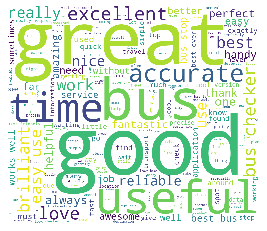

In [140]:
clean_postive = tokenToText(postive_token)
gener_wordcloud(clean_postive)

# Bus Times London: datasize:1219; overall rate: 3.74

In [3]:
londonMapWay = pd.read_excel('LondonMapWay.xlsx')
londonMapWay.head(2)

,Unnamed: 0,name,rating,date,upvotes,review
0,0,Karl Smith,1,"May 14, 2020",1,As a previous user of the Bus Times app I love...
1,1,Tony Stark,1,"April 13, 2020",2,"App says there are no buses running today, whe..."


In [4]:
londonMapWay.drop(['Unnamed: 0','name','date'],1, inplace = True) 
londonMapWay['rating'].value_counts()

5    606
4    216
1    214
2     95
3     88
Name: rating, dtype: int64

In [9]:
postive_review_londonMapWay = pd.DataFrame()
for i in range(londonMapWay.shape[0]):
   # print(londonRev.loc[i]['rating'])
    if londonMapWay.loc[i]['rating'] >= 4:
        #print('!!!')
        postive_review_londonMapWay = postive_review_londonMapWay.append(londonMapWay.loc[i])
print(postive_review_londonMapWay.shape)

(822, 3)


In [10]:
negative_review_londonMapWay = pd.DataFrame()
for i in range(londonMapWay.shape[0]):
   # print(londonRev.loc[i]['rating'])
    if londonMapWay.loc[i]['rating'] < 4:
        #print('!!!')
        negative_review_londonMapWay = negative_review_londonMapWay.append(londonMapWay.loc[i])
print(negative_review_londonMapWay.shape)

(397, 3)


## analyses negative reviews

In [11]:
negative_token = sep_token(negative_review_londonMapWay)
pd.Series(negative_token).value_counts()[:35]

  0%|          | 1/397 [00:00<02:32,  2.59it/s]

As a previous user of the Bus Times I it for it s useful information so much so that I the to unlock all unfortunately now the had a refresh and they have decided to run it as a subscription service and all the I to unlock have now been locked again behind their subscription model To have the same functionality I previously had they want off me And I feel that is totally unacceptable I for this Either refund or unlock


  1%|          | 2/397 [00:00<02:14,  2.94it/s]

there are no running today when other are going past


  1%|          | 3/397 [00:00<02:01,  3.25it/s]

Cant find a worse to put long in if you re in a rush and need to check the times and suddenly an ad up lasting Please sort this ad situation out Before you start saying you need the revenue from what I m meaning to say is cut the a lot shorter so people dont miss their


  1%|          | 4/397 [00:01<02:04,  3.15it/s]

You have to wait for an advert every time can never just check the bus times It extremely especially when you are waiting for an irregular bus
Very good most of the time Occasionally a none due status for all No reason given


  2%|▏         | 6/397 [00:01<01:41,  3.84it/s]

Too much and the bus time is not accurate The also none due when a bus is actually near by
are annoying


  2%|▏         | 8/397 [00:02<01:31,  4.26it/s]

Very angry It was the best on market when it was new it fast accurate easy to handle Now is the worst on market I can see for the the money first and and when the people want to see one thing when and where the next bus us coming That WAS the best and to do it Now full with Purpose lost And before you answer please don t I will switch to other free as you are not alone with your and not worth pay for it


  2%|▏         | 9/397 [00:02<01:26,  4.48it/s]

It used to be a good not ad and cannot skip it It no connection many times need to open and close the I do not have time to play


  3%|▎         | 10/397 [00:02<01:24,  4.58it/s]

Excessive You now have to watch a ad to use the with no option to skip Even You Tube t force that on you Times are pretty inaccurate too


  3%|▎         | 11/397 [00:02<01:24,  4.54it/s]

This used to be extremely reliable but ever since the latest update there are so many The biggest issue for me is the none due and no arrival times the entire objective of the Also the second refresh is incredibly annoying to back out of a bus stop and enter again is the way to update Bring back the pull down refresh option and sort out the arrival until then I m


  3%|▎         | 12/397 [00:02<01:24,  4.57it/s]

is very good But there is one major problem When a bus stop is closed or a route is on diversion it would be handy for the to tell us so we know where we re going before we leave out Nothing is more than walking a wasted to the bus stop and finding that the bus stop is closed or the whole route is on diversion Then you have to walk back onto yourself to get to another route Fix this major issue and I will give


  3%|▎         | 13/397 [00:03<01:23,  4.58it/s]

for new version t allow to check route without turning location setting on on certain bus stop doesnt allow to see when it s as it used to be i can choose to travel from few different bus via different so this new version made it all too complicated very disappointed will have to find alternative to this if it t change back to normal


  4%|▎         | 14/397 [00:03<01:22,  4.63it/s]

Absolute garbage The route planner is the worst part There was this one time where I to get from central to station and no matter how long i with the all I got was hour long where I to change onto three different but theres a bus that goes straight to in about half an hour Want to get this You re better off just getting on a bus and seeing what honestly


  4%|▍         | 15/397 [00:03<01:22,  4.64it/s]

Rarely reliable The bus times sometimes don t load on the for the bus stop I select At first I thought there were no due for a while but then I look at the on the actual bus stop itself and can see bus times showing When the bus times do show the times t always correct Arrival time for bus due but you select that bus and see it s away t make sense


  4%|▍         | 16/397 [00:03<01:21,  4.68it/s]

Advertising is loud and intrusive interfering with all other also interrupt quick urgent for so much so that I have several waiting on As you have said you need the advertising money but should there not be an option to at least mute the sound rather than to try and turn down the volume before my bleed


  4%|▍         | 17/397 [00:03<01:20,  4.73it/s]

While this works the attitude of the is that if you decline to rate the that they you with full screen rather than just the
Used to be a great but recently I m unable to see when are specific As a result I have had to a separate to do this and I m likely to Bus Times permanently Update Bus Times is working again but the lapse in service meant I instead


  5%|▌         | 20/397 [00:04<01:16,  4.91it/s]

I been just to review this awful and I take this opportunity to also delete it I understand you have to make money somehow but making me wait up to for an ad while I m desperately trying to see the bus times in a hurry is just sadistic I will switch to one of the other showing bus times which I should have done a long time ago
It is one thing to have a few on but not have them so excessive and at intrusive times that it it unfriendly to use is very


  6%|▌         | 22/397 [00:04<01:15,  4.97it/s]

Since the last update it just filled up with AD space and does not let you see any meaningful information They have purposefully made the on this so big that you are forced to navigate your way around all the that fill up the entire screen Complete waste now
Very unhappy with the last update Does not show the arrival accurately the font is way too big and not to mention the sec waiting for an automatic refresh is incredibly annoying used to be perfect before


  6%|▌         | 23/397 [00:05<01:15,  4.98it/s]

Very unreliable that are Due are usually and that are away for example can refresh later and be due There are times when the that a bus will not be due for when there are several before that and other times that there t any running at all
The old is fare more better than this I m in hurry the never the time due All the will say none due or the page goes blank for long time before showing the arrival


  7%|▋         | 26/397 [00:05<01:13,  5.05it/s]

the used to be very reliable bit recently it s much more hit and miss times from station for are almost always wrong nowadays please fix it
I don t want to be about switching my location ON Fix it I should be able to do a search without constantly being to switch my location ON


  7%|▋         | 28/397 [00:06<01:11,  5.15it/s]

Too many advertising Can t see and Home The old was much better Thanks
The update is terrible Half of the time the is not working also too many


  7%|▋         | 29/397 [00:06<01:11,  5.12it/s]

in general a really good although it does get it wrong occasionally but my main complaint is that i dont appreciate the when for pro version
Just because I dont pay for no ad s t mean you should flood my phone with unnecessary at unnecessary times I just need a bust time for punctuality I don t even click on it and it me to another link


  8%|▊         | 31/397 [00:06<01:13,  4.97it/s]

Too many for what this does it s silly plenty of ad free


  8%|▊         | 32/397 [00:06<01:22,  4.45it/s]

I prefer the old because it was much better to understand and more reliable and gave more information when the are due


  9%|▊         | 34/397 [00:07<01:18,  4.62it/s]

As soon as where added to this application it went down the drain Too busy trying to show me an add than the Information I require Enjoy the money tho
Will regularly say none due for that are running as usual Completely unreliable


  9%|▉         | 36/397 [00:07<01:12,  4.96it/s]

This stopped working and all as none due It was great when it worked
The bus times are hugely inaccurate There are plenty of other which are more up to date


 10%|▉         | 38/397 [00:08<01:10,  5.12it/s]

Only upcoming since an update t enough as I have two I could go tonight another bus so switching as if I d known the gap I d have gone the other way
used to work fine but now just a map with no or information on dont know wrong


 10%|█         | 40/397 [00:08<01:08,  5.18it/s]

Bloated with Shame because it worked so well before
This used of mobile data in one month all because of malicious video and image Absolute garbage


 11%|█         | 42/397 [00:08<01:08,  5.20it/s]

it is accurate sometimes and mostly its telling wrong and its not easy to use than other
actual bus time never what the for bus no also though bus is due as per and bus is present at starting point we have to to more than due time


 11%|█         | 44/397 [00:09<01:06,  5.29it/s]

timetable on not reflected in live
This was Then you put in video thats unacceptable i have switched to another


 12%|█▏        | 46/397 [00:09<01:06,  5.27it/s]

It the wrong address like instead of That s not much help
When I m trying to use the it can show but not the bus times


 12%|█▏        | 48/397 [00:10<01:06,  5.25it/s]

Underground great but don t expect to pay for a bus and get constant VERY POOR
Most of time are unavailable


 13%|█▎        | 50/397 [00:10<01:05,  5.27it/s]

use to work before now theres it dont it saying nothing due or all are due like
Sometimes when I tap it it previous not the one I now want to take


 13%|█▎        | 52/397 [00:10<01:05,  5.30it/s]

The are a real pest terrible awful
from to due often


 14%|█▎        | 54/397 [00:11<01:04,  5.30it/s]

I like the but currently t working properly on Android
stopped giving me the information I need me not due This is not helpful May have to delete It was a good


 14%|█▍        | 56/397 [00:11<01:04,  5.32it/s]

It s stopping working sometimes and it s annoying
annoying with no way to get rid in a hurry would happily pay but no where to do so


 15%|█▍        | 58/397 [00:11<01:04,  5.27it/s]

My bus was front of me and still said no bus available location everything was on but still no bus
Too much advertising when u open the


 15%|█▌        | 60/397 [00:12<01:03,  5.31it/s]

Not working again saying there are no due
Extremely bad t open


 16%|█▌        | 62/397 [00:12<01:03,  5.24it/s]

Its a bit slow but very informative
Too many


 16%|█▌        | 64/397 [00:13<01:04,  5.20it/s]

Too many pop
very bad nearly does not work any more


 17%|█▋        | 66/397 [00:13<01:03,  5.21it/s]

This recent version is all over the place
So many


 17%|█▋        | 68/397 [00:13<01:02,  5.22it/s]

sometimes overall good
It s


 18%|█▊        | 70/397 [00:14<01:03,  5.13it/s]

FIX THE ISSUE WERE IT SAYING NONE DUE FIX IT OR
Not working


 18%|█▊        | 72/397 [00:14<01:04,  5.04it/s]

Always missing
not working as good as before


 19%|█▊        | 74/397 [00:15<01:03,  5.12it/s]

When you need it most is not working
is not always accurate


 19%|█▉        | 76/397 [00:15<01:02,  5.18it/s]

never give correct times
Last update Terrible


 20%|█▉        | 78/397 [00:15<01:01,  5.15it/s]

works only at times
It too much space


 20%|██        | 80/397 [00:16<01:01,  5.15it/s]

the bus times are never correct
awful every bus is not due


 21%|██        | 82/397 [00:16<01:01,  5.15it/s]

Well it t always work
Its been eta for the past


 21%|██        | 84/397 [00:17<01:01,  5.11it/s]

I would give it as it up and nothing it let me show you around and nothing
Poor very poor It is all about advert then


 22%|██▏       | 86/397 [00:17<00:59,  5.19it/s]

It could be loot better
t work properly


 22%|██▏       | 88/397 [00:17<00:58,  5.25it/s]

Really bad
Its not on good


 23%|██▎       | 90/397 [00:18<00:59,  5.18it/s]

update now does nothing
Excellent


 23%|██▎       | 91/397 [00:18<01:00,  5.07it/s]

Even with on and location it still does not bring up the times lucky if it does hence To follow on since you have sold your soul to the devil and increase the all I get are and the actual doesnt even work Hence drop to star
Pointless now outdated by integration with The information you get from the provide freely to anyone who it and while they do have to make the and host it you can get all the information in making this obsolete Especially as you don t have to sit through any on there It s incredibly when you want to quickly open the to decide to get the bud coming or wait for another to be with a second ad just use


 24%|██▎       | 94/397 [00:19<00:59,  5.08it/s]

Don t pay for this Far too often every bus is shown as none due when in fact there are several within the time window Why can t they sort this out
What you really need when racing for a bus is an ad What a stupid idea Also the data is consistently wrong Don t install


 24%|██▍       | 96/397 [00:19<00:59,  5.09it/s]

uninstalled response to feedback request via still not as the old version too big review on The new update the user interface Note that this is for not To use large half screen least sense Please revert to old it was the best Another thing try check the and the no of and decide yourself Don t get me wrong this was light and good before
absolutely rubbish


 25%|██▍       | 98/397 [00:19<00:58,  5.08it/s]

completely inaccurate
inaccurate consistently


 25%|██▌       | 100/397 [00:20<00:57,  5.15it/s]


Why did you do this to your the are a real pain intrusive and embarrassing when they have sound it used to great now it s a ball ache to navigate


 26%|██▌       | 102/397 [00:20<00:57,  5.14it/s]

bad design
I have so i DON T get any That s the idea Why then is ad constantly being displayed at the bottom of the screen It s very annoying If i need i know to use Can i have my money back please I guess not


 26%|██▌       | 104/397 [00:20<00:55,  5.24it/s]

Intrusive



 27%|██▋       | 106/397 [00:21<00:55,  5.21it/s]

Terrible can t seem to detect arrival times for Mad me so late and so
was fantastic before the recent update however it is now trash Massive on your behalf I hope reverse the update or include live bus times again a lot when you work day and night and in a rush


 27%|██▋       | 108/397 [00:21<00:56,  5.14it/s]

Bring back old interface Harder to get to the Harder to reload the page Before I had to pull screen down to reload the page and see if the times now I need to find a little icon in the corner to do that
It no longer my regular bus stop and I walk to another stop to get a bus when my stop is a clearly a transport hub for and


 28%|██▊       | 110/397 [00:22<00:55,  5.16it/s]

After recent update It wrong times when due will due faster then it
After the last update the interface is in my opinion and most of the time in the evening it show that no is coming soon as if they have finished the as they do during the night What s the point of a bus timetable if it t show you the timetable


 28%|██▊       | 112/397 [00:22<00:56,  5.08it/s]

Since the update the is practically useless Please put old one back on
Amazing how many seem to like driving their into the ground The same thing to the official and now this Just this week on of the last days have been completely off sometimes inexplicably to something completely different not after refreshing repeatedly but after the and starting again And the and multiple for location now mean you re spending the first part of your experience fighting with this rather than getting your incorrect bus times I m happy to pay to remove if an works but this one does not reliably perform its primary function for me


 29%|██▊       | 114/397 [00:23<01:00,  4.71it/s]

Too many and sometimes completely up
It s


 29%|██▉       | 115/397 [00:23<01:00,  4.65it/s]

The most valued function of showing the reg of for all upcoming is gone It used to be a marvelous that bus choice of for some on earth do not necessarily go on a route based on destination I go by the bus I like and might end up on a different route and destination Not everyone travel with a fixed destination and ETA of the FIRST bus that comes is not the only thing for bus There might be a second bus that I want to know about the bus type that comes just a minute later Would have rated it a star if I could before this recent update But now it a negative rating
Very annoying Keep for location access in a row even after you said no New style of you cannot leave the to see bus times Used to be good Have to try out not happy with the


 30%|██▉       | 118/397 [00:23<00:56,  4.94it/s]

Was a good until you completely ruined it Why break something that actually works So irritating and annoying Will be and one that t desperate to cram in as many as possible over to functionality
Before the last update it was really good I always used it Now I can t find the bus I want the writing is too big I can t see the times for just one bus I don t like it at all I m switch to another


 30%|██▉       | 119/397 [00:24<00:56,  4.88it/s]

This used to be brilliant despite the INCESSANT Accurate plate arrival time on point but this new update basically this useless This is the time I have my bus this morning s example I checked the at the stated eta I leave the house immediately and walk the to my bus stop I get there check how long until arrival until the next bus I will be this in of another If I could give no I would sadly I cannot
Was great and then they made a small change I support and got no response A week later they a major change with no consultation whatsoever and the end result is I m moving to Shame really


 31%|███       | 122/397 [00:24<00:54,  5.06it/s]

Quite frankly awful Stated for a bus I outside immediately and bus was
Used to be a great but since the update I can t even see my local bus stop Used to be nice and simple now they have over complicated it


 31%|███       | 124/397 [00:25<00:53,  5.10it/s]

t tell you when your bus stop is closed you when the next bus is due at your stop even though the stop is closed so that you miss your bus and are late for work and then end up getting sacked because your boss will not believe such a weak story rubbish non just had a massive downgrade
Best I had and serving on my phone However the update just ruined everything t tell you the till of such a shame was a well used stress free Not


 32%|███▏      | 126/397 [00:25<00:52,  5.20it/s]

Worse update ever Can t see when bus after searching Really worse update Sorry now
The new update is terrible I uninstalled and a different bus time


 32%|███▏      | 128/397 [00:25<00:51,  5.20it/s]

Awful now following the update Please put it back to before the update when it was useful
I really dislike the new can t see when the next bus is due prefer the old


 33%|███▎      | 130/397 [00:26<00:50,  5.24it/s]

The was was the made are bad how can I get a downgrade for this
It was much better without the upgrade since then it s useless


 33%|███▎      | 132/397 [00:26<00:50,  5.21it/s]

Does exactly what it on the tin star because of the but cant ask from from a free
Update taken an intuitive and made it difficult to use


 34%|███▍      | 134/397 [00:26<00:49,  5.26it/s]

It was better before please change it back
I use can t even find it on the update version


 34%|███▍      | 136/397 [00:27<00:49,  5.32it/s]


Love this


 35%|███▍      | 138/397 [00:27<00:49,  5.26it/s]

Very I want to check going from marble arch to baker street and instead it me a walking map on how to walk there in It does this for several and to show me
Good


 35%|███▌      | 139/397 [00:27<00:50,  5.11it/s]

I think this is one of the few I ever written a review about The are so so intrusive You can t move until it they pop up so often it the a chore I m not a huge fan of but I understand why they re there and can tolerate them usually but the here are long terrible and
Is there any reason why this is constantly my location of times a day in the background when not in use Thank god for BlackBerry would have never know this was happening Would care to explain why this is happening battery power and data on an not being used


 36%|███▌      | 142/397 [00:28<00:49,  5.11it/s]

Pretty useless Search option t find obvious like rye then when you manually place the map bring up the local it simply itself back to some obscure location in
I gave it a low score because it could mean someone s job to Bus Times this one t refresh on its own while Bus Times does so every But the worst part is that this one is off Second day in the row On bus times it and it minute and unlike this one I think its and the bus come and gone


 36%|███▋      | 144/397 [00:28<00:49,  5.12it/s]

I have for the ad free version of this and every time I look at it I am with an ad If you like screen filling that you have to opt out from then this is the for you If you don t get city mapper it s free and the do not fill the screen doing you from the
on edge nougat Can t even open the it as soon as I try to load it


 37%|███▋      | 146/397 [00:29<00:48,  5.18it/s]

Too much of intrusive full screen
Too many And too small the cross for close


 37%|███▋      | 148/397 [00:29<00:48,  5.18it/s]

dreadful
Already for ad free long ago yet occasionally still with Have to continually restore purchase every time this Developer could really do with making ad free if they can t keep off for those who have for ad free


 38%|███▊      | 149/397 [00:29<00:49,  5.02it/s]

Intrusive full screen They show even when I full price for the this to support on multiple They don t care at all Yes I tried going to the remove page again for a short time but the come back again Both full screen and notification area


 38%|███▊      | 150/397 [00:30<00:49,  5.02it/s]

dismissal are so small you inevitably click to the link for what is being


 38%|███▊      | 151/397 [00:30<00:49,  4.98it/s]

Not accurate at all bus in and it said


 39%|███▊      | 153/397 [00:30<00:48,  4.98it/s]

Too many
Prefer old of the


 39%|███▉      | 154/397 [00:30<00:48,  5.00it/s]

This is fine I think it would be better if you could see the bus coming in real time on the map Also I agree with an comment not sure why the registration number so much prominence All in all it t really do anything different from other or even just
This does the but can be massively Location pop up is annoying and unnecessary Can be if you can see the bus on the map in real time the battery so much I have to put it to sleep every time I use it


 40%|███▉      | 157/397 [00:31<00:47,  5.06it/s]

This is rubbish advert are often annoying and poorly You are better off finding your stop on the and add to home screen
It t show all the It t give me the opportunity to look for a bus if I am not in the bus location I hate it I another for


 40%|███▉      | 158/397 [00:31<00:46,  5.09it/s]

The on galaxy edge android version Also my battery I did waste my money and bought the non advert version please avoid it or even pay any money
The for only some advertisement this is unclear and if I could find out how I would complain to Play Store I to remove however the continued to display an advertisement for a taxi service On the they t seem to think this as they were going to add tube Further were so I am the only way that might cause them to listen


 41%|████      | 161/397 [00:32<00:46,  5.13it/s]

Generally pretty terrible Had to something else as it just t reliable accurate and inconsistently won t update at all
The stopped showing the bus and telling me it only works in even though i live on Its broken


 41%|████      | 163/397 [00:32<00:45,  5.18it/s]

keep disappearing and have to load again now times in days
Just like this needs very precise wording when searching for try finding


 42%|████▏     | 165/397 [00:33<00:45,  5.12it/s]

Not used it live yet but Do love the fact that it bus registration In case of an incident or loss of property you can identify the bus you were on accurately
It you when the bus will be coming then comes minute s later


 42%|████▏     | 167/397 [00:33<00:44,  5.18it/s]

Useless for me
Full of


 43%|████▎     | 169/397 [00:33<00:43,  5.20it/s]

First day it and phantom just and times kept Terrible should have just stuck to guessing as that is less
Just use instead


 43%|████▎     | 171/397 [00:34<00:43,  5.18it/s]

RUBBISH Doesnt work
It well enough to tell you roughly when a bus will come But there are WAY too many


 44%|████▎     | 173/397 [00:34<00:43,  5.14it/s]

I it showing bus the bus Can t only find bus nearby not in
Could be better


 44%|████▍     | 174/397 [00:34<00:43,  5.13it/s]

for the no version But i keep getting alternative transport link advert which if you hit you to the in play store Not good i want a no version for which i for
Far from happy with this as it doesnt have every bus it of my but does not have the main one i use Needs to be


 45%|████▍     | 177/397 [00:35<00:42,  5.15it/s]

Works but t refresh automatically
Route finder you where the are but t say which number bus to take when you get there


 45%|████▌     | 179/397 [00:35<00:42,  5.16it/s]

for it and now I have again Da Hell And the restore link is dead and I done what the reply said at least a dozen times
It s good but sometimes I get hit with three before I can check the bus


 46%|████▌     | 181/397 [00:36<00:41,  5.19it/s]

Losing my occasionally without reason



 46%|████▌     | 182/397 [00:36<00:41,  5.15it/s]

Far too intrusive When you want to see bus times quickly you end up through two pop up in succession that invariably you end up accidentally so you down even more Can t recommend need not be this intrusive Even horrible free with t this bad
Rubbish of showing before you can use it really annoying it now


 47%|████▋     | 185/397 [00:36<00:41,  5.09it/s]

I have to refuse the location service a few times on every start Last time there were And much
Stupid number of just you it and becomes annoying Not always accurate and slow at times There are better out there


 47%|████▋     | 186/397 [00:37<00:44,  4.79it/s]

Rubbish one day it where you are at direct time as you open the and bus stop in your area so you can choose a bus stop location m for your journey But then other days it does the complete opposite and the page can t load up your direct location or display any bus noy even where you are at an exact moment


 47%|████▋     | 188/397 [00:37<00:42,  4.90it/s]

I m unstratified customer Either wrong bus or absolutely nothing but commercial
Does the job but it is annoying that two often appear as soon as I open the and it my ability to quickly check my bus


 48%|████▊     | 190/397 [00:37<00:40,  5.10it/s]

bus service is not good
The works well However the bus timing is far from accurate It s not clear of its an issue with the or the data store from where the the data


 48%|████▊     | 192/397 [00:38<00:39,  5.16it/s]

I have no times coming up now Even after refreshing and the again
this Although it can be temperamental and t always load very quickly Then I got a second political party message as an ad Have subsequently the


 49%|████▉     | 194/397 [00:38<00:39,  5.12it/s]

Not pin pointing bus properly Its preferable that just like out this is to spot bus
Won t let you scan the map around to find Won t search for address for Home or find it on a map you have to know the of the bus


 49%|████▉     | 196/397 [00:39<00:39,  5.11it/s]

is for bus times It is buggy and a variety of and regular full page A few days ago it a long list of T to agree to for a range of to steal my data and and share it with anyone in the world in not compatible with EU law I said no because I t trust the wording nor advertising who are probably lining up marketing e mail
Where is on Road Nowhere Where is the stop at the end of


 50%|████▉     | 197/397 [00:39<00:39,  5.12it/s]

Times are always incorrect
Very heavy on the full page mandatory Picture this you re in a rush heading out the door trying to pop into your to see when the bus is due You re forced to watch a full video first Then constantly to turn on your location Even though you don t need it because you simply want to check a stop you already saved I understand the need to advertise but this the usability of the Get bus pal instead


 50%|█████     | 200/397 [00:39<00:38,  5.10it/s]

with at certain bus for example is a major failure Otherwise good
Awful this


 51%|█████     | 202/397 [00:40<00:37,  5.16it/s]

when i search for a station
when searching


 51%|█████▏    | 204/397 [00:40<00:37,  5.16it/s]

Too many advertising
It simply t work You can t type the destination at all


 52%|█████▏    | 206/397 [00:41<00:36,  5.25it/s]

No Really



 52%|█████▏    | 208/397 [00:41<00:36,  5.13it/s]

Latest version Not able to see all at my nearest stop Only the next one
Terrible Have tried this three times now in different of at different times for different and it s hopeless It s currently telling me to walk around for before catching the wrong bus and getting out from where i want to get to when I know I can get a bus from here canning town station to where I need to go Very badly written


 53%|█████▎    | 210/397 [00:41<00:36,  5.19it/s]

I used to love this I have had it for but recently the are so intrusive that I give up trying to use it
to turn on location and is insistent on it Have to tell it or times no before it the hint


 53%|█████▎    | 212/397 [00:42<00:35,  5.18it/s]

Useful don t mind the but battery drain for me was per charge without even the if this is fixed I again
Every time I the my phone Useless


 54%|█████▎    | 213/397 [00:42<00:35,  5.15it/s]

just fill up the whole screen


 54%|█████▍    | 214/397 [00:42<00:36,  5.03it/s]

Too many


 54%|█████▍    | 215/397 [00:42<00:45,  3.99it/s]

Not always up to date not sure why it doesnt capture data


 54%|█████▍    | 216/397 [00:43<00:49,  3.66it/s]

Nice that does its job well However there are some For one the for location persistently comes up even if I don t want to use location There should really really be an option to disable it as it is incredibly annoying please do so In addition I am not interested in and have also for the premium version and so if possible I d like to remove the for too With these small the would be much much better But it is still a to use


 55%|█████▍    | 217/397 [00:43<00:46,  3.91it/s]

interface and massively intrusive full screen video make this hard to recommend Shame really because there s some of the that are rather good
Limited


 55%|█████▌    | 219/397 [00:43<00:41,  4.29it/s]

The advertising Pop up whole page in the crucial time to see what and when coming really


 55%|█████▌    | 220/397 [00:44<00:56,  3.14it/s]

Great but


 56%|█████▌    | 222/397 [00:44<00:49,  3.55it/s]

Bus are wrong does not go anywhere near A night bus does useless information
I for the advert free and it still me right after I open the application I just don t understand ho u dare to do it So annoying when I really have to know the next bus arrival and I must wait for a damn advert for disappearing


 56%|█████▌    | 223/397 [00:45<00:44,  3.91it/s]

Bus map
would be better if the or you have in had the ability to auto sort on your present location and or you can manually sort to your personal preference


 57%|█████▋    | 226/397 [00:45<00:36,  4.64it/s]

not up to date
Overrun with


 57%|█████▋    | 228/397 [00:46<00:34,  4.90it/s]

Timed when I open the still When I quickly need to see when the next bus is I have to wait for the video ad to finish before I can do anything
Every time I open it add first which is a time waste Fix it please


 58%|█████▊    | 230/397 [00:46<00:33,  5.05it/s]

Always wrong or t show a bus when there is one
Cack Zero so I can t plan to work worked perfectly fine


 58%|█████▊    | 232/397 [00:46<00:32,  5.09it/s]

Was great until you had to open it twice due to added immediately and use a better
Shame about the Otherwise


 59%|█████▉    | 234/397 [00:47<00:31,  5.15it/s]

Bus times are never correct Uninstalled
To much advertising


 59%|█████▉    | 236/397 [00:47<00:31,  5.19it/s]

Add night
Video are awful


 60%|█████▉    | 238/397 [00:48<00:30,  5.20it/s]

Hate Video
Taking money still showing


 60%|██████    | 240/397 [00:48<00:30,  5.15it/s]

Not bad
Why your suddenly stopped giving information for bus in The last time I checked was a Borough yet your will now only give for in Until this is sorted I m switching to another


 61%|██████    | 242/397 [00:48<00:29,  5.21it/s]

but
Used to be


 61%|██████▏   | 244/397 [00:49<00:29,  5.24it/s]

Rip Off
It s


 62%|██████▏   | 246/397 [00:49<00:29,  5.17it/s]

Does what its meant to do
Slow bloated buggy with aggressive advertising


 62%|██████▏   | 248/397 [00:50<00:28,  5.15it/s]

Went worse with each update section at the bottom too much space have been hidden inside another menu way too many now
Like the next bus at nearest Use a different for route finding are annoying


 63%|██████▎   | 250/397 [00:50<00:28,  5.20it/s]

Banner
Ruined


 63%|██████▎   | 252/397 [00:50<00:27,  5.23it/s]

Uninstalled
no


 64%|██████▍   | 254/397 [00:51<00:27,  5.21it/s]

I never had a less accurate bus always a bus is in when it s actually due in then the bus Randomly that a bus stop is closed when it t me so much hassle and was late to work because of that hell of an I feel sorry to anyone who s decided to purchase a full version of it
t work


 64%|██████▍   | 256/397 [00:51<00:27,  5.18it/s]

Why did you make this worse



 65%|██████▍   | 258/397 [00:51<00:27,  5.07it/s]

Too much
Its saying bus stopped


 65%|██████▌   | 260/397 [00:52<00:26,  5.08it/s]

not easy to use
Too many unnecessary Don t


 66%|██████▌   | 262/397 [00:52<00:26,  5.09it/s]

Not working
Often t work


 66%|██████▌   | 263/397 [00:52<00:26,  5.11it/s]

Why do I still have


 67%|██████▋   | 265/397 [00:53<00:26,  5.03it/s]

Could do with it being faster in the mornings
Poor


 67%|██████▋   | 267/397 [00:53<00:25,  5.10it/s]

b
Completely inaccurate


 68%|██████▊   | 269/397 [00:54<00:25,  5.12it/s]

Was fine before the latest update
Review


 68%|██████▊   | 271/397 [00:54<00:24,  5.11it/s]

No information
Was great until update and now are out so i end up seeing my bus drive off without me Sort this


 69%|██████▉   | 273/397 [00:54<00:23,  5.21it/s]


Great if you like


 69%|██████▉   | 275/397 [00:55<00:23,  5.16it/s]

I had to go back to this due to the search and bookmark function not being in However I don t like how intrusive the now are and they will use up date due to them being Luckily I have unlimited data but there are that do not Its also causing a lot of with my phone s awake time being because of it I don t see why it to keep for anything unless it is data EDIT WHY DOES A BUS NEED CALENDAR



 70%|██████▉   | 277/397 [00:55<00:23,  5.20it/s]

This is such a rubbish it is with which it s almost impossible not to get your phone while this I had to hard reset my phone twice in one single day as I mistakenly touched one of the then my phone went haywire Avoid it like plague
Stupid


 70%|███████   | 279/397 [00:56<00:22,  5.19it/s]

Just works when it to saying refresh if I m not on
Absolute rubbish con knock off of the original bus


 71%|███████   | 281/397 [00:56<00:22,  5.21it/s]

Good but old version better
too long to get into seeing bus times to May pop and


 71%|███████   | 282/397 [00:56<00:22,  5.16it/s]

Wrong times its wen I refresh it it more
crap


 72%|███████▏  | 285/397 [00:57<00:21,  5.13it/s]

Not working at all
Better Then


 72%|███████▏  | 287/397 [00:57<00:21,  5.06it/s]

With the location pop up up every time is just annoying shame that it cant be turned off
Will not work on


 73%|███████▎  | 289/397 [00:58<00:21,  5.13it/s]

Better before the update
Sort your ad


 73%|███████▎  | 290/397 [00:58<00:25,  4.25it/s]

 73%|███████▎  | 291/397 [00:58<00:25,  4.12it/s]

Don t bother


 74%|███████▎  | 292/397 [00:58<00:25,  4.17it/s]

Y


 74%|███████▍  | 293/397 [00:59<00:24,  4.28it/s]

are shown even after I to remove it


 74%|███████▍  | 294/397 [00:59<00:27,  3.76it/s]

The are


 74%|███████▍  | 295/397 [00:59<00:29,  3.42it/s]

I understand that we can pay to get rid of which the older version t have an option for but to have block the entire screen is taking it a bit too far If the only ran on the bottom of the screen that s fine It should then slide up to take up the whole page and stop you from searching for the latest on the stop you are at Great update with new interface Poor advertising tactics


 75%|███████▍  | 296/397 [00:59<00:27,  3.67it/s]

Used to love this but now


 75%|███████▍  | 297/397 [01:00<00:26,  3.77it/s]

Unhappy with


 75%|███████▌  | 298/397 [01:00<00:25,  3.87it/s]

This used to be a good It s now full of and useless Avoid


 75%|███████▌  | 299/397 [01:00<00:25,  3.80it/s]

Getting better but did I miss


 76%|███████▌  | 300/397 [01:00<00:24,  3.99it/s]

Last version is horrible


 76%|███████▌  | 302/397 [01:01<00:21,  4.42it/s]

Was good
Inaccurate


 76%|███████▋  | 303/397 [01:01<00:20,  4.64it/s]

t show bus times not live


 77%|███████▋  | 305/397 [01:01<00:19,  4.78it/s]

Needs a better bus stop map search Ideally show time of bus in addition to away Needs ability to reorder Search button needs to be added to menu Overall better then some other but if all the above were added I would definitely pay to remove
for a stop There is no easy way to find the Search function


 77%|███████▋  | 306/397 [01:02<00:23,  3.91it/s]

Used to be good


 77%|███████▋  | 307/397 [01:02<00:23,  3.86it/s]

Annoying If you don t have on you have to clear a pop up several times Then clear a full screen ad Then clear the pop up again are now hidden in a menu which is not very user friendly as you use these of the time


 78%|███████▊  | 308/397 [01:02<00:22,  3.99it/s]

Bus was my favorite Recently they have sec which can t be stopped this is in addition to other When you are on the go and need to check bus times this is more than Added to this the often data telling me that there is no bus within from every single route in Afraid it again this morning think I may have to and pay a small amount for reliability and to ensure that I m free from pesky


 78%|███████▊  | 310/397 [01:03<00:20,  4.18it/s]

Too many
all the time


 78%|███████▊  | 311/397 [01:03<00:19,  4.37it/s]

IT S BUT TOO MANY
Update the bus


 79%|███████▉  | 314/397 [01:04<00:16,  4.92it/s]

Was really great
Completely unusable


 79%|███████▉  | 315/397 [01:04<00:17,  4.73it/s]

 80%|███████▉  | 316/397 [01:04<00:17,  4.69it/s]

Unreliable


 80%|███████▉  | 317/397 [01:04<00:17,  4.45it/s]

near you doesnt work properly It from a very low zoom level instead of street level where you need it When you zoom in the bus near you are not marked or tappable in any way just the bus icon that i could get any way from I need to know the next bus that is coming at my current stop I dont know the or street of where I am and the already where I am


 80%|████████  | 318/397 [01:05<00:17,  4.59it/s]

Unreliable


 80%|████████  | 319/397 [01:05<00:16,  4.68it/s]

Really


 81%|████████  | 320/397 [01:05<00:16,  4.74it/s]

Too much
Not good as version


 81%|████████▏ | 323/397 [01:05<00:14,  5.00it/s]

No departure
Its


 82%|████████▏ | 325/397 [01:06<00:14,  5.06it/s]

Buggy
Generally a very useful and reliable But not been working for the last days and I get the saying departure information unavailable


 82%|████████▏ | 327/397 [01:06<00:13,  5.12it/s]

Does what I need
Not too bad


 83%|████████▎ | 328/397 [01:06<00:13,  5.12it/s]

Temperamental


 83%|████████▎ | 330/397 [01:07<00:13,  4.92it/s]

Crash
It s doing good and bad at the same time


 83%|████████▎ | 331/397 [01:07<00:13,  4.95it/s]

 84%|████████▎ | 332/397 [01:07<00:15,  4.14it/s]

working after a while


 84%|████████▍ | 334/397 [01:08<00:14,  4.46it/s]

Confused



 85%|████████▍ | 336/397 [01:08<00:13,  4.49it/s]

Possibly the worst least user friendly intuitive responsive I ever had the displeasure of
Treating Android poorly


 85%|████████▌ | 338/397 [01:09<00:12,  4.78it/s]

I have this prog on my and on my Android tablet On my it works beautifully On my Android tablet it is a half mess Why can t I save my Why no refresh option Why so much work to get to the bus data I could go on but what would be the point I think the developer should either do as good a job on the android platform as they do with or just forget about it
Faulty


 85%|████████▌ | 339/397 [01:09<00:11,  4.91it/s]

Disappointed with new update


 86%|████████▌ | 340/397 [01:09<00:11,  4.88it/s]

Poor update


 86%|████████▌ | 341/397 [01:09<00:11,  4.88it/s]

Where the oyster card


 86%|████████▌ | 342/397 [01:10<00:11,  4.82it/s]

have made this unusable


 86%|████████▋ | 343/397 [01:10<00:11,  4.73it/s]

what the hell i the Oyster checker i love great works well very up to date with he bus a bit when trying to the route you want and why why why why get rid of the Oyster card balance checker otherwise it would be the oyster card checker back


 87%|████████▋ | 344/397 [01:10<00:11,  4.82it/s]

Crazy advertising
But


 87%|████████▋ | 347/397 [01:11<00:09,  5.01it/s]

version much better
Bus live


 88%|████████▊ | 349/397 [01:11<00:09,  5.07it/s]


Record audio


 88%|████████▊ | 351/397 [01:11<00:09,  5.09it/s]

Modify calendar without my consent
No


 89%|████████▉ | 353/397 [01:12<00:08,  5.00it/s]

Horrible
Needs work


 89%|████████▉ | 355/397 [01:12<00:08,  5.04it/s]

Rubbish
Please fix bookmark and refresh for android


 90%|████████▉ | 357/397 [01:13<00:07,  5.10it/s]

Useless
No better than


 90%|█████████ | 359/397 [01:13<00:07,  5.15it/s]

Could do with bug
Not great


 91%|█████████ | 361/397 [01:13<00:06,  5.16it/s]

Accurate but annoying
t save


 91%|█████████▏| 363/397 [01:14<00:06,  5.19it/s]

Rubbish
Works well


 92%|█████████▏| 365/397 [01:14<00:06,  5.19it/s]

Unstable
Reading calendar not cool


 92%|█████████▏| 367/397 [01:14<00:05,  5.17it/s]

due to and ad s
Was great


 93%|█████████▎| 368/397 [01:15<00:05,  5.06it/s]

The pop up that have recently were extremely annoying to the point I to the a couple of ago The ad may have like a good idea in the marketing meeting but if you can t see the you want to use the for it the completely pointless That made me really want to delete this and begin something else Now the flashing horror film ad that my screen just now given me all the motivation I need to seek another


 93%|█████████▎| 369/397 [01:15<00:05,  5.05it/s]

Send without knowledge


 93%|█████████▎| 370/397 [01:15<00:05,  4.93it/s]

This was wonderful It you and nearby Now wherever I am it Come on Sort it


 93%|█████████▎| 371/397 [01:15<00:05,  4.84it/s]

I hate the new update and look of the The old look was better and easier to use than this one


 94%|█████████▎| 372/397 [01:15<00:05,  4.86it/s]

Invasive Poor stability But good for bus in


 94%|█████████▍| 373/397 [01:16<00:05,  4.75it/s]

The bus time schedule and not it was working in past few days or too but now it s all gone what to it and there s no refresh option button


 94%|█████████▍| 374/397 [01:16<00:04,  4.70it/s]

t work


 95%|█████████▍| 376/397 [01:16<00:04,  4.78it/s]

Wrong
Not accurate


 95%|█████████▍| 377/397 [01:17<00:04,  4.76it/s]

It s good although the times can be completely wrong But needs less and more work on the times it us
Recently they have some which are undeleted I find this most annoying


 96%|█████████▌| 380/397 [01:17<00:03,  4.90it/s]

Rubbish it never said what bus to get only how long it took to walk to destination
Badly designed


 96%|█████████▌| 382/397 [01:18<00:03,  4.96it/s]

New access request unacceptable uninstalled
A waste of storage space and data


 97%|█████████▋| 384/397 [01:18<00:02,  4.90it/s]

Great when first now won t work great shame have it
Does not work Rubbish


 97%|█████████▋| 385/397 [01:18<00:02,  4.79it/s]

Privacy


 97%|█████████▋| 386/397 [01:18<00:02,  4.78it/s]

with advertising and quite slow


 97%|█████████▋| 387/397 [01:19<00:02,  4.75it/s]

Worst ever


 98%|█████████▊| 388/397 [01:19<00:01,  4.78it/s]

add


 98%|█████████▊| 389/397 [01:19<00:01,  4.78it/s]

Won t Install


 98%|█████████▊| 390/397 [01:19<00:01,  4.75it/s]

Better bus out there


 98%|█████████▊| 391/397 [01:19<00:01,  4.59it/s]

I like it


 99%|█████████▊| 392/397 [01:20<00:01,  4.44it/s]

VERY BAD


 99%|█████████▉| 393/397 [01:20<00:00,  4.23it/s]

I hate it


 99%|█████████▉| 394/397 [01:20<00:00,  4.13it/s]

 99%|█████████▉| 395/397 [01:20<00:00,  4.12it/s]

100%|█████████▉| 396/397 [01:21<00:00,  4.15it/s]

100%|██████████| 397/397 [01:21<00:00,  4.14it/s]

Not bad


bus         139
times        56
time         39
update       37
due          33
get          30
good         28
stop         27
use          25
see          24
better       24
one          23
much         23
ad           23
used         23
work         22
annoying     21
even         21
need         21
many         20
location     20
version      19
really       19
want         17
screen       17
like         17
great        17
wrong        15
working      14
would        14
full         14
every        13
show         13
back         13
another      13
dtype: int64

In [12]:
n = [3,4,5]
a = pd.Series([y for x in n for y in ngrams(negative_token,x)]).value_counts()
a[:10]

(see, bus, times)                  4
(bus, stop, closed)                4
(intrusive, full, screen)          3
(comes, minute, later)             2
(refresh, incredibly, annoying)    2
(showing, bus, times)              2
(next, bus, due)                   2
(bus, times, never)                2
(see, next, bus)                   2
(say, none, due)                   2
dtype: int64

In [13]:
c = Counter([' '.join(y) for x in [3,4,5] for y in ngrams(negative_token,x)])
df_test = pd.DataFrame({'ngrams': list(c.keys()),'count': list(c.values())})
df_test[:10]

,ngrams,count
0,previous user bus,1
1,user bus times,1
2,bus times useful,1
3,times useful information,1
4,useful information much,1
5,information much unlock,1
6,much unlock unfortunately,1
7,unlock unfortunately refresh,1
8,unfortunately refresh decided,1
9,refresh decided run,1


In [14]:
clean_negative = tokenToText(negative_token)
clean_negative

'previous user bus times useful information much unlock unfortunately refresh decided run subscription service unlock locked behind subscription model functionality previously want feel totally unacceptable either refund unlock running today going past cant find worse put long rush need check times suddenly ad lasting please sort ad situation start saying need revenue meaning say cut lot shorter people dont miss wait advert every time never check bus times extremely especially waiting irregular bus good time occasionally none due status reason given much bus time accurate also none due bus actually near annoying angry best market new fast accurate easy handle worst market see money first people want see one thing next bus us coming best full purpose lost answer please switch free alone worth pay used good ad skip connection many times need open close time play excessive watch ad use option skip even tube force times pretty inaccurate used extremely reliable ever since latest update man

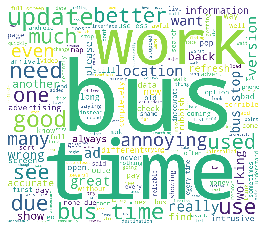

In [15]:
gener_wordcloud(clean_negative)

## analyses positive reviews

In [16]:
postive_token = sep_token(postive_review_londonMapWay)
pd.Series(postive_token).value_counts()[:35]

  0%|          | 1/822 [00:00<04:45,  2.88it/s]

This bus is very good I can see when my bus is due


  0%|          | 2/822 [00:00<04:20,  3.14it/s]

I totally enjoy it as it you how long you have to wait for a bus I m so glad to have it


  0%|          | 3/822 [00:00<04:19,  3.15it/s]

I love the a lot to check bus times


  0%|          | 4/822 [00:01<04:27,  3.06it/s]

Very reliable indeed


  1%|          | 5/822 [00:01<04:53,  2.78it/s]

Use this as use to get around for work


  1%|          | 6/822 [00:02<05:06,  2.66it/s]

Incredibly useful you when are due so you can plan your journey effectively and avoid long at the bus stop Also very quickly to your change of location love it


  1%|          | 7/822 [00:02<04:26,  3.06it/s]

Great for finding nearby bus and to when the bus is


  1%|          | 8/822 [00:02<03:59,  3.40it/s]

very good times are accurate are shown when bus stop is in nearby a bus once used this and caught the next on a different route within extremely helpful perfect


  1%|          | 9/822 [00:02<04:06,  3.30it/s]

terrible to version wilk not find nearby goes straight to NOW U GET A STAR EVEN BETTER THAN now thats saying all credit u have fixed the main that concerned me Now dont mess about with it please


  1%|          | 10/822 [00:03<04:19,  3.13it/s]

Good but the ad cannot be closed down It MUST be
Sometimes bus information inaccurate or not available but mostly I find this very good and I m much happier with it than without it


  1%|▏         | 12/822 [00:03<03:38,  3.71it/s]

Great for helping me find out when the next bus


  2%|▏         | 13/822 [00:03<03:34,  3.77it/s]

Really easy to get around when you have an idea when the bus is come am happy for that good job


  2%|▏         | 14/822 [00:04<04:01,  3.34it/s]

Excellent clean intuitive real time bus journey planner


  2%|▏         | 15/822 [00:04<04:19,  3.11it/s]

Amazing all the time very and me and my arrive to school on time


  2%|▏         | 16/822 [00:04<04:00,  3.35it/s]

it me plan my journey meticulously without any hassle fact l enjoy riding on the bus to work every day Excellent


  2%|▏         | 17/822 [00:05<04:35,  2.92it/s]

Does what it are intrusive but easily


  2%|▏         | 18/822 [00:05<04:11,  3.20it/s]

Got the to the bus stop on time every time So glad i found out about this you know it is very useful


  2%|▏         | 19/822 [00:05<03:51,  3.47it/s]

it is accurate of the time but the time up as it keep track of the time


  2%|▏         | 20/822 [00:06<04:07,  3.25it/s]

very accurate bus and it your location so ensure its on before use
Excellent Easy to use and accurate


  3%|▎         | 22/822 [00:06<03:32,  3.76it/s]

Great up to date bus travel information


  3%|▎         | 23/822 [00:06<03:23,  3.93it/s]

A brilliant
Very accurate most of the time


  3%|▎         | 25/822 [00:07<03:28,  3.82it/s]

Bus us everywhere in And some are so far


  3%|▎         | 26/822 [00:07<03:34,  3.70it/s]

so handy to have very accurate


  3%|▎         | 27/822 [00:08<03:59,  3.32it/s]

Good and reliable


  3%|▎         | 28/822 [00:08<03:36,  3.67it/s]

Very good and reliable


  4%|▎         | 29/822 [00:08<03:43,  3.55it/s]

Day on the and it is already so amazing


  4%|▎         | 30/822 [00:08<03:31,  3.74it/s]

Excellent and useful always


  4%|▍         | 31/822 [00:09<03:54,  3.37it/s]

Help me to plan my journey


  4%|▍         | 32/822 [00:09<04:14,  3.10it/s]

This is really helpful its great


  4%|▍         | 33/822 [00:09<04:13,  3.11it/s]

very useful easy to use


  4%|▍         | 34/822 [00:10<04:20,  3.03it/s]

Really easy to use


  4%|▍         | 35/822 [00:10<03:59,  3.29it/s]

It my travel so easy


  4%|▍         | 36/822 [00:10<03:58,  3.30it/s]

The best for


  5%|▍         | 37/822 [00:11<03:57,  3.31it/s]

excellent just excellent


  5%|▍         | 38/822 [00:11<04:09,  3.14it/s]

Very good service


  5%|▍         | 39/822 [00:11<04:45,  2.74it/s]

Fast and accurate


  5%|▍         | 40/822 [00:12<04:21,  2.99it/s]

My bus easier more fun


  5%|▌         | 42/822 [00:12<03:30,  3.70it/s]

Easy to catch the bus
A really useful


  5%|▌         | 44/822 [00:13<03:14,  4.00it/s]

Sometimes no information
It s really helpful


  5%|▌         | 45/822 [00:13<03:30,  3.69it/s]

out of


  6%|▌         | 47/822 [00:13<03:05,  4.19it/s]

very high quality
nice fast


  6%|▌         | 48/822 [00:13<02:56,  4.39it/s]

it was very but was hard to set it up and I t understand but you should it if you are smart I m still smart


  6%|▌         | 49/822 [00:14<02:58,  4.32it/s]

Top


  6%|▌         | 50/822 [00:14<02:52,  4.46it/s]

Best bus


  6%|▌         | 51/822 [00:14<03:00,  4.28it/s]

I always my self before coming out of the house


  6%|▋         | 52/822 [00:15<03:40,  3.49it/s]

Love the


  6%|▋         | 53/822 [00:15<03:55,  3.27it/s]

good for travel


  7%|▋         | 54/822 [00:15<04:08,  3.09it/s]

very good up to date


  7%|▋         | 56/822 [00:16<03:30,  3.64it/s]

me and freedom
I t be without the


  7%|▋         | 57/822 [00:16<03:14,  3.94it/s]

It is so amazing


  7%|▋         | 59/822 [00:17<03:17,  3.87it/s]

Bus is Always on time
easy to use


  7%|▋         | 60/822 [00:17<03:40,  3.45it/s]

It is good


  7%|▋         | 61/822 [00:17<04:05,  3.09it/s]

correct


  8%|▊         | 62/822 [00:18<03:46,  3.36it/s]

Top Man Job


  8%|▊         | 63/822 [00:18<03:32,  3.58it/s]

Very good my


  8%|▊         | 64/822 [00:18<03:16,  3.86it/s]

Yar its good


  8%|▊         | 65/822 [00:18<03:18,  3.81it/s]

Very useful


  8%|▊         | 66/822 [00:18<03:09,  3.99it/s]

Very good


  8%|▊         | 67/822 [00:19<03:19,  3.78it/s]

Very good


  8%|▊         | 68/822 [00:19<03:11,  3.94it/s]

Awesome


  8%|▊         | 69/822 [00:19<03:01,  4.16it/s]

Good


  9%|▊         | 70/822 [00:19<03:00,  4.17it/s]

have made it the best


  9%|▊         | 71/822 [00:20<03:16,  3.82it/s]

Love it


  9%|▉         | 72/822 [00:20<03:10,  3.93it/s]

Excellent


  9%|▉         | 73/822 [00:20<03:18,  3.77it/s]

Good
Fantastic


  9%|▉         | 75/822 [00:21<02:58,  4.18it/s]

good


  9%|▉         | 76/822 [00:21<03:05,  4.02it/s]

amazing


  9%|▉         | 77/822 [00:21<02:55,  4.25it/s]

Excellent service


  9%|▉         | 78/822 [00:21<02:48,  4.41it/s]

Awesome


 10%|▉         | 79/822 [00:22<03:05,  4.01it/s]

Excellent


 10%|▉         | 80/822 [00:22<03:03,  4.05it/s]

Awesome


 10%|▉         | 81/822 [00:22<03:09,  3.92it/s]

Good


 10%|▉         | 82/822 [00:22<03:01,  4.09it/s]

you what time the bus will arrive to the minute but sometimes it is not as accurate as but generally very good It also you the registration number of the bus as well Times of generally correct Much better than other I have used Shame other bus are not as good for non Bus stop are shown very useful if you have to get off train and use bus Planner though does not work


 10%|█         | 83/822 [00:23<02:55,  4.20it/s]

Very good


 10%|█         | 84/822 [00:23<02:52,  4.28it/s]

It


 10%|█         | 85/822 [00:23<02:46,  4.42it/s]

good experience


 10%|█         | 86/822 [00:23<02:54,  4.22it/s]

top quality


 11%|█         | 87/822 [00:24<02:54,  4.22it/s]

Extremely good


 11%|█         | 88/822 [00:24<02:52,  4.26it/s]

GOOD


 11%|█         | 89/822 [00:24<03:16,  3.72it/s]

the best


 11%|█         | 90/822 [00:24<03:19,  3.67it/s]

Great


 11%|█         | 91/822 [00:25<03:07,  3.90it/s]

Good


 11%|█         | 92/822 [00:25<03:01,  4.02it/s]

Great To improve consider when bus is close by


 11%|█▏        | 94/822 [00:25<02:45,  4.41it/s]

so far
its


 12%|█▏        | 96/822 [00:26<02:31,  4.79it/s]

great
on point


 12%|█▏        | 97/822 [00:26<02:33,  4.73it/s]

 12%|█▏        | 98/822 [00:26<02:32,  4.76it/s]

wonderful experience


 12%|█▏        | 100/822 [00:27<02:27,  4.89it/s]

great
Always reliable


 12%|█▏        | 101/822 [00:27<03:34,  3.37it/s]

excellent


 12%|█▏        | 102/822 [00:27<03:47,  3.16it/s]

Always spot on with bus times never me down would recommend this I have found it most helpful still this is extremely helpful and bus timetable are always spot on


 13%|█▎        | 103/822 [00:28<03:52,  3.09it/s]

Reliable service assist to plan and help to save time


 13%|█▎        | 104/822 [00:28<03:41,  3.25it/s]

So helpful


 13%|█▎        | 105/822 [00:28<03:40,  3.24it/s]

Very good very happy with it


 13%|█▎        | 106/822 [00:29<03:33,  3.36it/s]

Good timing


 13%|█▎        | 107/822 [00:29<03:36,  3.31it/s]

Very Effective


 13%|█▎        | 108/822 [00:29<03:50,  3.10it/s]

Very reliable


 13%|█▎        | 110/822 [00:30<03:27,  3.43it/s]

good service
Excellent


 14%|█▎        | 112/822 [00:30<02:56,  4.03it/s]

quite
excellent


 14%|█▎        | 113/822 [00:31<03:05,  3.81it/s]

good


 14%|█▍        | 114/822 [00:31<03:00,  3.92it/s]

great


 14%|█▍        | 115/822 [00:31<02:52,  4.09it/s]

great


 14%|█▍        | 116/822 [00:31<02:49,  4.17it/s]

Always on time
on point


 14%|█▍        | 119/822 [00:32<02:32,  4.61it/s]

Useful
Great stuff


 15%|█▍        | 120/822 [00:32<02:29,  4.71it/s]

good


 15%|█▍        | 121/822 [00:32<03:04,  3.81it/s]

Amazing


 15%|█▍        | 122/822 [00:33<02:57,  3.95it/s]

great


 15%|█▍        | 123/822 [00:33<02:53,  4.02it/s]

Good


 15%|█▌        | 124/822 [00:33<02:44,  4.23it/s]

Useful


 15%|█▌        | 125/822 [00:33<03:07,  3.72it/s]

This is alright I bought it to avoid the I dont know why they made the bus so large a list was more


 15%|█▌        | 126/822 [00:34<03:14,  3.57it/s]

Always helpful


 15%|█▌        | 127/822 [00:34<03:28,  3.34it/s]

Good


 16%|█▌        | 128/822 [00:34<03:45,  3.08it/s]

Love wish it had more though


 16%|█▌        | 129/822 [00:35<03:27,  3.33it/s]

It s very reliable


 16%|█▌        | 130/822 [00:35<03:09,  3.65it/s]

Great work thanks


 16%|█▌        | 131/822 [00:35<03:02,  3.79it/s]

Mostly reliable


 16%|█▌        | 132/822 [00:35<02:56,  3.90it/s]

No bus the time it it arrive made my journey much easier


 16%|█▌        | 133/822 [00:36<02:46,  4.15it/s]

Really useful the are a little annoying
Think it s great super handy


 16%|█▋        | 135/822 [00:36<02:36,  4.38it/s]

Invaluable information to help on the journey to and from work


 17%|█▋        | 136/822 [00:36<02:44,  4.17it/s]

It s a perfect


 17%|█▋        | 137/822 [00:37<03:13,  3.55it/s]

Very useful Always me plan my time in line with catching the bus


 17%|█▋        | 138/822 [00:37<03:18,  3.44it/s]

I like it but for the past week I can t get it thinking of it It worked fine previous to this


 17%|█▋        | 139/822 [00:37<03:35,  3.17it/s]

very simple to use great worth the upgrade to remove the


 17%|█▋        | 140/822 [00:38<03:17,  3.46it/s]

Made a BIG difference to getting around


 17%|█▋        | 141/822 [00:38<03:45,  3.02it/s]

Very very handy


 17%|█▋        | 142/822 [00:38<03:53,  2.92it/s]

Good and accurate
It s amazing


 18%|█▊        | 144/822 [00:39<03:38,  3.11it/s]

Great very helpful and informative


 18%|█▊        | 145/822 [00:39<03:19,  3.39it/s]

I m very happy with the it does everything I want it to do


 18%|█▊        | 146/822 [00:40<03:25,  3.30it/s]

It is a useful


 18%|█▊        | 147/822 [00:40<03:19,  3.38it/s]

A very well done clean responsive I to remove and its lovely one thing I d change is how the buss times are laid out could of been done in a more pleasing aesthetic but for sure


 18%|█▊        | 148/822 [00:40<03:00,  3.73it/s]

Well it s the best on and very accurate I have got on my phone as well


 18%|█▊        | 149/822 [00:40<02:49,  3.96it/s]

As good as any other bus


 18%|█▊        | 150/822 [00:41<03:00,  3.72it/s]

Some times a bit complicated


 18%|█▊        | 151/822 [00:41<03:17,  3.39it/s]

Excellent always so accurate


 18%|█▊        | 152/822 [00:41<03:20,  3.34it/s]

Good


 19%|█▊        | 153/822 [00:41<03:02,  3.66it/s]

I love this


 19%|█▊        | 154/822 [00:42<02:56,  3.79it/s]

Very good to use and easy


 19%|█▉        | 156/822 [00:42<02:53,  3.84it/s]

Works really well
Excellent


 19%|█▉        | 157/822 [00:42<02:43,  4.07it/s]

Good


 19%|█▉        | 158/822 [00:43<02:45,  4.00it/s]

We no when the bus us coming


 19%|█▉        | 159/822 [00:43<02:51,  3.86it/s]

I have re rated this as after a reply from the developer It is still the best bus Sometimes intermittently and transiently the showing data of East I guess that is down to the from and not the developer s fault


 19%|█▉        | 160/822 [00:43<02:58,  3.71it/s]

I think this is really nice but what you can improve on is the rout you can put it on a map instead


 20%|█▉        | 161/822 [00:43<02:48,  3.93it/s]

Brilliant idea save time


 20%|█▉        | 162/822 [00:44<02:41,  4.09it/s]

Very practical Thank you


 20%|█▉        | 163/822 [00:44<02:57,  3.70it/s]

The is very good and helpful


 20%|█▉        | 164/822 [00:44<02:45,  3.97it/s]

I can t change the journey direction assist


 20%|██        | 165/822 [00:45<03:27,  3.16it/s]

I do like this


 20%|██        | 166/822 [00:45<03:30,  3.11it/s]

Good so far


 20%|██        | 167/822 [00:45<03:28,  3.14it/s]

Brilliant


 20%|██        | 168/822 [00:46<03:28,  3.13it/s]

Cool


 21%|██        | 169/822 [00:46<03:26,  3.17it/s]

Brilliant


 21%|██        | 170/822 [00:46<03:47,  2.87it/s]

Great


 21%|██        | 171/822 [00:47<03:25,  3.17it/s]

I really enjoy the It me real time arrival times for my chosen bus However I would love if the t pop up that I need to turn on my location every time I go to a or my home stop The reason I save and a home stop is so I don t need to drain my battery by keeping my location turned on all the time Please fix this


 21%|██        | 172/822 [00:47<03:46,  2.87it/s]

I forgot how to feel before this Now not only can I feel again but also my


 21%|██        | 173/822 [00:47<03:31,  3.06it/s]

Use this all the time However I can t find how to change my Home Stop


 21%|██        | 174/822 [00:48<03:36,  2.99it/s]

Now I don t have to wait to long at the bus stop


 21%|██▏       | 175/822 [00:48<03:12,  3.36it/s]

what i would do without this


 21%|██▏       | 176/822 [00:48<03:18,  3.26it/s]

I m very happy about this the most important thing is real time and I appreciate that


 22%|██▏       | 177/822 [00:49<03:37,  2.96it/s]

Great little useful and very precise


 22%|██▏       | 178/822 [00:49<03:34,  3.01it/s]

Must have for finding live bus times in


 22%|██▏       | 179/822 [00:49<03:48,  2.82it/s]

One of the most useful thats available on the play store


 22%|██▏       | 180/822 [00:50<03:44,  2.86it/s]

Travel made easy helpful Not misleading


 22%|██▏       | 181/822 [00:50<03:52,  2.75it/s]

Is good and easy to use


 22%|██▏       | 182/822 [00:51<04:10,  2.55it/s]

Good well done


 22%|██▏       | 183/822 [00:51<04:18,  2.47it/s]

Excellent and very A


 22%|██▏       | 184/822 [00:51<03:53,  2.73it/s]

It is a decent


 23%|██▎       | 185/822 [00:52<03:28,  3.05it/s]

Great


 23%|██▎       | 186/822 [00:52<03:10,  3.33it/s]

Great


 23%|██▎       | 187/822 [00:52<03:01,  3.49it/s]

This is an efficient several in place Able to set a home stop as well as most used The journey planner is useful and several in to to specific The nearby function is great as it if you are in a location never to before Being able to specify a particular route is also useful I use on a daily basis and not to provide the I need


 23%|██▎       | 189/822 [00:52<02:36,  4.05it/s]

The is great but the ability to restore the remove option t work
Pretty spot on Use it every time i use the bus


 23%|██▎       | 190/822 [00:53<02:24,  4.39it/s]

Brilliant for both public and bus


 23%|██▎       | 191/822 [00:53<02:28,  4.25it/s]

Great Does what it on the tin


 23%|██▎       | 192/822 [00:53<02:50,  3.69it/s]

Good and useful Accurate


 24%|██▎       | 194/822 [00:54<02:27,  4.25it/s]

Great service
The best


 24%|██▎       | 195/822 [00:54<02:47,  3.74it/s]

it


 24%|██▍       | 196/822 [00:54<03:32,  2.95it/s]

decent


 24%|██▍       | 197/822 [00:55<03:59,  2.61it/s]

Very good service Love it


 24%|██▍       | 198/822 [00:55<03:34,  2.91it/s]

Even detect Hail Ride IMPRESSIVE


 24%|██▍       | 199/822 [00:55<03:19,  3.12it/s]

A must have for a tourist


 24%|██▍       | 200/822 [00:56<03:22,  3.08it/s]

I m with it


 24%|██▍       | 201/822 [00:56<03:05,  3.35it/s]

Never lost with this do need for it though


 25%|██▍       | 202/822 [00:56<02:48,  3.68it/s]

I m not hanging around waiting at the bus wondering when the next bus is due Especially now that most no longer have a board Downside is working out which direction the stop


 25%|██▍       | 203/822 [00:56<02:38,  3.89it/s]

As long as you can connect to the server when you need to this is pretty reliable Very occasionally a bus route t appear when it should be there Overall its made easier with so many dot matrix not working at bus


 25%|██▍       | 204/822 [00:57<02:41,  3.82it/s]

I found this really helpful


 25%|██▌       | 206/822 [00:57<02:36,  3.93it/s]

This is my and very reliable anywhere
Brilliant works excellent always correct and no Love it when I m not driving


 25%|██▌       | 208/822 [00:58<02:18,  4.44it/s]

me the I need
It s really


 26%|██▌       | 210/822 [00:58<02:07,  4.79it/s]

Very good for the bus times
Excellent easy to use


 26%|██▌       | 212/822 [00:58<02:03,  4.96it/s]

Very useful
Awesome and easy to understand


 26%|██▌       | 213/822 [00:59<02:05,  4.86it/s]

Very useful


 26%|██▌       | 215/822 [00:59<02:05,  4.82it/s]

Great



 26%|██▋       | 216/822 [00:59<02:02,  4.95it/s]

It really good


 26%|██▋       | 217/822 [01:00<02:07,  4.76it/s]

I personally think it s great I mean instead of going to the bust stop and to wait for your bus and God know wen it will arrive as some don t have the time table it life a hell lot easier


 27%|██▋       | 218/822 [01:00<02:06,  4.78it/s]

I find this very good and helpful I would this to anyone who does not have it
This is the best way to get the times of the in as you can see how long you have until the next bus and make your way to the stop and be on time for or to go elsewhere


 27%|██▋       | 220/822 [01:00<02:02,  4.91it/s]

It s very helpful
Wonderful except not me know which way destination bus is going


 27%|██▋       | 223/822 [01:01<01:59,  5.01it/s]

Main I use daily
It works well


 27%|██▋       | 225/822 [01:01<01:58,  5.04it/s]

Amazing always
good


 28%|██▊       | 227/822 [01:01<01:57,  5.05it/s]

It is good
Great


 28%|██▊       | 229/822 [01:02<01:57,  5.05it/s]

Good
I m with the so my journey can be easier and knowing which route to use in


 28%|██▊       | 231/822 [01:02<01:55,  5.11it/s]

The is very useful it give direct bus and of next bus I recommend this I give five star
better than than the last but some of the old


 28%|██▊       | 233/822 [01:03<01:55,  5.09it/s]

Not too bad as It does what it said
I have found to to be most useful


 29%|██▊       | 235/822 [01:03<01:55,  5.10it/s]

Excellent tool for



 29%|██▉       | 237/822 [01:03<01:55,  5.09it/s]

Really helpful
Good


 29%|██▉       | 239/822 [01:04<01:55,  5.06it/s]

believe this is so helpful to all people
I want to remove these but they are expensive


 29%|██▉       | 240/822 [01:04<01:55,  5.06it/s]

It s accurate and a real life saver for those who t familiar in


 29%|██▉       | 241/822 [01:04<01:56,  4.98it/s]

I find this very useful
Does the Job


 30%|██▉       | 244/822 [01:05<01:54,  5.05it/s]

Help to plan journey and save time
Super amazing and very easy


 30%|██▉       | 245/822 [01:05<02:01,  4.73it/s]

Very good service


 30%|███       | 247/822 [01:06<02:00,  4.76it/s]

It s helpful



 30%|███       | 248/822 [01:06<01:59,  4.82it/s]

I think I have to make sure in a few


 30%|███       | 250/822 [01:06<02:06,  4.51it/s]

Very practical easy to use generally correct I advise other people to it
It works well


 31%|███       | 252/822 [01:07<02:02,  4.66it/s]

Easy to let me know when my bus is due
Very Fast and Reliable exactly what I need


 31%|███       | 254/822 [01:07<02:02,  4.65it/s]

Cool
apparently this is my battery I d love to disable the option as well I hate accidentally it otherwise good for also it should only ask once if you want to turn on your location when you open it not multiple times


 31%|███       | 256/822 [01:07<01:57,  4.82it/s]

The us nit always reliable especially when there s disruption to within the estate It times to know when route is suspended
Good most days needs regular can be wrong with times Does like getting stuck


 31%|███▏      | 257/822 [01:08<01:55,  4.89it/s]

Like the no bother for me but would buy the if it was a problem Easy and quick to use You could teach a thing or two about a simple bus


 31%|███▏      | 258/822 [01:08<01:55,  4.87it/s]

Amazing Nice and simple to use if only transport was so simple I recommend it to everyone
Needs more bug


 32%|███▏      | 261/822 [01:08<01:53,  4.94it/s]

Does what it on the tin
This it s perfect


 32%|███▏      | 263/822 [01:09<01:51,  5.03it/s]

Love the easy to use my life easier
It works Super useful


 32%|███▏      | 264/822 [01:09<01:51,  5.02it/s]

I think it s helpful


 32%|███▏      | 265/822 [01:09<01:52,  4.96it/s]

Excellent and helpful
Easy to use


 33%|███▎      | 268/822 [01:10<01:50,  5.00it/s]

great
Good


 33%|███▎      | 269/822 [01:10<01:52,  4.90it/s]

Good
Great thanks Would be great to be able to set an alarm to say a bus will be at a certain stop in x amount of e g I could enter that it me to walk to my bus stop and say I need to be on a bus by by the latest and I could be notified to leave accordingly for


 33%|███▎      | 272/822 [01:11<01:50,  4.96it/s]

I don t always use it because of the Especially when you have to wait for them to finish before you can get bus
Great very useful


 33%|███▎      | 273/822 [01:11<01:53,  4.86it/s]

Good are annoying tho
The is very good but not shown if there s any late or of bus path


 34%|███▎      | 276/822 [01:12<01:51,  4.90it/s]

me home What more do I need it to do
I like it because it told what time does the bus come and is good when i go to school


 34%|███▍      | 278/822 [01:12<01:49,  4.96it/s]

better than other have used in the past accurate to movement
Very reliable but my phone telling me it s a battery drainer


 34%|███▍      | 280/822 [01:12<01:48,  4.98it/s]

Very accurate and useful
Brilliant Most accurate


 34%|███▍      | 282/822 [01:13<01:47,  5.02it/s]

Very very good
Very good


 35%|███▍      | 284/822 [01:13<01:47,  4.98it/s]

Good
Great to use and very helpful for bus times Its the most accurate one to use highly recommend it


 35%|███▍      | 286/822 [01:14<01:46,  5.03it/s]

Works great for me on my commute to check out the that are due based on my location
Generally accurate Would recommend you it


 35%|███▌      | 288/822 [01:14<01:46,  5.03it/s]

Very good
This is good


 35%|███▌      | 290/822 [01:14<01:46,  5.01it/s]

Fantastic
Excellent


 35%|███▌      | 291/822 [01:15<01:47,  4.95it/s]

Very handy
This is a great me when I don t want to be late But I just don t like the I mean come on who s going to pay around just to remove them but other than that I love it


 36%|███▌      | 293/822 [01:15<01:48,  4.87it/s]

Well it is not helpful and it is to be Some times your in a rush and the bus times don t come up and your late were ever your going all of this So I Diss like your
Bus times need to be a bit more precise It should be telling me the bus and how long will it take for the bus to come to the nearest stop


 36%|███▌      | 296/822 [01:16<01:46,  4.95it/s]

Have been this for now and I m still loving it
Great for the Haven t rest of yet maybe better than


 36%|███▋      | 298/822 [01:16<01:44,  5.00it/s]

It s much more friendly when you pay for the ad free version
Accurate timing of bus


 36%|███▋      | 299/822 [01:16<01:45,  4.95it/s]

Great with bus registration me a lot to track being engineer


 36%|███▋      | 300/822 [01:16<01:46,  4.92it/s]

Best most used on my phone Thank you


 37%|███▋      | 301/822 [01:17<01:46,  4.90it/s]

Lovely Two word play
Very good Quality By


 37%|███▋      | 304/822 [01:17<01:44,  4.95it/s]

I like it
Give me a free


 37%|███▋      | 306/822 [01:18<01:44,  4.96it/s]

great on telling time
Good


 37%|███▋      | 308/822 [01:18<01:42,  4.99it/s]

This is a good
Very accurate thanks


 38%|███▊      | 310/822 [01:18<01:41,  5.03it/s]

Very handy
Good on point


 38%|███▊      | 312/822 [01:19<01:42,  4.99it/s]

Very helpful
Great help


 38%|███▊      | 314/822 [01:19<01:40,  5.07it/s]

Amazing how accurate it is
very good


 38%|███▊      | 316/822 [01:20<01:40,  5.06it/s]

Good application
Great


 39%|███▊      | 318/822 [01:20<01:38,  5.10it/s]

Easy to use
Good


 39%|███▉      | 320/822 [01:20<01:39,  5.07it/s]

Love it
Excellent


 39%|███▉      | 322/822 [01:21<01:38,  5.06it/s]

good
Reliable I don t have to rush every time I had to take a bus to go somewhere


 39%|███▉      | 323/822 [01:21<01:40,  4.98it/s]

Useful information for bus time and it you the bus registration number Is quite useful
I think that this help me to travel


 40%|███▉      | 326/822 [01:22<01:38,  5.02it/s]

Great Very accurate and always up percent of the time
Good for my by the city


 40%|███▉      | 328/822 [01:22<01:37,  5.08it/s]

I like i can see time all thanks
It s


 40%|████      | 330/822 [01:22<01:37,  5.06it/s]

Works really well Very accurate
Very useful Here comes my bus


 40%|████      | 332/822 [01:23<01:36,  5.08it/s]

Love this so handy
It s very nice


 41%|████      | 334/822 [01:23<01:35,  5.13it/s]

Excellent service
Genius


 41%|████      | 335/822 [01:23<01:39,  4.91it/s]

It s a very good but it really needs to be Like the route is still wrong It t have West Croydon Bus Station on it so I can t put it as my stop I can only access West Croydon Bus Station if I m close to it and by that time I my bus Please update it monthly and not annually Apart from that it s really great and I love it because it let s me see the number and I LOVE number So thank you for that


 41%|████      | 336/822 [01:24<01:39,  4.87it/s]

The days of waiting at a bus stop wondering if the bus was even coming are over It a small thing for an to do but it bus travel much more convenient


 41%|████      | 337/822 [01:24<01:42,  4.74it/s]

Good generally but sometimes it t show certain bus when you desperately need it to so you end running to the bus stop without knowing what time the bus is coming but it s a nice


 41%|████      | 338/822 [01:24<01:41,  4.76it/s]

It s very useful where ever I am and need the bus I just take my phone out and there it is Good job


 41%|████      | 339/822 [01:24<01:42,  4.69it/s]

Very good make me angry
Very good never let me down


 42%|████▏     | 342/822 [01:25<01:37,  4.91it/s]

Accurate And fast
Like it


 42%|████▏     | 344/822 [01:25<01:34,  5.04it/s]


Good


 42%|████▏     | 345/822 [01:25<01:35,  5.00it/s]

Great but feel like the price of ad free version a bit too steep
I have just for the ad free version because although this is a really useful the are intrusive You re rushing for a bus but have to see a long full screen video before you can get the information you need So inappropriate for this type of Another niggle is that the screen t seem to refresh so you have to get to the bus stop you check again when you re halfway there and it still


 42%|████▏     | 348/822 [01:26<01:33,  5.05it/s]

Good but let down by particularly are really annoying to wait for them they re wasted on me too as I don t watch them
Great but


 43%|████▎     | 350/822 [01:26<01:33,  5.05it/s]

Just getting used to it But quite good
Great


 43%|████▎     | 351/822 [01:27<01:33,  5.03it/s]

Intrusive but must have otherwise


 43%|████▎     | 352/822 [01:27<01:37,  4.83it/s]

Annoying add but works most of the time otherwise


 43%|████▎     | 353/822 [01:27<01:39,  4.74it/s]

It s great I to ago and it s helping me save money and get to quickly Thank you


 43%|████▎     | 354/822 [01:27<01:37,  4.78it/s]

you when the bus is coming


 43%|████▎     | 355/822 [01:27<01:38,  4.75it/s]

It s the best I used so far Superlatively Head and above I recommend it to everybody
Great


 44%|████▎     | 358/822 [01:28<01:34,  4.93it/s]

Excellent for bus travel
Fantastic accurate thank you


 44%|████▍     | 360/822 [01:28<01:31,  5.04it/s]

Brilliant



 44%|████▍     | 362/822 [01:29<01:30,  5.10it/s]

Bus times this a v g
Great


 44%|████▍     | 364/822 [01:29<01:29,  5.10it/s]

for version
Perfect


 45%|████▍     | 366/822 [01:30<01:30,  5.06it/s]

It s good when it works t always works thou don t know why
simple live buss


 45%|████▍     | 368/822 [01:30<01:29,  5.10it/s]

Perfect



 45%|████▌     | 370/822 [01:30<01:28,  5.09it/s]

Been this for days Good so far
Fast and accurate not let me down


 45%|████▌     | 372/822 [01:31<01:27,  5.12it/s]

HEARTS OF LOVE
Great


 45%|████▌     | 374/822 [01:31<01:27,  5.12it/s]

Best site for straight forward bus time
Bus finder is very helpful


 46%|████▌     | 376/822 [01:32<01:26,  5.17it/s]

It s good just many
Great


 46%|████▌     | 378/822 [01:32<01:25,  5.16it/s]

Great
It does exactly what it


 46%|████▌     | 379/822 [01:32<01:28,  5.02it/s]

Very useful


 46%|████▋     | 381/822 [01:33<01:39,  4.42it/s]

Accurate
Love


 47%|████▋     | 383/822 [01:33<01:31,  4.79it/s]

Very easy to use



 47%|████▋     | 385/822 [01:34<01:29,  4.89it/s]

Very good
Accurate and helpful


 47%|████▋     | 387/822 [01:34<01:27,  4.99it/s]

Fast and reliable
very useful


 47%|████▋     | 388/822 [01:34<01:26,  5.03it/s]

I love it
Love it


 48%|████▊     | 391/822 [01:35<01:24,  5.11it/s]

Love it
Love it


 48%|████▊     | 393/822 [01:35<01:23,  5.13it/s]

Good
Good


 48%|████▊     | 395/822 [01:35<01:23,  5.13it/s]

Amazing
Helpful


 48%|████▊     | 396/822 [01:36<01:25,  5.01it/s]

I use this every day to check real time bus It is really accurate and simple to use The only thing I would change apart from the but that s a given I accept with free is I preferred it when my starred were on the home screen as they were much easier to locate in the latest version they have been to another page in favor of the other which I don t need links to as I already have them on my phone


 48%|████▊     | 397/822 [01:36<01:24,  5.04it/s]

Can t do without it
Fast and accurate I can plan my without guesswork I have to add I use this in traveling in outer East where I live and outer West there with special needs daughter and as is I rely heavily upon it As disabled myself I rely on it for accuracy For instance if first bus too for me I can time with precision next bus following This which I use regularly never me down Also I can check from home best time to leave for bus stop


 49%|████▊     | 400/822 [01:36<01:24,  5.02it/s]

Awesome for bus
Helping to efficiently get moving


 49%|████▉     | 402/822 [01:37<01:22,  5.12it/s]

Alright
Journey


 49%|████▉     | 404/822 [01:37<01:21,  5.12it/s]

Bus times
Does its job


 49%|████▉     | 406/822 [01:38<01:21,  5.13it/s]

me plan my
Simple to use


 50%|████▉     | 408/822 [01:38<01:30,  4.56it/s]

Bus review
Always give accurate bus time Really fast too


 50%|████▉     | 410/822 [01:39<01:26,  4.77it/s]

Never miss a bus again
Great


 50%|█████     | 412/822 [01:39<01:22,  4.95it/s]

This is accurate and free pretty neat mate
Very good application Keep up the good work


 50%|█████     | 414/822 [01:39<01:21,  5.00it/s]

Very much good
Beautiful


 51%|█████     | 416/822 [01:40<01:20,  5.03it/s]

Extremely useful Lifesaver
very simple and straightforward


 51%|█████     | 418/822 [01:40<01:20,  5.05it/s]

Amazing
very good


 51%|█████     | 420/822 [01:41<01:19,  5.09it/s]

Always reliable



 51%|█████▏    | 422/822 [01:41<01:18,  5.10it/s]

Reliable
Best ever


 52%|█████▏    | 424/822 [01:41<01:18,  5.09it/s]

Good
Good


 52%|█████▏    | 426/822 [01:42<01:17,  5.11it/s]

Good one
The of bus


 52%|█████▏    | 428/822 [01:42<01:16,  5.12it/s]

Always correct
A great addition to this would be if you can set an alarm for a bus


 52%|█████▏    | 430/822 [01:43<01:17,  5.06it/s]

Easy to use
The best out there


 53%|█████▎    | 432/822 [01:43<01:17,  5.06it/s]

Great accurate information
Easy


 53%|█████▎    | 434/822 [01:43<01:16,  5.07it/s]

Find out when the bus is due



 53%|█████▎    | 436/822 [01:44<01:16,  5.06it/s]

Very good No with it for One Plus One
Perfect


 53%|█████▎    | 438/822 [01:44<01:15,  5.11it/s]

Joe P
The


 54%|█████▎    | 440/822 [01:44<01:15,  5.07it/s]

Easy to follow and time waiting at bus
Reliability


 54%|█████▎    | 441/822 [01:45<01:14,  5.11it/s]

Very useful


 54%|█████▍    | 442/822 [01:45<01:15,  5.03it/s]

Bus checker
Its an amazing now i know wen bus


 54%|█████▍    | 445/822 [01:46<01:15,  4.96it/s]

useful and accurate
bus


 54%|█████▍    | 447/822 [01:46<01:14,  5.04it/s]

Excellent
Accurate


 55%|█████▍    | 449/822 [01:46<01:13,  5.05it/s]

 55%|█████▍    | 451/822 [01:47<01:12,  5.10it/s]

Best
Great


 55%|█████▌    | 453/822 [01:47<01:12,  5.10it/s]

Up to date
Spot on


 55%|█████▌    | 455/822 [01:47<01:11,  5.12it/s]

is peace city
Useful


 56%|█████▌    | 457/822 [01:48<01:12,  5.06it/s]

Brilliant reliable
Love the


 56%|█████▌    | 459/822 [01:48<01:11,  5.05it/s]


Good


 56%|█████▌    | 461/822 [01:49<01:10,  5.10it/s]

Good
Excellent


 56%|█████▋    | 463/822 [01:49<01:09,  5.14it/s]

Great useful
Great way to get into


 57%|█████▋    | 465/822 [01:49<01:10,  5.10it/s]

Live bus
Bus locator


 57%|█████▋    | 467/822 [01:50<01:09,  5.10it/s]

Works well
Great


 57%|█████▋    | 468/822 [01:50<01:09,  5.09it/s]

Good
Brilliant job


 57%|█████▋    | 471/822 [01:51<01:08,  5.09it/s]

On the bus
Very useful and boots up quickly


 58%|█████▊    | 473/822 [01:51<01:11,  4.89it/s]

It nice i it
Bus


 58%|█████▊    | 475/822 [01:51<01:09,  4.98it/s]

Very good
Genial


 58%|█████▊    | 476/822 [01:52<01:08,  5.04it/s]

Amazing
take the entire screen with no way of getting rid of them If you close the and open it again they just come back after a couple Edit Since posting this gone away The well and in of function speed and user friendliness the best bus I come across Would prefer the in purchase to remove to be as I bought it on Phone for to here but otherwise good


 58%|█████▊    | 478/822 [01:52<01:11,  4.83it/s]

This is extremely helpful I use every day and I need to know an exact time when to come out of house so I won t and wait for bus to come Plus even if I late on one of I always can see when is the next one So I really do re this to people who need to know exact time table of bus


 58%|█████▊    | 479/822 [01:52<01:10,  4.84it/s]

just from to Android and was looking for something to be half as good as my former Bus assistant and I for this Boom no this thing is damn good it even you the reg plate of the bus approaching how bloody cool is that


 58%|█████▊    | 480/822 [01:52<01:11,  4.81it/s]

I have been this since last year and recently to a version I think it s much better than the old version in of layout and speed But it is a little inconvenient without search by bus number instead each time i have to enter location bus stop or then select bus number to do the bus search I think this is the only down side of this


 59%|█████▊    | 481/822 [01:53<01:12,  4.69it/s]

Grateful that this actually exist it is so amazing and it s so useful sometimes when the bus timer is not there there s no way to check it unless you have a phone to check when the bus is coming this bus time is so incredible my mum it my dad is it and my cousin it everybody I know is it it s like really really awesome and I hope a lot of people get to know it and use it more I m still a so I don t really know much but I do like this


 59%|█████▊    | 482/822 [01:53<01:10,  4.82it/s]

Pretty accurate


 59%|█████▉    | 485/822 [01:54<01:07,  4.97it/s]

top would rate more if i could easy to use thumb s up to you
Pretty accurate



 59%|█████▉    | 486/822 [01:54<01:06,  5.02it/s]

Works well but too intrusive


 59%|█████▉    | 488/822 [01:54<01:06,  5.05it/s]

Great
Nice


 59%|█████▉    | 489/822 [01:54<01:08,  4.88it/s]

Great
Great


 60%|█████▉    | 492/822 [01:55<01:04,  5.09it/s]

Two up
Average


 60%|██████    | 494/822 [01:55<01:04,  5.11it/s]

Great
Good


 60%|██████    | 495/822 [01:55<01:05,  5.02it/s]

This dont take you straight into thank the lord for that


 60%|██████    | 497/822 [01:56<01:06,  4.92it/s]

Bus
Bus Times


 61%|██████    | 499/822 [01:56<01:04,  5.02it/s]

I would advice people to use this
Helpful


 61%|██████    | 500/822 [01:57<01:11,  4.52it/s]

 61%|██████    | 501/822 [01:57<01:12,  4.40it/s]

I like it very much


 61%|██████    | 502/822 [01:57<01:10,  4.52it/s]

Best for bus times


 61%|██████    | 503/822 [01:57<01:09,  4.61it/s]

Very good Easy to use
The best


 62%|██████▏   | 506/822 [01:58<01:04,  4.87it/s]

WoW
Accurate and useful


 62%|██████▏   | 507/822 [01:58<01:04,  4.86it/s]

Works really well
Fantastic


 62%|██████▏   | 510/822 [01:59<01:02,  5.01it/s]

It s so good
Great easy to use lots of information


 62%|██████▏   | 512/822 [01:59<01:01,  5.07it/s]

Good



 63%|██████▎   | 514/822 [01:59<01:01,  5.04it/s]

Brilliant me all the time
Really like it


 63%|██████▎   | 516/822 [02:00<01:00,  5.06it/s]

Awesome would strongly recommend it



 63%|██████▎   | 517/822 [02:00<01:02,  4.89it/s]

 63%|██████▎   | 518/822 [02:00<01:05,  4.62it/s]

Super easy and straight forward


 63%|██████▎   | 520/822 [02:01<01:03,  4.75it/s]

Invaluable for daily commuting
Good


 64%|██████▎   | 522/822 [02:01<01:01,  4.88it/s]


Excellent


 64%|██████▎   | 524/822 [02:01<00:59,  4.98it/s]

Yes



 64%|██████▍   | 526/822 [02:02<00:59,  5.00it/s]

Good
Great service


 64%|██████▍   | 528/822 [02:02<00:58,  5.03it/s]

So useful
Good


 64%|██████▍   | 530/822 [02:03<00:57,  5.08it/s]

Very Good
Love it


 65%|██████▍   | 531/822 [02:03<00:58,  5.00it/s]

Excellent
Excellent


 65%|██████▍   | 534/822 [02:03<00:57,  5.05it/s]

Good
Excellent


 65%|██████▌   | 535/822 [02:04<00:56,  5.05it/s]

V useful
This good and works pretty well but it s still not the first bus times I head for a bus from a bus stop I d like to know where that bus is not be given bus for the whole route The bus I guess tell you where the bus is but don t give a hint as to which is the bus I picked or when it will arrive where I am The last thing being the key I always want I m happy for now to stick with my less beautiful but more friendly


 65%|██████▌   | 538/822 [02:04<00:57,  4.97it/s]

Accurate Bus Times
When it works it s great


 66%|██████▌   | 540/822 [02:05<00:55,  5.07it/s]

I d always be late without it
Great but issue with


 66%|██████▌   | 542/822 [02:05<00:55,  5.09it/s]

Just better and better
Refresh


 66%|██████▌   | 544/822 [02:05<00:54,  5.13it/s]

Live bus times
Like it


 66%|██████▋   | 546/822 [02:06<00:54,  5.11it/s]

Thank God
Great


 67%|██████▋   | 548/822 [02:06<00:53,  5.12it/s]

Good but
Simple Effective End Of


 67%|██████▋   | 550/822 [02:07<00:52,  5.14it/s]

Bus
Really useful and informative


 67%|██████▋   | 552/822 [02:07<00:52,  5.17it/s]

Refresh
It s the


 67%|██████▋   | 554/822 [02:07<00:51,  5.16it/s]

Great
Reliable


 68%|██████▊   | 556/822 [02:08<00:51,  5.12it/s]

Mark foster
Great


 68%|██████▊   | 557/822 [02:08<00:53,  4.99it/s]

So handy
Florence

 68%|██████▊   | 559/822 [02:08<00:52,  5.04it/s]


good bus needs work still


 68%|██████▊   | 561/822 [02:09<00:51,  5.07it/s]

It s very very helpful to me and easy one click and you are there never late with it
bus timetable from to Kent


 68%|██████▊   | 562/822 [02:09<00:51,  5.06it/s]

It works I don t miss my bus
Great


 69%|██████▊   | 565/822 [02:10<00:51,  5.01it/s]

Fantastic
Fantastic


 69%|██████▉   | 567/822 [02:10<00:50,  5.02it/s]

B
Great even the bus Overall a brilliant tracker


 69%|██████▉   | 569/822 [02:10<00:50,  5.04it/s]

Bus
Brilliant


 69%|██████▉   | 571/822 [02:11<00:49,  5.11it/s]

Fast bus time location



 70%|██████▉   | 573/822 [02:11<00:48,  5.09it/s]

This to school
So good


 70%|██████▉   | 575/822 [02:12<00:48,  5.07it/s]

Precise information
Mo


 70%|███████   | 577/822 [02:12<00:48,  5.09it/s]

It promising
Love it


 70%|███████   | 579/822 [02:12<00:47,  5.10it/s]

Accurate
Reliable


 71%|███████   | 581/822 [02:13<00:47,  5.07it/s]

L S
On time


 71%|███████   | 582/822 [02:13<00:47,  5.06it/s]

I love bus
Good


 71%|███████   | 584/822 [02:13<00:48,  4.94it/s]

Simple and easy to use
the purpose


 71%|███████▏  | 587/822 [02:14<00:46,  5.01it/s]

Ann
Great


 72%|███████▏  | 588/822 [02:14<00:46,  4.99it/s]

It s good try it


 72%|███████▏  | 590/822 [02:15<00:46,  5.01it/s]

Good
Very easy to use and accurate


 72%|███████▏  | 592/822 [02:15<00:45,  5.04it/s]

Very useful
Good


 72%|███████▏  | 594/822 [02:15<00:45,  5.05it/s]

Useful
Very good


 73%|███████▎  | 596/822 [02:16<00:44,  5.03it/s]

Good
Very very useful


 73%|███████▎  | 598/822 [02:16<00:44,  5.03it/s]

It s great
Timing


 73%|███████▎  | 600/822 [02:17<00:43,  5.07it/s]

Very good
awesome


 73%|███████▎  | 602/822 [02:17<00:43,  5.11it/s]

it
Good


 73%|███████▎  | 604/822 [02:17<00:42,  5.11it/s]

Amazing
Nice


 74%|███████▎  | 606/822 [02:18<00:42,  5.11it/s]

Best
I love this


 74%|███████▍  | 608/822 [02:18<00:41,  5.13it/s]

The best ever
Useful


 74%|███████▍  | 610/822 [02:19<00:41,  5.12it/s]

Clement
Simple to use


 74%|███████▍  | 612/822 [02:19<00:40,  5.13it/s]

D r
Bus


 75%|███████▍  | 614/822 [02:19<00:40,  5.10it/s]

Good
Nice


 75%|███████▍  | 616/822 [02:20<00:40,  5.12it/s]

Good application
Perfect and useful


 75%|███████▌  | 617/822 [02:20<00:40,  5.07it/s]

good enough
Its the best bus out and easy enough to use It is also incredible accurate A few that would make it better in the planner section would be to have an option where you dont need to put a time of and it simply you the for the full day you to choose one at your And the other would be a map view option when choosing a destination When going to a certain place I am unsure which stop to stop at around it nor do I really know street


 75%|███████▌  | 620/822 [02:21<00:40,  5.02it/s]

More bus
Loving it


 76%|███████▌  | 622/822 [02:21<00:39,  5.06it/s]

The best for bus
the job done


 76%|███████▌  | 624/822 [02:21<00:39,  5.08it/s]

Great but it from one bus route to another without me it to
Never miss the bus again


 76%|███████▌  | 626/822 [02:22<00:38,  5.05it/s]

Good bus
Superb


 76%|███████▋  | 628/822 [02:22<00:38,  5.06it/s]

A
Security officer


 77%|███████▋  | 630/822 [02:22<00:37,  5.08it/s]

Accurate arrival good time table brilliant
I this bus


 77%|███████▋  | 632/822 [02:23<00:37,  5.08it/s]

The best
Reliable and fast


 77%|███████▋  | 634/822 [02:23<00:37,  5.03it/s]

Fine
I love it


 77%|███████▋  | 636/822 [02:24<00:36,  5.04it/s]

The best
Works pretty well


 78%|███████▊  | 638/822 [02:24<00:36,  5.10it/s]

The best bus
Time


 78%|███████▊  | 639/822 [02:24<00:36,  5.00it/s]

Does what it should
Awesome


 78%|███████▊  | 642/822 [02:25<00:35,  5.10it/s]

Great
Better information


 78%|███████▊  | 643/822 [02:25<00:35,  5.07it/s]

Bus


 79%|███████▊  | 646/822 [02:26<00:35,  5.03it/s]

Most useful
Great



 79%|███████▉  | 648/822 [02:26<00:34,  5.03it/s]


Where the this application would be better


 79%|███████▉  | 650/822 [02:26<00:34,  5.02it/s]

Great very accurate
So far amazing


 79%|███████▉  | 651/822 [02:27<00:34,  4.93it/s]

Spot on


 79%|███████▉  | 652/822 [02:27<00:36,  4.68it/s]

it amazing
Great


 80%|███████▉  | 654/822 [02:27<00:34,  4.83it/s]

Very accurate


 80%|███████▉  | 655/822 [02:28<00:38,  4.34it/s]

Brilliant
Accurate


 80%|████████  | 658/822 [02:28<00:34,  4.78it/s]

Helpfully
Simple and accurate


 80%|████████  | 660/822 [02:29<00:32,  4.95it/s]

Good but fix the advert
Amazing accurate


 81%|████████  | 662/822 [02:29<00:31,  5.02it/s]

Best for Bus
Very accurate


 81%|████████  | 664/822 [02:29<00:31,  5.04it/s]

Bus Times
Great update


 81%|████████  | 666/822 [02:30<00:30,  5.06it/s]

Useful
Fix is brilliant


 81%|████████▏ | 668/822 [02:30<00:30,  5.07it/s]

easy peasy
The new upgrade is amazing


 81%|████████▏ | 669/822 [02:30<00:30,  5.02it/s]

Help with accuracy and thus time Easy to use
Really good


 82%|████████▏ | 672/822 [02:31<00:29,  5.12it/s]

Excellent
Very good


 82%|████████▏ | 673/822 [02:31<00:29,  5.05it/s]

Love it more since the latest upgrade
Best


 82%|████████▏ | 676/822 [02:32<00:29,  5.02it/s]

Update was Perfect now
Nice


 82%|████████▏ | 678/822 [02:32<00:28,  5.01it/s]

Easy to use and understand
Love it


 83%|████████▎ | 680/822 [02:33<00:28,  4.98it/s]


it


 83%|████████▎ | 682/822 [02:33<00:27,  5.04it/s]

Fast and clear
Great


 83%|████████▎ | 684/822 [02:33<00:27,  5.04it/s]


Very good


 83%|████████▎ | 685/822 [02:34<00:27,  5.03it/s]

Fantastic But
Was unhappy with new version as it t refresh the times as it used to It just on its own but now I could not see how to refresh at all UPDATE Developer response ust swipe down Stupid me This just t seem to work at first probably because the times t when I tried it and I m not patient enough Still wish it would auto refresh but I can live without that VERY USEFUL


 84%|████████▎ | 687/822 [02:34<00:27,  4.89it/s]

Efficient


 84%|████████▎ | 688/822 [02:34<00:27,  4.87it/s]

New update great


 84%|████████▍ | 690/822 [02:35<00:26,  4.98it/s]

Fantastic
Good


 84%|████████▍ | 692/822 [02:35<00:25,  5.03it/s]


Amazing


 84%|████████▍ | 694/822 [02:35<00:25,  5.05it/s]

Nothing better



 85%|████████▍ | 695/822 [02:36<00:25,  5.00it/s]

The is much easier to use
Efficient


 85%|████████▍ | 698/822 [02:36<00:24,  5.06it/s]

Really good
Bus Time


 85%|████████▌ | 700/822 [02:37<00:24,  5.00it/s]


Great


 85%|████████▌ | 702/822 [02:37<00:23,  5.05it/s]

Very good
Very


 86%|████████▌ | 704/822 [02:37<00:23,  5.05it/s]


I love it


 86%|████████▌ | 706/822 [02:38<00:22,  5.09it/s]

Brilliant



 86%|████████▌ | 708/822 [02:38<00:22,  5.00it/s]

Great
A little some thing


 86%|████████▋ | 710/822 [02:39<00:22,  5.03it/s]

Outstanding bus
Useful live times


 87%|████████▋ | 712/822 [02:39<00:21,  5.02it/s]

I simply love it I use it daily and it never let me down
Bus


 87%|████████▋ | 713/822 [02:39<00:21,  5.02it/s]

Cool


 87%|████████▋ | 714/822 [02:39<00:21,  4.96it/s]

Love it


 87%|████████▋ | 715/822 [02:40<00:22,  4.86it/s]

First class Only issue that I can see is that it t inform me when a bus on my particular route is being short The to work from the current timetable and t take into consideration any service


 87%|████████▋ | 716/822 [02:40<00:22,  4.76it/s]

I the was not annoying but It take too much time to find when is your bus coming Example you open the choose the nearest zoom zoom zoom Finally you see your stop You click on it You see is coming in mind But you want to check is it going to the right way so you click on the bus you choose which direction how should I know after you see what are the Please one button nearest Show a list and a map or ask which one is better


 87%|████████▋ | 717/822 [02:40<00:21,  4.79it/s]

Great which I use everyday Thanks for the reply by the developer about the and crossed for a ad free version in the future


 87%|████████▋ | 718/822 [02:40<00:21,  4.82it/s]

Brilliant


 87%|████████▋ | 719/822 [02:40<00:21,  4.80it/s]

Bus


 88%|████████▊ | 720/822 [02:41<00:21,  4.83it/s]

Good


 88%|████████▊ | 721/822 [02:41<00:20,  4.81it/s]

Great


 88%|████████▊ | 722/822 [02:41<00:20,  4.84it/s]

Love it


 88%|████████▊ | 723/822 [02:41<00:20,  4.79it/s]

As good as it always is


 88%|████████▊ | 724/822 [02:41<00:20,  4.80it/s]

Better on


 88%|████████▊ | 725/822 [02:42<00:20,  4.71it/s]

Great


 88%|████████▊ | 727/822 [02:42<00:19,  4.84it/s]

Great
Great time hanging around waiting for


 89%|████████▊ | 729/822 [02:43<00:18,  4.96it/s]

Love it
Good


 89%|████████▉ | 731/822 [02:43<00:18,  5.04it/s]


Great


 89%|████████▉ | 733/822 [02:43<00:17,  5.04it/s]

Excellent
Nice


 89%|████████▉ | 735/822 [02:44<00:17,  5.06it/s]

Don t leave home without it
Fantastic


 90%|████████▉ | 737/822 [02:44<00:16,  5.10it/s]

No more waiting at the bus stop for nothing
Does what it


 90%|████████▉ | 739/822 [02:44<00:16,  5.04it/s]

Amazing its very useful as well



 90%|█████████ | 740/822 [02:45<00:16,  5.04it/s]

GREAT


 90%|█████████ | 741/822 [02:45<00:16,  5.02it/s]


Excellent


 91%|█████████ | 744/822 [02:45<00:15,  5.04it/s]

Da best
Nice


 91%|█████████ | 746/822 [02:46<00:15,  5.02it/s]

Great at time
Good


 91%|█████████ | 748/822 [02:46<00:14,  5.01it/s]

Perfect
Very good


 91%|█████████ | 750/822 [02:47<00:14,  5.01it/s]

Good
Good


 91%|█████████▏| 752/822 [02:47<00:13,  5.01it/s]

Very good
The best bus ever I m always on time never a bus since this I recommend to everyone thank


 92%|█████████▏| 754/822 [02:47<00:13,  5.04it/s]

Good
Nice


 92%|█████████▏| 756/822 [02:48<00:13,  5.03it/s]

Good
Love it Handy to know the bus is coming


 92%|█████████▏| 758/822 [02:48<00:13,  4.66it/s]

Super
Ace


 92%|█████████▏| 760/822 [02:49<00:12,  4.88it/s]

It s good



 93%|█████████▎| 761/822 [02:49<00:12,  4.90it/s]

Perfect
I like the but why can t I use the storage for it


 93%|█████████▎| 763/822 [02:49<00:13,  4.46it/s]

Super useful


 93%|█████████▎| 765/822 [02:50<00:12,  4.61it/s]

Wish it had a EDIT A for a certain stop s bus times Times for Bus and Bus Checker Free have good
Even though it really excellent schedule about but the fact that on load it two is really a hard sell for the in purchase


 93%|█████████▎| 766/822 [02:50<00:11,  4.77it/s]

 93%|█████████▎| 768/822 [02:50<00:10,  4.92it/s]

Good stuff
Nice


 94%|█████████▎| 770/822 [02:51<00:10,  5.01it/s]

This is a he best bus times ever
Love it


 94%|█████████▍| 772/822 [02:51<00:09,  5.05it/s]

its cool like that u know when I m be late or
It works well


 94%|█████████▍| 773/822 [02:51<00:09,  5.12it/s]

It s accurate and me my time better


 94%|█████████▍| 774/822 [02:52<00:10,  4.54it/s]

Its a good which can help you if you are late to the bus


 94%|█████████▍| 775/822 [02:52<00:10,  4.58it/s]

tube map


 94%|█████████▍| 776/822 [02:52<00:10,  4.55it/s]

Bus times


 95%|█████████▍| 777/822 [02:53<00:12,  3.58it/s]

The next step


 95%|█████████▍| 778/822 [02:53<00:11,  3.73it/s]

Nice tell perfect time and no lie


 95%|█████████▍| 779/822 [02:53<00:10,  3.97it/s]

Does what it


 95%|█████████▌| 781/822 [02:53<00:09,  4.45it/s]

Amazing
Perfect


 95%|█████████▌| 783/822 [02:54<00:08,  4.68it/s]

Comrade



 95%|█████████▌| 784/822 [02:54<00:07,  4.75it/s]

 95%|█████████▌| 785/822 [02:54<00:07,  4.64it/s]

This is


 96%|█████████▌| 786/822 [02:54<00:07,  4.62it/s]

Miss


 96%|█████████▌| 787/822 [02:55<00:07,  4.69it/s]

 96%|█████████▌| 788/822 [02:55<00:07,  4.70it/s]

Good service a lot of


 96%|█████████▌| 789/822 [02:55<00:06,  4.74it/s]

Yep


 96%|█████████▌| 790/822 [02:55<00:06,  4.74it/s]

It s really good


 96%|█████████▌| 791/822 [02:56<00:06,  4.75it/s]

Very good


 96%|█████████▋| 792/822 [02:56<00:06,  4.77it/s]

sick


 96%|█████████▋| 793/822 [02:56<00:06,  4.77it/s]

I love this


 97%|█████████▋| 795/822 [02:56<00:05,  4.88it/s]


Very reliable always


 97%|█████████▋| 797/822 [02:57<00:05,  4.96it/s]

Love it i absolutely love it
very good


 97%|█████████▋| 798/822 [02:57<00:05,  4.60it/s]

Well


 97%|█████████▋| 799/822 [02:57<00:04,  4.68it/s]

Eh


 97%|█████████▋| 800/822 [02:57<00:04,  4.72it/s]

Great


 97%|█████████▋| 801/822 [02:58<00:04,  4.74it/s]

Love it useful


 98%|█████████▊| 802/822 [02:58<00:04,  4.77it/s]

Nice and effective


 98%|█████████▊| 803/822 [02:58<00:03,  4.80it/s]

Very accurate


 98%|█████████▊| 805/822 [02:58<00:03,  4.90it/s]

Its good
Love it


 98%|█████████▊| 807/822 [02:59<00:03,  4.94it/s]

Amazing and useful



 98%|█████████▊| 808/822 [02:59<00:02,  4.90it/s]

very


 99%|█████████▊| 810/822 [02:59<00:02,  4.98it/s]


Very good


 99%|█████████▉| 812/822 [03:00<00:01,  5.02it/s]

Very good
Good service


 99%|█████████▉| 814/822 [03:00<00:01,  4.94it/s]

Useful
Great


 99%|█████████▉| 816/822 [03:01<00:01,  5.02it/s]

Fantastic
Good


100%|█████████▉| 818/822 [03:01<00:00,  5.03it/s]

awesome
Good


100%|█████████▉| 820/822 [03:01<00:00,  5.04it/s]

Good
Nice


100%|██████████| 822/822 [03:02<00:00,  5.06it/s]

Good



bus          169
good         161
great         92
time          58
useful        57
accurate      51
use           50
love          42
easy          34
really        33
excellent     33
times         32
best          30
stop          27
helpful       27
always        25
amazing       24
reliable      22
well          21
like          20
brilliant     18
works         18
would         18
know          18
nice          17
need          17
better        15
get           13
one           13
perfect       12
service       12
much          12
simple        12
without       12
fast          11
dtype: int64

In [17]:
n = [3,4,5]
a = pd.Series([y for x in n for y in ngrams(postive_token,x)]).value_counts()
a[:10]

(good, good, good)       5
(useful, good, good)     4
(ad, free, version)      4
(easy, use, good)        4
(works, really, well)    3
(good, nice, good)       3
(good, easy, use)        3
(good, awesome, good)    3
(good, good, great)      3
(use, every, day)        2
dtype: int64

In [18]:
c = Counter([' '.join(y) for x in [3,4,5] for y in ngrams(postive_token,x)])
df_pos = pd.DataFrame({'ngrams': list(c.keys()),'count': list(c.values())})
df_pos[:10]

,ngrams,count
0,bus good see,1
1,good see bus,1
2,see bus due,1
3,bus due totally,1
4,due totally enjoy,1
5,totally enjoy long,1
6,enjoy long wait,1
7,long wait bus,1
8,wait bus glad,1
9,bus glad love,1


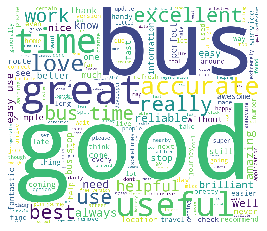

In [19]:
clean_postive = tokenToText(postive_token)
gener_wordcloud(clean_postive)

## User Story Principles

- Stories should be as independent as possible from other stories, to allow them to be moved around with minimal impact and potentially to be implemented independently. If stories are tightly dependent, consider combining them into a single user story. 

- Stories are not a contract. They are “placeholders” for features which the team will discuss and clarify near to the time of development.

- Stories should represent features providing clear business value to the user/owner of the solution and should be written in appropriate language. They should be features, not tasks. 

- Stories need to be clear enough to estimate (for the appropriate timeframe), without being too detailed.  

- Stories should be small enough to be estimated. Larger “Epic” stories should be broken down into smaller User Stories as the project progresses. The stories after splitting still follow the INVEST criteria. 

- Stories need to be worded clearly and specifically enough to be testable.



In [144]:
count = []
Nreviews_detial = []

        
for x in negative_review['review']:
    count.append(len(x))
    
for x in negative_review['review']:
    if len(x) >= statistics.mean(count):
        Nreviews_detial.append(x)
print(len(Nreviews_detial))    
Nreviews_detial

114


['Sorry this data can not be loaded at this time, our engineers are aware please try again later- been getting that message for weeks now. Tried to contact them, thats failed as well',
 "Used to be such a good solid app, now it's almost unusable. The widget hardly ever works, it just freezes when you tap it or try to switch between favourites. Even going into the app to view bus times doesn't work all the time, it just hangs without displaying times. Unless an update is released to fix the problems I'll have to use another app.",
 "Yep have to agree with others. Have used this app for over 3/4 years and is usually extremely reliable, but if the issue with the widget isn't resolved shortly, as its been off and on like this for a while (most of February). I'll have to uninstall as it is no longer reliable.",
 'Was a great app but the widget does not work any longer. Might be android version 10 issue but it is the only reason I have the app and paid for ad removal.',
 'The widget tries to

In [126]:
Nkeywords = ['bus', 'road', 'time', 'loaded','location','useless','find']

In [129]:
for keyword in Nkeywords:
    print('-'*20, 'Comments about', keyword, '-'*20)
    for sentence in Nreviews_detial:
        if keyword in sentence:
            print(sentence)
            print("")

-------------------- Comments about bus --------------------
Used to be such a good solid app, now it's almost unusable. The widget hardly ever works, it just freezes when you tap it or try to switch between favourites. Even going into the app to view bus times doesn't work all the time, it just hangs without displaying times. Unless an update is released to fix the problems I'll have to use another app.

Most bus stops in Stratford Bus Station have changed more than 6 months ago, but your app still shows the last year's layout. For example, D8 departures for Crossharbour is shown to be on Stop C ! This has not been the case for more than 6 months already! Do you ever update?

Gives wrong arrival time sometimes, usually showing later than actual arrivals, seems to be skipping the next bus, I ended up taking a taxi unnecessarily a couple of times, besides it is showing exactly TfL information =&gt; uninstalling.

It says 1 minute , then bus coming in 3 minutes. Or its saying 3 minutes 


As a user, I need an App which **will not freeze**, so that I can **switch between favorites.**

As a user, I need an App that **updates bus stations regularly**, so that **the out-of-date bus stations will not show in the app.**

As a user, I need an App that **predicts bus arrive time accurately** so that **the app will not say bus in 1 minute, but it actually comes in 3 minutes.**

As a user, I need an App that **provides accurate data**, so that I **will not waiting for a night bus that never arrives.**

As a mobile user, I need an App that **working on mobile**. so that **this app will not freezing and restarting every single time I click on a bus stop or mapping a journey.**

As a user, I need an App that can **detect my location**. so that I **will not be asked to turn on my location.**

As a user, I need **instructions on settings**. so that I **will not spend over an hour trying unsuccessfully to delete/change my home address.**

As a user, I need **a better way of adding stops**. so that I **do not have to find them on the map to add them to my favorites.**

As a user, I need **a better way of receiving error messages**. so that I **do not need to close 20 or more error notifications for no internet connection.**

As a user, I need **a better way to know when the next bus was going to arrive and also the location**. so that I **do not need to search on the map via my small mobile screen.**

As a user, I need **a better way to present the bus arrival time**. so that I will **know the exact bus arrival time rather than knowing how many minutes until it arrives.**


In [147]:
count = []
Previews_detial = []
       
for x in postive_review['review']:
    if type(x) != int:
        count.append(len(x))
    
for x in postive_review['review']:
    if type(x) != int:
        if len(x) >= statistics.mean(count):
            Previews_detial.append(x)
print(len(Previews_detial))    
Previews_detial

458


['Good app to use does the job but pop up ads very anoying i dont know why you have these adds on your app there is no need for it and you want to charge to get rid of the adds this is suppose to be a free app remember that.',
 'Amazing. Easy to use and full of interesting features...',
 'Very useful app to check local bus times',
 'Good, easy and precise infirmation',
 'Love this app. Use it every time I travel. I use it for work and it is fantastic. I have never missed my bus and it saves me waiting at the bus stop for long periods of time.',
 'Very useful at bus stops where there is not electronic signage to indicate how long the wait for the bus will be and whether it is worth waiting for a bus in poor weather or if it is best to start walking when the required destination is only a couple of stops and the bus is going to be delayed.',
 'Really handy for planning your journey',
 'I have been using this app for a few years now and apart from a few occasions it has served me very wel

In [148]:
Pkeywords = ['good', 'bus', 'use', 'accurate','excellent','checker','reliable']

In [149]:
for keyword in Pkeywords:
    print('-'*20, 'Comments about', keyword, '-'*20)
    for sentence in Previews_detial:
        if keyword in sentence:
            print(sentence)
            print("")

-------------------- Comments about good --------------------
A good app. Would be great to be able to share and link to a child's phone to know which bus they are on!

it's a great app to use to get around &amp; plan your travels don't get lost or misplaced your bus good luck people

Often reliable. Occasionally has been incorrect but usually good.

I think that is is very good and sometimes accurate

Very good. Generally reliable.

very good and mostly accurate better than most

It's all good, very reliable.

it's very good thing to have

I've been using the app the last two years and was working like a charm. 
Updated yesterday and since then its not showing anything. On the place of 
the map, there's a message "Google Play services updating" and that's it. I 
reinstalled twice - nothing. Gave it a good 10 minutes to "update" - still 
nothing. Please fix it! Edit: Fixed. Working like a charm again. Deserves 
the 5 stars!

It tells me about the buses... I don't need to think about it

As a user, the app needs **a better way to present solutions**, so that I **do not have to start the search process again to look at alternative routes**

As a user, the app needs **more instruction**, so that I **do not need to speed times to learn to navigate**

As a user, the app needs **to get my location quicker**, so that I **do not need to wait for it.**

As a user, the app needs **to be working constantly**, so that it **will not stop working after a period of time. and I do not need to reinstall it.**

As a user, the app needs **provide bus time accurately**, so that I **will not miss buses.**

As a user, **the active bus stop icons could be larger/zoom easier**, so that I can **find it easily.**

As a user, the app **should automatically show the closest favorite bus stop(as I have more than 5)**, so that it can **saves me from scrolling back or forth to the right bus stop.**

As a user, the app would be better if it **gives warnings if there are route changes on buses**.

As a user, the app **changes its timer with the minutes**, so that I **do not need to refresh to see the time change**

As a user, the app **should show the incoming buses information of each bus stations** so that **bus stop will not lose all information of incoming buses and stating that there are no incoming.**

As a user, the **bus stop icons should be visible**, so that I **do not need to zoom in to find it.**

As a user, the app **should have a better location searching tool**, so that I **do not have to manually move the destination point multiple times**

As a user, the app **should have sensible bold font size and optional dark background**, so that, **it easy on the eyes**

As a user, the app **should have Stop Aler**, so that, **users can be notified as they near their destination stop**

## Bus Times London

In [20]:
count = []
Nreviews_detial = []

        
for x in negative_review_londonMapWay['review']:
    count.append(len(x))
    
for x in negative_review_londonMapWay['review']:
    if len(x) >= statistics.mean(count):
        Nreviews_detial.append(x)

In [22]:
Nkeywords = ['bus', 'time', 'update', 'due', 'get', 'better', 'stop']

In [23]:
for keyword in Nkeywords:
    print('-'*20, 'Comments about', keyword, '-'*20)
    for sentence in Nreviews_detial:
        if keyword in sentence:
            print(sentence)
            print("")

-------------------- Comments about bus --------------------
Cant find a worse app to put long ads in, if you're in a rush and need to check the times, and suddenly an ad pops up lasting 20 seconds. Please sort this ad situation out. Before you start saying you need the revenue from ads, what I'm meaning to say is cut the ads a lot shorter, so people dont miss their buses.

You have to wait 5-30 seconds for an advert every time app opens, can never just check the bus times. It gets extremely frustrating, especially when you are waiting for an irregular bus.

Too much ads and the bus time is not accurate anymore. The app also says none due when a bus is actually near by

Very angry. It was the best app on market when it was new. Loved it - fast, accurate, easy to handle. Now is the worst on market. I can see for the developers the money first. Adds and adds and adds, when the people want to see one thing: when and where the next bus us coming. That WAS the best and qickest app to do it.

As a user, the app needs to provide due time and arrival time, so that I can check the bus status.

As a user, the app needs should send notifications when a bus stop is closed or a route is on diversion. So that  I know where I should go to before we leave out.

As a user, the bus stop should be able to provide which bus is arriving when clicking it. So that I can choose to travel from a few different bus stops via different routes.

As a user, the automatic refresh time (30 sec) should be shrink. So that I do not need to wait 30 sec when the bus is nearly arriving.

As a user, the specific locations when buses are arriving/departing should be able to check. So that I do not need to download a separate app to do this.

As a user, the search bar should be able to present all stops. So that I do not need to manually place the map, bring up the local buses.

As a user, I hope I can see the bus traveling on the map in real-time.

As a user, the app should reduce the frequency of Location pop up. so that it could be less annoying.

As a user, I want the app to show where I am when I launch it and display bus stop locations in my area. so that I can choose a bus stop for my journey.

as a user, I want the app could have a lower zoom level instead of street level.

In [31]:
count = []
Previews_detial = []

        
for x in postive_review_londonMapWay['review']:
    count.append(len(x))
    
for x in postive_review_londonMapWay['review']:
    if len(x) >= statistics.mean(count):
        Previews_detial.append(x)

In [25]:
Pkeywords = ['accurate', 'useful', 'use', 'great', 'time', 'love', 'easy']

In [33]:
for keyword in Pkeywords:
    print('-'*20, 'Comments about', keyword, '-'*20)
    for sentence in Previews_detial:
        if keyword in sentence:
            print(sentence)
            print("")

-------------------- Comments about accurate --------------------
very good app, arrivals times , are accurate , are shown when bus stop is tapped in nearby.Missed a bus once, used this and caught the next on a different route, within 3 minutes, extremely helpful, perfect.

Sometimes bus information inaccurate or not available but mostly I find this app very good and I'm much happier with it than without it.

it is accurate alot of the time but the time speeds up as it donest keep track of the time

very accurate bus app and it uses your location so ensure its on before use.

Excellent app. Easy to use and accurate

so handy to have info. very accurate.

App tells you what time the bus will arrive to the minute but sometimes it is not as accurate as others but generally very good. It also gives you the registration number of the bus as well. Times of buses generally correct. Much better than other apps I have used. Shame other bus apps are not as good for non London routes. Bus stop le

as a user, I want to know the route for all day in the journey planner section without putting a time of departures.

as a user, I like the app could give me several options in regards to traveling to specific locations.

as a user, I like the nearby function that helps me a lot when I was in a location never journeyed to before.

as a user, the app should be updated per month. so that the wrong station will not appear.

as a user, the app should be able to refresh when I swipe down.

as a user, the app should be showing data of all area constantly.

as a user, the app should be able to search by bus number, instead each time I have to enter a location, bus stop, or postcode, then select bus number to do the bus search.

as a user, I'd like to know where that bus is when I picking a bus from a bus stop, rather than given bus info for the whole route.

as a user, I want to spend less time to find when my bus arriving.
